In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from pycaret.classification import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score,f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import RobustScaler
from scipy.stats import norm, skew
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [42]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

In [43]:
pd.set_option('display.max_columns', 37)
train.head()

BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v     Chi3v  \
id                                                                              
0   323.390782   9.879918  5.875576   5.875576  4.304757   4.304757  2.754513   
1   273.723798   7.259037  4.441467   5.834958  3.285046   4.485235  2.201375   
2   521.643822  10.911303  8.527859  11.050864  6.665291   9.519706  5.824822   
3   567.431166  12.453343  7.089119  12.833709  6.478023  10.978151  7.914542   
4   112.770735   4.414719  2.866236   2.866236  1.875634   1.875634  1.036450   

       Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                     
0   1.749203     0.000000    11.938294  222.068080          1.181818   
1   1.289775    45.135471     0.000000  260.029719          1.346154   
2   1.770579    15.645394     6.606882  382.131027          1.085714   
3   3.067181    95.639554     0.000000  530.070277          1.162791   
4   0.727664    17.980451    12.841643  118.062994          1.444444   

    FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                      
0           1.727273          2.363636          -0.24         212.163   
1           2.076923          2.769231          -0.09         247.031   
2           1.742857          2.400000          -0.78         354.106   
3           1.573770          2.270270          -1.30         506.124   
4           2.111111          2.555556          -1.10         108.056   

       Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  PEOE_VSA10  \
id                                                                             
0    8.170000          11.922504        0.171585               4    0.000000   
1    3.201491          10.932338       -4.830450              10   24.415866   
2   15.033890          11.238048       -5.066255               9    0.000000   
3    6.724301          11.171170       -5.276575              19   42.727765   
4    3.931272           9.855741       -1.676296               4    6.041841   

    PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10   SMR_VSA5  \
id                                                                      
0    91.536492   0.000000   0.000000   0.000000  17.744066   0.000000   
1     7.822697   0.000000   0.000000   0.000000   7.822697  30.705892   
2    15.645394   0.000000  53.378235   0.000000  15.645394  73.143616   
3    21.335138   0.000000   0.000000   6.420822  15.645394  62.107304   
4    11.938611   6.923737  19.386400   0.000000  11.938611  18.883484   

    SlogP_VSA3  VSA_EState9  fr_COO  fr_COO2  EC1  EC2  EC3  EC4  EC5  EC6  
id                                                                          
0     4.794537    35.527357       0        0    1    1    0    0    0    0  
1    13.825658    44.707310       0        0    0    1    1    0    0    0  
2    17.964475    45.660120       0        0    1    1    0    0    1    0  
3    31.961948    87.509997       0        0    1    1    0    0    0    0  
4     9.589074    33.333333       2        2    1    0    1    1    1    0

In [4]:
train.describe()

BertzCT          Chi1         Chi1n         Chi1v         Chi2n  \
count  14838.000000  14838.000000  14838.000000  14838.000000  14838.000000   
mean     515.153604      9.135189      5.854307      6.738497      4.432570   
std      542.456370      6.819989      4.647064      5.866444      3.760516   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      149.103601      4.680739      2.844556      2.932842      1.949719   
50%      290.987941      6.485270      4.052701      4.392859      2.970427   
75%      652.652585     11.170477      7.486791      8.527859      5.788793   
max     4069.959780     69.551167     50.174588     53.431954     32.195368   

              Chi2v         Chi3v         Chi4n   EState_VSA1   EState_VSA2  \
count  14838.000000  14838.000000  14838.000000  14838.000000  14838.000000   
mean       5.253221      3.418749      1.773472     29.202823     10.435316   
std        4.925065      3.436208      1.865898     31.728679     13.651843   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.034468      1.160763      0.503897      5.969305      0.000000   
50%        3.242775      1.948613      1.073261     17.353601      6.420822   
75%        6.609350      4.502070      2.534281     44.876559     12.841643   
max       34.579313     22.880836     16.072810    363.705954     99.936429   

         ExactMolWt  FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  \
count  14838.000000      14838.000000      14838.000000      14838.000000   
mean     292.623087          1.236774          1.812070          2.255470   
std      225.384140          5.491284          5.495565          5.501200   
min        1.007276       -666.000000       -666.000000       -666.000000   
25%      148.037173          1.045455          1.690909          2.100000   
50%      206.042653          1.250000          1.865152          2.358491   
75%      343.090331          1.500000          2.062153          2.500000   
max     2237.318490          3.000000          3.200000          3.400000   

       HallKierAlpha  HeavyAtomMolWt        Kappa3  MaxAbsEStateIndex  \
count   14838.000000    14838.000000  14838.000000       14838.000000   
mean       -1.207776      274.950211      5.874372          10.556443   
std         0.935314      212.678755     45.730226           1.559331   
min        -7.730000        0.000000   -104.040000           0.000000   
25%        -1.660000      136.109000      1.784008           9.926190   
50%        -1.100000      194.276500      3.261011          10.421334   
75%        -0.570000      326.002000      5.848400          11.539743   
max         0.820000     2035.133000   1512.242231          15.630251   

       MinEStateIndex  NumHeteroatoms    PEOE_VSA10    PEOE_VSA14  \
count    14838.000000    14838.000000  14838.000000  14838.000000   
mean        -2.119772        8.584108     11.021644     17.790011   
std          2.066415        7.643769     13.958962     34.561655   
min         -6.327514        0.000000      0.000000      0.000000   
25%         -4.659604        4.000000      0.000000      0.000000   
50%         -1.265370        6.000000      6.041841      5.969305   
75%         -0.787037       10.000000     18.311899     15.645394   
max          6.000000       42.000000     97.663462    482.434223   

          PEOE_VSA6     PEOE_VSA7     PEOE_VSA8     SMR_VSA10      SMR_VSA5  \
count  14838.000000  14838.000000  14838.000000  14838.000000  14838.000000   
mean       8.962440     11.318811      6.704487     15.666766     31.066423   
std       19.756727     20.169745     10.865415     18.080208     33.896638   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      5.969305      6.420822   
50%        0.000000      0.000000      0.000000     11.752550     20.075376   
75%       12.132734     13.847474      6.923737     17.721856

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14632 entries, 0 to 14837
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            14632 non-null  float64
 1   Chi1               14632 non-null  float64
 2   Chi1n              14632 non-null  float64
 3   Chi1v              14632 non-null  float64
 4   Chi2n              14632 non-null  float64
 5   Chi2v              14632 non-null  float64
 6   Chi3v              14632 non-null  float64
 7   Chi4n              14632 non-null  float64
 8   EState_VSA1        14632 non-null  float64
 9   ExactMolWt         14632 non-null  float64
 10  FpDensityMorgan1   14632 non-null  float64
 11  FpDensityMorgan2   14632 non-null  float64
 12  FpDensityMorgan3   14632 non-null  float64
 13  HallKierAlpha      14632 non-null  float64
 14  HeavyAtomMolWt     14632 non-null  float64
 15  Kappa3             14632 non-null  float64
 16  MaxAbsEStateIndex  146

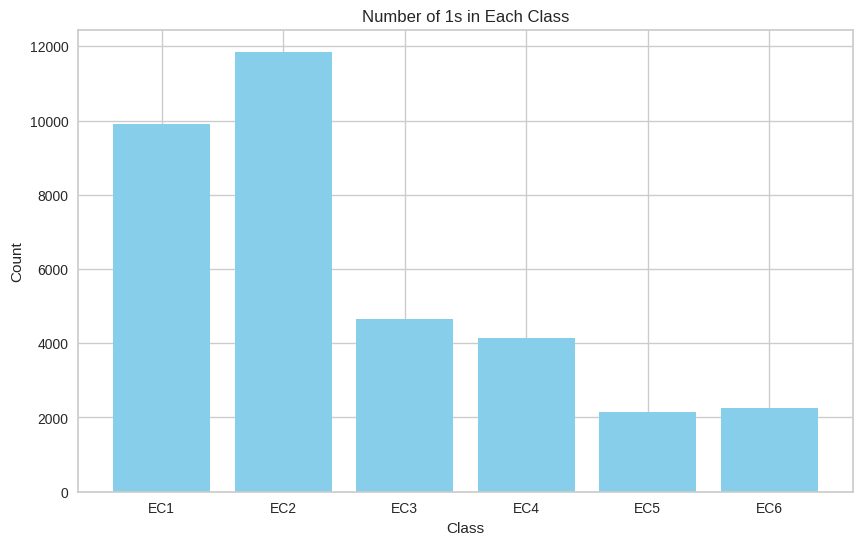

In [11]:
labels = ['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6']

# Count the number of 1s in each class
counts = [train[label].sum() for label in labels]

# Create the bar plot
plt.figure(figsize=(10,6))
plt.bar(labels, counts, color='skyblue')
plt.title('Number of 1s in Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

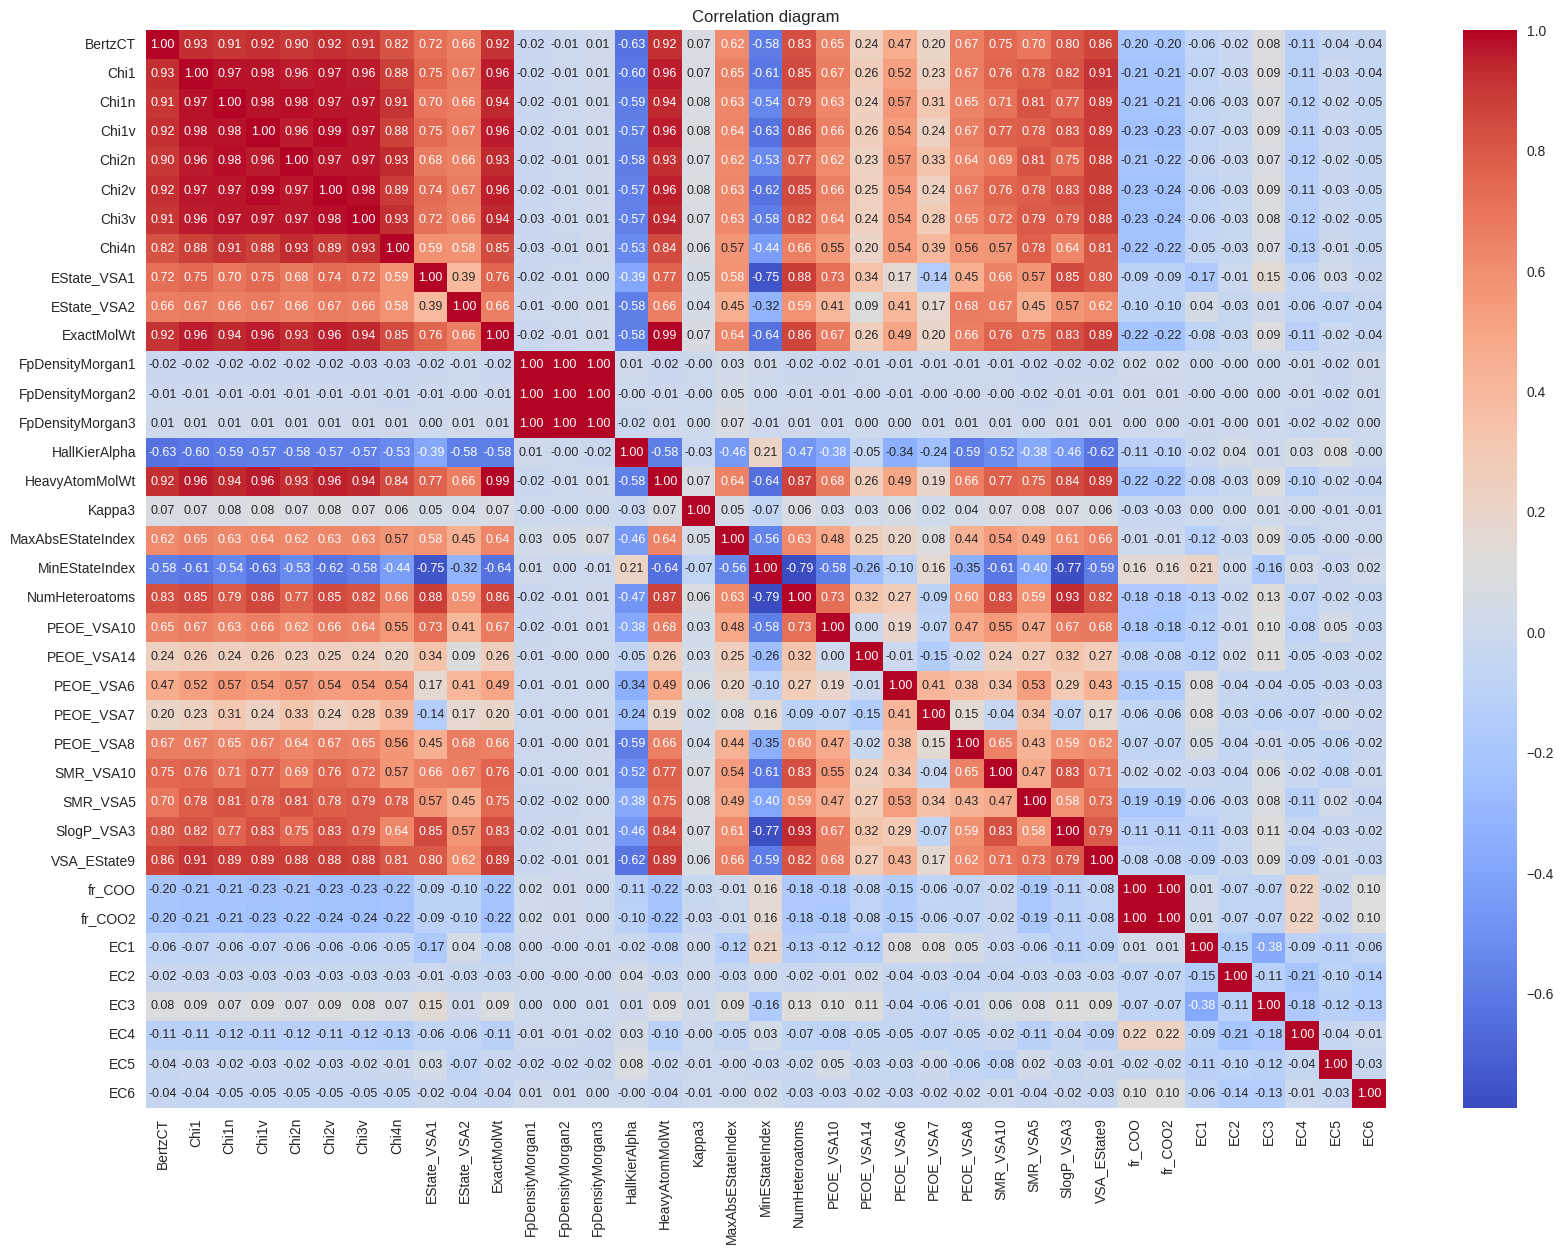

In [12]:
correlation_matrix = train.corr()

# ヒートマップを描画
plt.figure(figsize=(20, 14))  # グラフのサイズを設定
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 9}, fmt=".2f", cmap='coolwarm')  # ヒートマップを描画
plt.title('Correlation diagram')  # グラフのタイトルを設定
plt.show()  # グラフを表示

In [27]:
# 重要度確認　EC1
# Define the feature columns and the target column
feature_columns = train.columns.drop(['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'])
target_column = 'EC1'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train[feature_columns], train[target_column], test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Get the feature importances
feature_importances = clf.feature_importances_

# Create a dataframe of the feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

# Sort the dataframe by importance
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Display the feature importances
feature_importances_df

NameError: name 'feature_columns' is not defined

In [14]:
# 重要度確認　EC1
# Define the feature columns and the target column
feature_columns = train.columns.drop(['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'])
target_column = 'EC2'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train[feature_columns], train[target_column], test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Get the feature importances
feature_importances = clf.feature_importances_

# Create a dataframe of the feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

# Sort the dataframe by importance
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Display the feature importances
feature_importances_df

Feature  Importance
18     MinEStateIndex    0.045471
28        VSA_EState9    0.044894
16             Kappa3    0.044165
0             BertzCT    0.044080
17  MaxAbsEStateIndex    0.043645
6               Chi3v    0.041683
13   FpDensityMorgan3    0.041479
7               Chi4n    0.041198
3               Chi1v    0.040674
4               Chi2n    0.040491
5               Chi2v    0.040320
2               Chi1n    0.040289
14      HallKierAlpha    0.039571
11   FpDensityMorgan1    0.039470
12   FpDensityMorgan2    0.039383
10         ExactMolWt    0.039220
1                Chi1    0.037786
15     HeavyAtomMolWt    0.035533
26           SMR_VSA5    0.033161
8         EState_VSA1    0.027805
9         EState_VSA2    0.026351
25          SMR_VSA10    0.025735
23          PEOE_VSA7    0.023470
20         PEOE_VSA10    0.022290
19     NumHeteroatoms    0.020827
27         SlogP_VSA3    0.020180
24          PEOE_VSA8    0.018900
22          PEOE_VSA6    0.017301
21         PEOE_VSA14    0.013874
29             fr_COO    0.005721
30            fr_COO2    0.005030

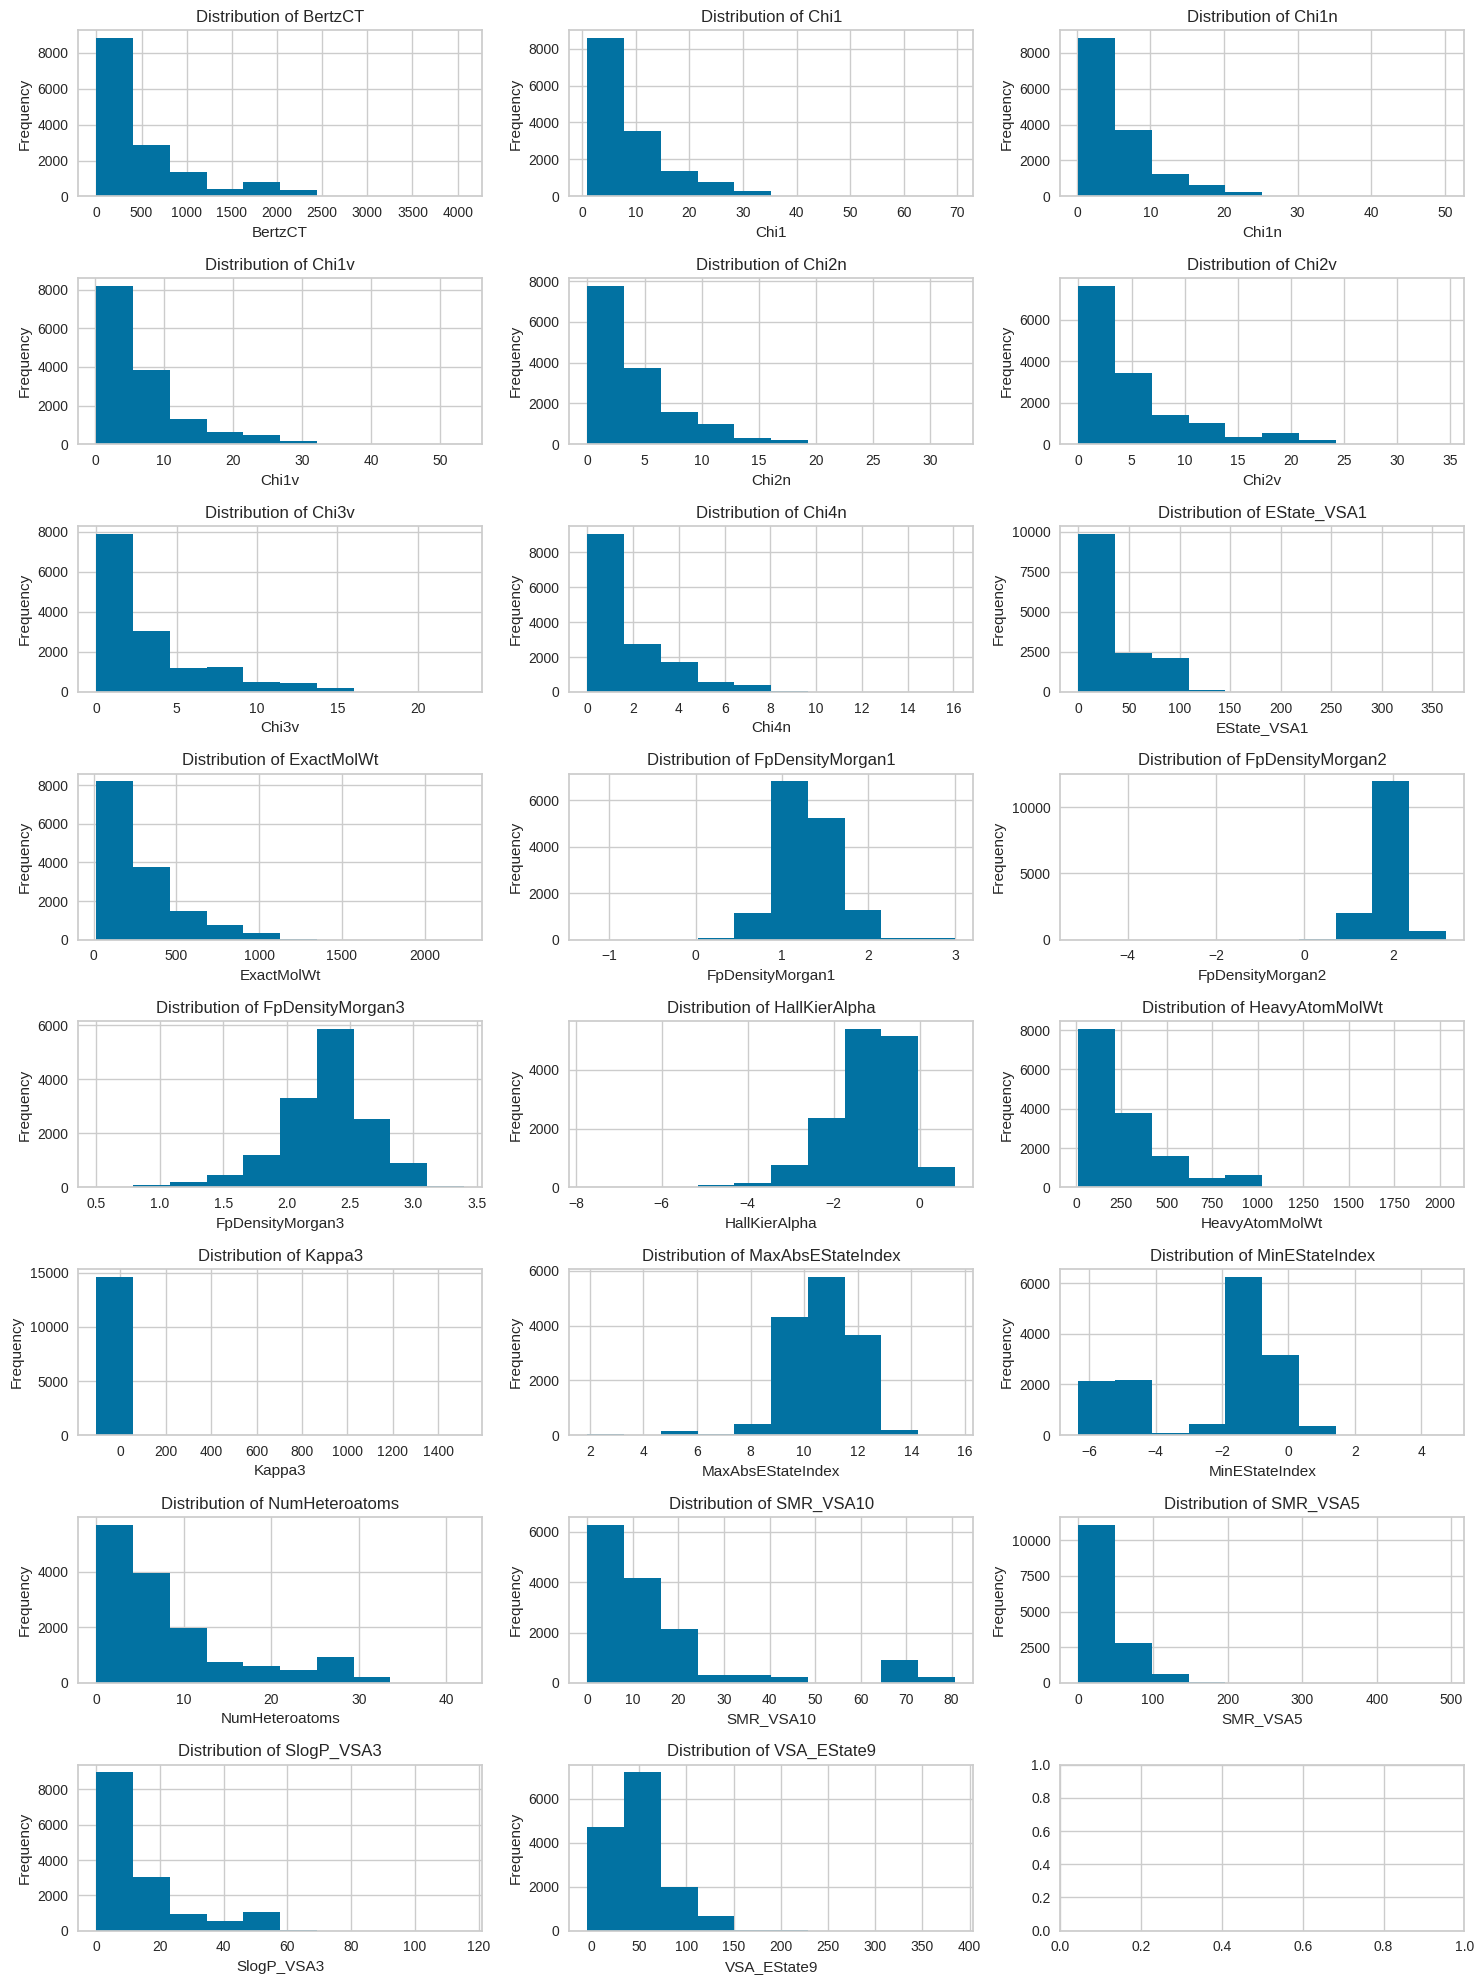

In [38]:
num_cols = 3  # 1行あたりの列数
num_rows = (len(train.columns) + num_cols - 1) // num_cols  # 必要な行数

# サブプロットの作成
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))  # figsizeで図のサイズを設定

# カラムごとにヒストグラムを描画
for i, column in enumerate(train.columns):
    ax = axes[i // num_cols, i % num_cols]  # サブプロットを取得
    train[column].hist(ax=ax)  # ヒストグラムを描画
    ax.set_xlabel(column)  # x軸のラベルを設定
    ax.set_ylabel('Frequency')  # y軸のラベルを設定
    ax.set_title(f'Distribution of {column}')  # グラフのタイトルを設定

plt.tight_layout()  # レイアウトの調整
plt.show()  # グラフを表示

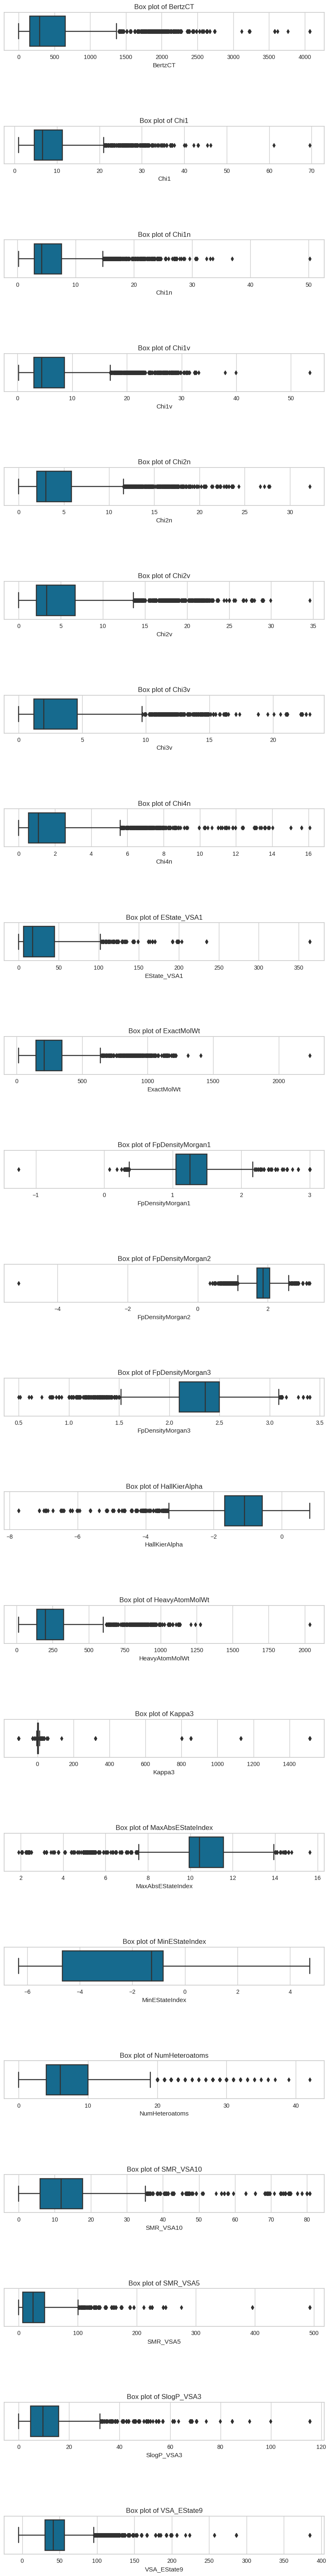

In [26]:
n = len(train.columns)
ncols = 1  # Number of columns in your plot
nrows = n // ncols  # Number of rows in your plot
nrows += n % ncols  # Add a row if there are any remaining plots

# Create a figure and axes
fig, axs = plt.subplots(nrows, ncols, figsize=(10, 80))

# Flatten the 2-D array to 1-D
axs = axs.ravel()

# Create box plots for each feature
for i, feature in enumerate(train.columns):
    sns.boxplot(x=train[feature], ax=axs[i])
    axs[i].set_title(f'Box plot of {feature}')

# Remove any unused subplots
if n < nrows * ncols:
    for i in range(n, nrows * ncols):
        fig.delaxes(axs[i])
        
plt.subplots_adjust(hspace=2)

# Display the plot
plt.show()

In [44]:
train = train.drop(['EC2', 'EC3', 'EC4', 'EC5', 'EC6', 'fr_COO', 'fr_COO2', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA8', 'EState_VSA2'], axis=1)

In [45]:
min_zero_columns = 7

# 各行の0の出現回数を数える
zero_counts = (train == 0).sum(axis=1)

# min_zero_columns以上のカラムに0が含まれる行を抽出
extracted_rows = train[zero_counts >= min_zero_columns]
extracted_rows

BertzCT      Chi1     Chi1n     Chi1v  Chi2n  Chi2v  Chi3v  Chi4n  \
id                                                                           
31      2.000000  1.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
115     2.000000  1.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
118     2.000000  1.000000  0.447214  0.447214    0.0    0.0    0.0    0.0   
213     2.000000  1.000000  0.577350  0.577350    0.0    0.0    0.0    0.0   
228     0.000000  0.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
...          ...       ...       ...       ...    ...    ...    ...    ...   
14680  20.000000  1.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
14713   2.000000  1.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
14714   2.000000  1.414214  0.000000  0.000000    0.0    0.0    0.0    0.0   
14780   2.000000  1.000000  0.577350  0.577350    0.0    0.0    0.0    0.0   
14784  26.264663  1.414214  0.223607  0.223607    0.0    0.0    0.0    0.0   

       EState_VSA1  ExactMolWt  FpDensityMorgan1  FpDensityMorgan2  \
id                                                                   
31             0.0   16.018724             3.000              3.00   
115            0.0   16.018724             2.500              2.50   
118            0.0   31.018390             3.000              3.00   
213            0.0   34.005479             3.000              3.00   
228            0.0   32.979896             1.000              1.00   
...            ...         ...               ...               ...   
14680          0.0   32.979896             3.000              3.00   
14713          0.0   17.002740             3.000              3.00   
14714          0.0   32.979896             1.125              1.25   
14780          0.0   31.042199             1.500              1.50   
14784          0.0   26.003074             3.000              3.00   

       FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt      Kappa3  \
id                                                                   
31                 3.00          -0.04          14.007 -104.040000   
115                2.50          -0.04          14.007 -104.040000   
118                3.00          -0.04          28.010  -27.040000   
213                3.00          -0.08          31.998  -14.580000   
228                1.00           0.35          32.067  -27.040000   
...                 ...            ...             ...         ...   
14680              3.00           0.35          32.067    1.960000   
14713              3.00          -0.04          15.999 -104.040000   
14714              1.25           0.35          32.067    7.778571   
14780              1.50          -0.04          26.018  -27.040000   
14784              3.00          -0.51          26.018   -4.470784   

       MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  SMR_VSA10  \
id                                                                    
31              4.750000        0.250000               2   0.000000   
115             7.000000        1.000000               1   6.789076   
118             7.680556        0.000000               2  13.495693   
213             4.750000        0.250000               2   0.000000   
228             0.000000        0.000000               1   0.000000   
...                  ...             ...             ...        ...   
14680           3.777778        0.444444               2  13.495693   
14713           7.250000       -0.250000               1   0.000000   
14714           3.777778        0.444444               3  13.495693   
14780           4.500000        1.500000               1   0.000000   
14784           7.430556        0.069444               2   0.000000   

        SMR_VSA5  SlogP_VSA3  VSA_EState9  EC1  
id                                              
31      0.000000    0.000000     7.250000    1  
115     0.000000    4.794537    10.000000    1  
118    12.145807    0.000000     0.000000    1  
213

In [46]:
train = train.drop(extracted_rows.index)

In [47]:
columns = [col for col in train.columns if col != 'EC1']

# データフレームの各カラムをループで処理
for column in columns:
    # カラムの中央値を計算
    median = train[column].median()

    # 値が0の箇所を中央値で置き換え
    train[column] = np.where(train[column] == 0, median, train[column])

In [50]:
X = train.drop(['EC1'], axis=1)
y = train[['EC1']]

In [51]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
params_EC1 ={'depth': 2,
 'l2_leaf_reg': 7,
 'border_count': 254,
 'verbose': False,
 'random_strength': 0.3,
 'task_type': 'CPU',
 'n_estimators': 210,
 'random_state': 5537,
 'eta': 0.05}

In [54]:
model_EC1 = CatBoostClassifier(**params_EC1)
model_EC1.fit(X_train, y_train['EC1'])

In [57]:
val_predictions_EC1 = model_EC1.predict(X_val)
cm_EC1 = confusion_matrix(y_val['EC1'], val_predictions_EC1)
print('Confusion matrix for EC1:')
print(cm_EC1)
f1_EC1 = f1_score(y_val['EC1'], val_predictions_EC1)
print('F1 score for EC1:', f1_EC1)
roc_auc_EC1 = roc_auc_score(y_val['EC1'], val_predictions_EC1)
print('ROC AUC for EC1:', roc_auc_EC1)

Confusion matrix for EC1:
[[ 377  610]
 [ 292 1646]]
F1 score for EC1: 0.7849308536003814
ROC AUC for EC1: 0.6156473787723376


In [36]:
prefixes = ['Chi', 'EState', 'FpDensityMorgan', 'PEOE', 'SMR', 'SlogP']
prefixes_dict = {prefix: [col for col in train.columns if col.startswith(prefix)] for prefix in prefixes}

# Combine all the lists of features into one list
prefix_features = [feature for sublist in prefixes_dict.values() for feature in sublist]

features = ['BertzCT', 'ExactMolWt', 'HallKierAlpha', 'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex', 'NumHeteroatoms', 'VSA_EState9'] + prefix_features

# Use list comprehension to create a list of dataframes
negative_values = {feature: train[train[feature] < 0.001] for feature in features}

# Now you can access the results like this:
for feature, df in negative_values.items():
    print(f"Negative values for {feature}:")
    display(df)

Negative values for BertzCT:


BertzCT     Chi1     Chi1n     Chi1v    Chi2n    Chi2v     Chi3v  \
id                                                                        
12205      0.0  2.56066  1.712831  1.712831  1.34581  1.34581  0.468556   

          Chi4n  EState_VSA1  ExactMolWt  FpDensityMorgan1  FpDensityMorgan2  \
id                                                                             
12205  0.348534     6.103966  167.982374               1.5               2.0   

       FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  Kappa3  \
id                                                               
12205               2.0           0.02         163.001    7.88   

       MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  SMR_VSA10  SMR_VSA5  \
id                                                                              
12205           8.897037       -0.054207               3        0.0  6.103966   

       SlogP_VSA3  VSA_EState9  
id                              
12205         0.0    20.166667

Negative values for ExactMolWt:


Empty DataFrame
Columns: [BertzCT, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3v, Chi4n, EState_VSA1, ExactMolWt, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, HallKierAlpha, HeavyAtomMolWt, Kappa3, MaxAbsEStateIndex, MinEStateIndex, NumHeteroatoms, SMR_VSA10, SMR_VSA5, SlogP_VSA3, VSA_EState9]
Index: []

Negative values for HallKierAlpha:


BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v  \
id                                                                       
0      323.390782   9.879918  5.875576   5.875576  4.304757   4.304757   
1      273.723798   7.259037  4.441467   5.834958  3.285046   4.485235   
2      521.643822  10.911303  8.527859  11.050864  6.665291   9.519706   
3      567.431166  12.453343  7.089119  12.833709  6.478023  10.978151   
4      112.770735   4.414719  2.866236   2.866236  1.875634   1.875634   
...           ...        ...       ...        ...       ...        ...   
14833  632.207041  10.911303  6.579933   9.179964  4.653583   6.030052   
14834   62.568425   2.642734  1.446898   1.446898  0.879497   0.879497   
14835  981.327476  10.363081  6.146219   6.146219  4.700576   4.700576   
14836  299.171248   9.949161  6.589761   7.848913  5.276568   5.476436   
14837  785.394062  15.671142  9.896164  10.234264  7.860296   8.522605   

          Chi3v     Chi4n  EState_VSA1  ExactMolWt  FpDensityMorgan1  \
id                                                                     
0      2.754513  1.749203     0.000000  222.068080          1.181818   
1      2.201375  1.289775    45.135471  260.029719          1.346154   
2      5.824822  1.770579    15.645394  382.131027          1.085714   
3      7.914542  3.067181    95.639554  530.070277          1.162791   
4      1.036450  0.727664    17.980451  118.062994          1.444444   
...         ...       ...          ...         ...               ...   
14833  3.670528  1.770579    32.971529  347.063084          1.562500   
14834  0.174620  0.000000     0.000000   74.024203          2.666667   
14835  3.064846  2.133897    17.248535  297.089560          1.461538   
14836  3.978973  2.299833    45.623794  265.959270          0.950000   
14837  5.645502  3.312893    82.448246  437.234828          1.041667   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
0              1.727273          2.363636          -0.24         212.163   
1              2.076923          2.769231          -0.09         247.031   
2              1.742857          2.400000          -0.78         354.106   
3              1.573770          2.270270          -1.30         506.124   
4              2.111111          2.555556          -1.10         108.056   
...                 ...               ...            ...             ...   
14833          2.187500          2.687500          -1.87         333.112   
14834          2.666667          2.666667          -0.53          70.027   
14835          2.153846          2.769231          -3.15         282.220   
14836          1.400000          1.950000          -0.44         257.119   
14837          1.750000          2.500000          -1.36         402.326   

          Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                    
0       8.170000          11.922504        0.171585               4   
1       3.201491          10.932338       -4.830450              10   
2      15.033890          11.238048       -5.066255               9   
3       6.724301          11.171170       -5.276575              19   
4       3.931272           9.855741       -1.676296               4   
...          ...                ...             ...             ...   
14833   4.879408          11.426427       -5.077909              16   
14834   0.729375           5.506944        0.250000               0   
14835   2.045502          12.118907       -0.446105               8   
14836   8.424399          10.909292       -4.181527               7   
14837   5.178431          12.211804       -5.394920              16   

       SMR_VSA10    SMR_VSA5  SlogP_VSA3  VSA_EState9  
id                                                     
0      17.744066    0.000000    4.794537    35.527357  
1       7.822697   30.705892 

Negative values for HeavyAtomMolWt:


Empty DataFrame
Columns: [BertzCT, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3v, Chi4n, EState_VSA1, ExactMolWt, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, HallKierAlpha, HeavyAtomMolWt, Kappa3, MaxAbsEStateIndex, MinEStateIndex, NumHeteroatoms, SMR_VSA10, SMR_VSA5, SlogP_VSA3, VSA_EState9]
Index: []

Negative values for Kappa3:


BertzCT       Chi1     Chi1n      Chi1v     Chi2n     Chi2v  \
id                                                                       
98        2.000000   1.414214  0.894427   0.894427  0.136083  0.136083   
123      10.264663   1.732051  0.881855   0.881855  0.000000  0.000000   
516       2.754888   1.414214  1.029788   1.029788  0.316228  0.316228   
629      94.958785   4.180739  2.864808   2.864808  1.922212  1.922212   
687      12.364528   2.808060  1.707151   1.707151  1.018972  1.018972   
733      42.854753   2.000000  1.341641   1.341641  0.867345  0.867345   
2354     26.264663   1.414214  1.049739   1.049739  0.504904  0.504904   
2416      2.000000   1.732051  0.682574   0.682574  0.000000  0.000000   
2613      2.000000   2.642734  1.049739   1.049739  0.000000  0.000000   
2755     75.335159   2.642734  0.927731   0.927731  0.402369  0.402369   
2768     23.219281   1.732051  0.223607   0.223607  0.091287  0.091287   
3003     29.019550   2.270056  0.682574   2.503214  0.834259  1.599216   
3053      2.000000   1.732051  0.300000   0.300000  0.000000  0.000000   
3256     43.302969   1.732051  0.288675   0.288675  0.117851  0.117851   
3317     32.000000   1.732051  0.682574   0.682574  0.213865  0.213865   
4151     74.793988   1.732051  0.731536   0.652894  0.265908  0.265908   
4312   2238.830501  10.359844  7.066210  12.640987  5.896783  9.074391   
4539     29.019550   1.414214  0.258199   0.258199  0.000000  0.000000   
4739     83.108030   2.642734  1.551955   1.551955  1.551955  1.551955   
4809      2.000000   2.642734  1.551955   1.551955  0.728502  0.728502   
4842     64.568425   1.414214  1.281284   1.281284  0.000000  0.000000   
5132     28.018454   1.732051  0.781474   0.781474  0.456089  0.456089   
5158     55.913403   1.270056  1.233968   1.233968  0.643739  0.643739   
5246     23.219281   1.414214  0.458199   0.458199  0.115470  0.115470   
5403     28.726946   1.732051  0.447214   1.341641  0.000000  0.000000   
5801     26.264663   1.732051  0.697214   0.697214  0.223607  0.223607   
5982      2.754888   1.414214  1.023335   1.023335  0.316228  0.316228   
6088     86.107496   4.359878  2.654911   2.654911  1.829115  1.829115   
6455     17.262465   2.914214  1.742050   1.742050  1.077350  1.077350   
6658     75.335159   2.307008  1.988391   1.988391  1.127305  1.127305   
6670      6.754888   1.414214  0.697214   0.697214  0.223607  0.223607   
7067     26.264663   1.732051  1.597512   1.597512  0.551852  0.551852   
7791     97.862917   3.625898  1.988391   1.988391  1.137259  1.137259   
8534     72.828921   3.877010  2.688080   2.688080  1.812046  1.812046   
8889     62.568425   1.414214  0.822751   0.822751  0.504904  0.504904   
10360    62.568425   1.732051  0.288675   0.288675  0.000000  0.000000   
11042    20.000000   1.732051  1.049739   1.049739  0.236120  1.628913   
11105     2.000000   2.642734  1.542753   1.542753  0.890525  0.890525   
11565     2.000000   1.000000  0.408248   0.408248  0.000000  0.000000   
11714    31.019550   1.000000  0.258199   0.258199  0.000000  0.000000   
12106    29.019550   1.732051  0.258199   0.258199  0.000000  0.000000   
12246     2.000000   1.414214  1.000000   1.000000  0.500000  0.500000   
12411     2.754888   1.414214  1.023335   1.023335  0.316228  0.316228   
13676   212.928441   4.464102  2.580465   2.580465  1.739211  1.739211   
13773    20.000000   1.914214  0.223607   0.223607  0.000000  0.000000   
14121     2.000000   2.642734  0.881855   1.927731  0.000000  0.000000   

          Chi3v     Chi4n  EState_VSA1  ExactMolWt  FpDensityMorgan1  \
id                                                                     
98     0.000000  0.000000     0.000000   32.026215          1.285714   
123    0.000000  0.000000     6.286161   81.932171          1.833333   
516    0.000000  0.000000     0.000000   31.018390          2.000000   
629    1.180315  0.672861     0.000000  117.057849          1.272727   
687    0.421498  0.057735 

Negative values for MaxAbsEStateIndex:


Empty DataFrame
Columns: [BertzCT, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3v, Chi4n, EState_VSA1, ExactMolWt, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, HallKierAlpha, HeavyAtomMolWt, Kappa3, MaxAbsEStateIndex, MinEStateIndex, NumHeteroatoms, SMR_VSA10, SMR_VSA5, SlogP_VSA3, VSA_EState9]
Index: []

Negative values for MinEStateIndex:


BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v  \
id                                                                       
1      273.723798   7.259037  4.441467   5.834958  3.285046   4.485235   
2      521.643822  10.911303  8.527859  11.050864  6.665291   9.519706   
3      567.431166  12.453343  7.089119  12.833709  6.478023  10.978151   
4      112.770735   4.414719  2.866236   2.866236  1.875634   1.875634   
5      144.973737   5.540111  3.481748   3.481748  2.481029   2.481029   
...           ...        ...       ...        ...       ...        ...   
14832   83.690584   3.560660  1.689533   1.689533  0.924069   0.924069   
14833  632.207041  10.911303  6.579933   9.179964  4.653583   6.030052   
14835  981.327476  10.363081  6.146219   6.146219  4.700576   4.700576   
14836  299.171248   9.949161  6.589761   7.848913  5.276568   5.476436   
14837  785.394062  15.671142  9.896164  10.234264  7.860296   8.522605   

          Chi3v     Chi4n  EState_VSA1  ExactMolWt  FpDensityMorgan1  \
id                                                                     
1      2.201375  1.289775    45.135471  260.029719          1.346154   
2      5.824822  1.770579    15.645394  382.131027          1.085714   
3      7.914542  3.067181    95.639554  530.070277          1.162791   
4      1.036450  0.727664    17.980451  118.062994          1.444444   
5      1.512478  0.671209    36.929927  150.052823          1.083333   
...         ...       ...          ...         ...               ...   
14832  0.408248  0.000000     0.000000  112.027277          2.000000   
14833  3.670528  1.770579    32.971529  347.063084          1.562500   
14835  3.064846  2.133897    17.248535  297.089560          1.461538   
14836  3.978973  2.299833    45.623794  265.959270          0.950000   
14837  5.645502  3.312893    82.448246  437.234828          1.041667   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
1              2.076923          2.769231          -0.09         247.031   
2              1.742857          2.400000          -0.78         354.106   
3              1.573770          2.270270          -1.30         506.124   
4              2.111111          2.555556          -1.10         108.056   
5              1.583333          1.916667          -0.98         140.050   
...                 ...               ...            ...             ...   
14832          2.500000          2.500000          -0.61         108.056   
14833          2.187500          2.687500          -1.87         333.112   
14835          2.153846          2.769231          -3.15         282.220   
14836          1.400000          1.950000          -0.44         257.119   
14837          1.750000          2.500000          -1.36         402.326   

          Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                    
1       3.201491          10.932338       -4.830450              10   
2      15.033890          11.238048       -5.066255               9   
3       6.724301          11.171170       -5.276575              19   
4       3.931272           9.855741       -1.676296               4   
5       3.015405          10.087469       -1.669306               6   
...          ...                ...             ...             ...   
14832   1.960000           9.576389       -0.336257               3   
14833   4.879408          11.426427       -5.077909              16   
14835   2.045502          12.118907       -0.446105               8   
14836   8.424399          10.909292       -4.181527               7   
14837   5.178431          12.211804       -5.394920              16   

       SMR_VSA10    SMR_VSA5  SlogP_VSA3  VSA_EState9  
id                                                     
1       7.822697   30.705892   13.825658    44.707310  
2      15.645394   73.143616 

Negative values for NumHeteroatoms:


BertzCT       Chi1      Chi1n      Chi1v      Chi2n      Chi2v  \
id                                                                          
182     626.949462  14.201285  12.826321  12.826321  12.690318  12.690318   
786     149.103601   5.112591   3.281314   3.281314   2.438992   2.438992   
1097   1116.383091  19.279583  15.852070  15.852070  12.295629  12.295629   
1477    670.244221  13.253691   9.910545   9.910545  12.245914  12.245914   
1672    744.386914  10.810968   7.333966   7.333966   4.767903   4.767903   
1969    744.386914  15.110497  12.629845  12.629845  11.449791  11.449791   
2642    592.737338   7.130229   4.097361   4.097361   3.081023   3.081023   
2943    653.442937  19.279583  13.428937  13.428937  11.141597  11.141597   
3097    277.172776  10.756127   6.472044   6.472044   4.562571   4.562571   
3460    653.173437  13.253691  12.852790  12.852790  12.186367  12.186367   
4613   1779.053348  24.910940  15.060529  15.060529  12.503632  12.503632   
5100    856.489938   9.308060   5.968908   5.968908   6.127692   6.127692   
5202    327.399591   5.449490   3.876105   3.876105   3.009333   3.009333   
5838    856.397037  22.707723  16.266852  16.266852  14.720976  14.720976   
7340    421.789416   9.541714   5.749640   5.749640   5.526832   5.526832   
7746   1188.558927  18.901592  14.948274  14.948274  11.409360  11.409360   
8884    653.442937   9.949161   8.574688   8.574688   6.410969   6.410969   
8924    162.117300   3.787694   3.319073   3.319073   3.148640   3.148640   
9242   1067.031584  14.799950  11.842849  11.842849   9.949719   9.949719   
9486   1096.533557  15.509345   9.765695   9.765695   6.783429   6.783429   
9568    289.901774   5.201907   3.217864   3.217864   2.953548   2.953548   
9921   1038.977885  18.988979  15.038102  15.038102  13.030722  13.030722   
10109   237.886138   4.825699   3.281314   3.281314   2.719449   2.719449   
10264   626.949462  14.075205  10.596042  10.596042   8.373666   8.373666   
10608   829.981672  10.810968   8.065215   8.065215   6.465608   6.465608   
10827   815.994751  13.253691  12.139094  12.139094  10.494219  10.494219   
11035     8.000000   2.560660   1.697214   1.697214   1.670820   1.670820   
11080   292.455280  14.075205   9.765695   9.765695   6.030052   6.030052   
11109    49.509775   6.147066   4.789910   4.789910   3.484401   3.484401   
11594   846.507139  15.671142  12.069140  17.061226  13.965436  13.965436   
11600   626.949462  19.279583  11.986218  11.986218   9.923985   9.923985   
11779   653.173437   9.135534   5.483947   5.483947   4.640534   4.640534   
12447   228.788823   9.308060   7.891734   8.527859   6.410969   7.434513   
12639  2261.818859  30.062078  15.341068  15.341068  12.698230  12.698230   
12809   591.069706  13.253691  12.629845  12.629845  12.186367  12.186367   
12937   224.583169   4.715214   3.663902   3.663902   2.811769   2.811769   
13299  1337.358818  19.279583  14.637880  15.637880   9.124839   9.124839   
13391   355.891430   4.414719   2.801636   2.801636   1.870820   1.870820   
14549   815.994751  11.612591   9.806864   9.806864   7.718720   7.718720   
14834    62.568425   2.642734   1.446898   1.446898   0.879497   0.879497   

           Chi3v      Chi4n  EState_VSA1   ExactMolWt  FpDensityMorgan1  \
id                                                                        
182    10.482766   8.286451      0.00000   410.391252          1.000000   
786     1.556936   0.872428      0.00000   143.094629          1.545455   
1097    6.509727   4.507624      0.00000   536.438202          0.653846   
1477    7.692033   3.587782      0.00000   410.391252          1.214286   
1672    4.351395   3.335589      0.00000   243.178261          0.571429   
1969    7.756839   4.169355      0.00000   504.169035          0.652174   
2642    1.814542   1.030076      0.00000   276.024633          1.285714   
2943    8.202799   5.742694      0.00000   504.169035          1.225806   
3097    3.381446   2.02656

Negative values for VSA_EState9:


BertzCT       Chi1     Chi1n     Chi1v     Chi2n     Chi2v  \
id                                                                     
4430    83.407166   3.180739  1.697214  3.193396  1.143739  2.043527   
5520    17.509775   1.414214  0.493901  0.493901  0.408248  0.408248   
5601    10.264663   1.732051  0.408248  0.408248  0.083333  0.083333   
7527    26.264663   1.414214  0.447214  2.846050  0.000000  1.343500   
9243     2.000000   1.414214  0.447214  1.000000  0.000000  1.000000   
11037   72.580271   3.416502  1.949739  1.949739  1.180980  1.180980   
11298  584.204090  12.279719  7.910074  7.910074  5.152950  5.152950   
14064    2.754888   1.914214  0.493901  0.493901  0.105409  0.105409   

          Chi3v     Chi4n  EState_VSA1  ExactMolWt  FpDensityMorgan1  \
id                                                                     
4430   0.907286  0.361460    20.364554  133.048741          1.777778   
5520   0.000000  0.000000    10.902925   58.034040          1.600000   
5601   0.000000  0.000000     6.472221   46.005479          2.666667   
7527   0.000000  0.000000    13.926664   45.021464          3.000000   
9243   0.000000  0.000000     0.000000   76.052430          1.500000   
11037  0.357390  0.180980     5.969305   89.047678          1.272727   
11298  3.710047  2.160881    44.938685  299.178204          0.875000   
14064  0.000000  0.000000     0.000000  103.063328          1.500000   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
4430           2.333333          2.333333          -0.37         126.116   
5520           1.600000          1.600000           0.03          52.032   
5601           3.000000          3.000000          -0.53          44.009   
7527           3.000000          3.000000          -0.16          42.017   
9243           1.500000          1.500000           0.26          68.031   
11037          1.818182          2.333333          -0.57          82.038   
11298          1.375000          1.500000          -0.40         264.195   
14064          1.500000          1.500000          -0.33          94.970   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
4430     0.458245           9.873333       -4.262230               7   
5520     7.430000           9.445956       -3.486111               4   
5601     1.470000          10.354167       -0.833333               3   
7527     3.210000           8.361111       -4.042245               5   
9243   800.769408           8.000000       -4.666667               6   
11037    1.451370          10.510975       -1.143518               5   
11298    5.848400          10.245792       -4.602804              14   
14064    1.470000           8.361111       -0.250000               2   

       SMR_VSA10   SMR_VSA5  SlogP_VSA3  VSA_EState9  
id                                                    
4430   14.294918  12.021872   13.883333    -4.266667  
5520   10.902925   0.000000    4.794537    -4.666667  
5601    6.472221   0.000000    4.794537     0.000000  
7527   13.926664   0.000000    0.000000     0.000000  
9243   12.628789   0.000000   10.118127     0.000000  
11037  11.804925  12.524788    9.589074    -1.414352  
11298  13.792002  24.856656   13.825658     0.000000  
14064   6.031115   0.000000    4.794537     0.000000

Negative values for Chi1:


Empty DataFrame
Columns: [BertzCT, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3v, Chi4n, EState_VSA1, ExactMolWt, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, HallKierAlpha, HeavyAtomMolWt, Kappa3, MaxAbsEStateIndex, MinEStateIndex, NumHeteroatoms, SMR_VSA10, SMR_VSA5, SlogP_VSA3, VSA_EState9]
Index: []

Negative values for Chi1n:


Empty DataFrame
Columns: [BertzCT, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3v, Chi4n, EState_VSA1, ExactMolWt, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, HallKierAlpha, HeavyAtomMolWt, Kappa3, MaxAbsEStateIndex, MinEStateIndex, NumHeteroatoms, SMR_VSA10, SMR_VSA5, SlogP_VSA3, VSA_EState9]
Index: []

Negative values for Chi1v:


Empty DataFrame
Columns: [BertzCT, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3v, Chi4n, EState_VSA1, ExactMolWt, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, HallKierAlpha, HeavyAtomMolWt, Kappa3, MaxAbsEStateIndex, MinEStateIndex, NumHeteroatoms, SMR_VSA10, SMR_VSA5, SlogP_VSA3, VSA_EState9]
Index: []

Negative values for Chi2n:


BertzCT      Chi1     Chi1n     Chi1v  Chi2n     Chi2v  Chi3v  Chi4n  \
id                                                                              
123    10.264663  1.732051  0.881855  0.881855    0.0  0.000000    0.0    0.0   
2416    2.000000  1.732051  0.682574  0.682574    0.0  0.000000    0.0    0.0   
2613    2.000000  2.642734  1.049739  1.049739    0.0  0.000000    0.0    0.0   
3053    2.000000  1.732051  0.300000  0.300000    0.0  0.000000    0.0    0.0   
3590   26.264663  1.732051  0.447214  0.447214    0.0  0.000000    0.0    0.0   
4539   29.019550  1.414214  0.258199  0.258199    0.0  0.000000    0.0    0.0   
4842   64.568425  1.414214  1.281284  1.281284    0.0  0.000000    0.0    0.0   
5138    2.000000  1.414214  0.319001  0.319001    0.0  0.000000    0.0    0.0   
5403   28.726946  1.732051  0.447214  1.341641    0.0  0.000000    0.0    0.0   
6397   26.264663  1.414214  0.258199  0.258199    0.0  0.000000    0.0    0.0   
7527   26.264663  1.414214  0.447214  2.846050    0.0  1.343500    0.0    0.0   
8028    2.000000  1.500000  1.055556  1.055556    0.0  0.000000    0.0    0.0   
8975   97.083333  1.732051  1.597512  1.597512    0.0  0.000000    0.0    0.0   
9243    2.000000  1.414214  0.447214  1.000000    0.0  1.000000    0.0    0.0   
10360  62.568425  1.732051  0.288675  0.288675    0.0  0.000000    0.0    0.0   
11362   2.000000  1.000000  0.447214  1.343500    0.0  1.343500    0.0    0.0   
11565   2.000000  1.000000  0.408248  0.408248    0.0  0.000000    0.0    0.0   
11714  31.019550  1.000000  0.258199  0.258199    0.0  0.000000    0.0    0.0   
12106  29.019550  1.732051  0.258199  0.258199    0.0  0.000000    0.0    0.0   
12729  26.264663  2.274215  1.049739  2.274215    0.0  2.037238    0.0    0.0   
13436  29.019550  1.732051  0.223607  0.223607    0.0  0.000000    0.0    0.0   
13773  20.000000  1.914214  0.223607  0.223607    0.0  0.000000    0.0    0.0   
14121   2.000000  2.642734  0.881855  1.927731    0.0  0.000000    0.0    0.0   
14670  10.264663  1.414214  0.447214  0.447214    0.0  0.000000    0.0    0.0   

       EState_VSA1  ExactMolWt  FpDensityMorgan1  FpDensityMorgan2  \
id                                                                   
123       6.286161   81.932171          1.833333          1.833333   
2416      4.794537   41.026215          3.000000          3.000000   
2613      0.000000   58.041865          2.000000          2.000000   
3053      6.789076   44.997654          1.428571          1.857143   
3590     12.576187   59.019096          1.500000          1.666667   
4539      6.150546   31.042199          3.000000          3.000000   
4842     11.752550   48.003371          1.416667          1.416667   
5138      6.674591  126.001360          2.666667          3.000000   
5403      0.000000   31.018390          3.000000          3.000000   
6397      6.410095   85.031694          1.500000          1.500000   
7527     13.926664   45.021464          3.000000          3.000000   
8028      6.789076  110.036779          1.500000          1.500000   
8975      5.969305  109.052764          2.333333          2.333333   
9243      0.000000   76.052430          1.500000          1.500000   
10360    11.752550   74.024203          1.428571          1.857143   
11362     0.000000   44.026215          1.000000          1.000000   
11565     6.472221   32.979896          2.000000          2.000000   
11714     5.969305   57.034040          2.000000          2.000000   
12106     6.472221   46.005479          2.666667          2.666667   
12729     0.000000   74.024203          1.833333          2.333333   
13436     7.595762   46.005479          3.000000          3.000000   
13773    12.011146   58.041865          1.400000          1.400000   
14121     6.472221   32.979896          2.000000          2.000000   
14670     0.000000   48.003371          2.666667          2.666667   

       FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt      Kappa3  \
id         

Negative values for Chi2v:


BertzCT      Chi1     Chi1n     Chi1v  Chi2n  Chi2v  Chi3v  Chi4n  \
id                                                                           
123    10.264663  1.732051  0.881855  0.881855    0.0    0.0    0.0    0.0   
2416    2.000000  1.732051  0.682574  0.682574    0.0    0.0    0.0    0.0   
2613    2.000000  2.642734  1.049739  1.049739    0.0    0.0    0.0    0.0   
3053    2.000000  1.732051  0.300000  0.300000    0.0    0.0    0.0    0.0   
3590   26.264663  1.732051  0.447214  0.447214    0.0    0.0    0.0    0.0   
4539   29.019550  1.414214  0.258199  0.258199    0.0    0.0    0.0    0.0   
4842   64.568425  1.414214  1.281284  1.281284    0.0    0.0    0.0    0.0   
5138    2.000000  1.414214  0.319001  0.319001    0.0    0.0    0.0    0.0   
5403   28.726946  1.732051  0.447214  1.341641    0.0    0.0    0.0    0.0   
6397   26.264663  1.414214  0.258199  0.258199    0.0    0.0    0.0    0.0   
8028    2.000000  1.500000  1.055556  1.055556    0.0    0.0    0.0    0.0   
8975   97.083333  1.732051  1.597512  1.597512    0.0    0.0    0.0    0.0   
10360  62.568425  1.732051  0.288675  0.288675    0.0    0.0    0.0    0.0   
11565   2.000000  1.000000  0.408248  0.408248    0.0    0.0    0.0    0.0   
11714  31.019550  1.000000  0.258199  0.258199    0.0    0.0    0.0    0.0   
12106  29.019550  1.732051  0.258199  0.258199    0.0    0.0    0.0    0.0   
13436  29.019550  1.732051  0.223607  0.223607    0.0    0.0    0.0    0.0   
13773  20.000000  1.914214  0.223607  0.223607    0.0    0.0    0.0    0.0   
14121   2.000000  2.642734  0.881855  1.927731    0.0    0.0    0.0    0.0   
14670  10.264663  1.414214  0.447214  0.447214    0.0    0.0    0.0    0.0   

       EState_VSA1  ExactMolWt  FpDensityMorgan1  FpDensityMorgan2  \
id                                                                   
123       6.286161   81.932171          1.833333          1.833333   
2416      4.794537   41.026215          3.000000          3.000000   
2613      0.000000   58.041865          2.000000          2.000000   
3053      6.789076   44.997654          1.428571          1.857143   
3590     12.576187   59.019096          1.500000          1.666667   
4539      6.150546   31.042199          3.000000          3.000000   
4842     11.752550   48.003371          1.416667          1.416667   
5138      6.674591  126.001360          2.666667          3.000000   
5403      0.000000   31.018390          3.000000          3.000000   
6397      6.410095   85.031694          1.500000          1.500000   
8028      6.789076  110.036779          1.500000          1.500000   
8975      5.969305  109.052764          2.333333          2.333333   
10360    11.752550   74.024203          1.428571          1.857143   
11565     6.472221   32.979896          2.000000          2.000000   
11714     5.969305   57.034040          2.000000          2.000000   
12106     6.472221   46.005479          2.666667          2.666667   
13436     7.595762   46.005479          3.000000          3.000000   
13773    12.011146   58.041865          1.400000          1.400000   
14121     6.472221   32.979896          2.000000          2.000000   
14670     0.000000   48.003371          2.666667          2.666667   

       FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt      Kappa3  \
id                                                                   
123            1.833333          -0.53          78.960  -14.580000   
2416           3.000000          -0.08          40.021  -27.040000   
2613           2.000000          -0.04          52.032  -14.580000   
3053           1.857143          -0.33          44.009   -5.360303   
3590           1.666667          -0.73          50.040    1.470000   
4539           3.000000          -0.51          28.010   -4.470784   
4842           1.416667          -0.53          44.009  -14.580000   
5138           3.000000          -0.73         112.040    0.048917   
5403           3.000000          -0.73          28.

Negative values for Chi3v:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v  Chi3v  \
id                                                                          
9      31.019550  1.414214  0.492799  0.492799  0.117851  0.117851    0.0   
25     12.264663  1.414214  0.569036  0.569036  0.213865  0.213865    0.0   
42     26.264663  2.770056  1.281284  1.281284  0.512282  0.512282    0.0   
49     18.854753  2.270056  1.124654  1.124654  0.519018  0.519018    0.0   
52     26.264663  2.000000  2.095445  2.095445  0.447833  0.447833    0.0   
...          ...       ...       ...       ...       ...       ...    ...   
14250   8.000000  2.642734  1.174974  1.174974  0.500000  0.500000    0.0   
14559  10.264663  1.914214  0.813053  0.813053  0.235702  0.235702    0.0   
14571  86.916941  1.414214  0.813053  0.813053  0.235702  0.235702    0.0   
14670  10.264663  1.414214  0.447214  0.447214  0.000000  0.000000    0.0   
14826  29.019550  1.414214  0.781474  1.341641  0.512282  0.512282    0.0   

       Chi4n  EState_VSA1  ExactMolWt  FpDensityMorgan1  FpDensityMorgan2  \
id                                                                          
9        0.0     0.000000   61.016378          2.000000          2.000000   
25       0.0     0.000000   60.993117          2.000000          2.000000   
42       0.0    12.073272   93.987989          1.333333          1.666667   
49       0.0     6.093240   74.048013          1.500000          1.900000   
52       0.0     0.000000   74.084398          1.750000          2.250000   
...      ...          ...         ...               ...               ...   
14250    0.0    12.576187   60.993117          1.600000          1.600000   
14559    0.0     0.000000   44.026215          2.000000          2.000000   
14571    0.0     6.674591   44.026215          2.000000          2.250000   
14670    0.0     0.000000   48.003371          2.666667          2.666667   
14826    0.0     6.472221   72.021129          2.000000          2.000000   

       FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt    Kappa3  \
id                                                                 
9              2.000000          -0.04          58.016  1.470000   
25             2.000000          -0.55          60.008  1.470000   
42             1.666667          -0.98          86.026  1.784008   
49             1.900000          -0.79          68.031  3.210000   
52             2.250000          -0.33          64.047  2.350000   
...                 ...            ...             ...       ...   
14250          1.600000          -0.57          56.089  3.430000   
14559          2.000000          -0.33          40.021  1.670000   
14571          2.250000          -0.37          40.021  1.277891   
14670          2.666667          -0.53          44.078  1.470000   
14826          2.000000          -0.53          68.031  1.470000   

       MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  SMR_VSA10  SMR_VSA5  \
id                                                                              
9               8.583333       -0.250000               2   6.410095  0.000000   
25              7.875000        0.250000               2   6.286161  6.923737   
42              9.583333       -1.083333               3  12.000420  0.000000   
49              8.977407       -1.189815               3   0.000000  0.000000   
52              8.687500       -1.025417               2   6.286161  0.000000   
...                  ...             ...             ...        ...       ...   
14250           4.750000       -0.900000               3   5.969305  6.544756   
14559           3.597222        1.750000               1   6.286161  6.923737   
14571           9.118056       -0.851852               3   6.286161  0.000000   
14670          10.354167        0.750000               1   6.286161  0.000000   
14826           9.000000       -1.333333               3   0.000000  0.000000   

       SlogP_VSA3  VSA_EState9  
id                              


Negative values for Chi4n:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3v  \
id                                                                             
9      31.019550  1.414214  0.492799  0.492799  0.117851  0.117851  0.000000   
25     12.264663  1.414214  0.569036  0.569036  0.213865  0.213865  0.000000   
38     78.529325  1.914214  0.638010  0.638010  0.223607  0.223607  0.050000   
42     26.264663  2.770056  1.281284  1.281284  0.512282  0.512282  0.000000   
44     70.090046  2.770056  1.652046  3.101155  1.084724  2.337902  0.341112   
...          ...       ...       ...       ...       ...       ...       ...   
14812  26.264663  3.060660  1.652046  1.652046  1.084724  1.084724  0.341112   
14814   7.509775  1.914214  1.189533  1.189533  0.924069  0.924069  0.135260   
14826  29.019550  1.414214  0.781474  1.341641  0.512282  0.512282  0.000000   
14832  83.690584  3.560660  1.689533  1.689533  0.924069  0.924069  0.408248   
14834  62.568425  2.642734  1.446898  1.446898  0.879497  0.879497  0.174620   

       Chi4n  EState_VSA1  ExactMolWt  FpDensityMorgan1  FpDensityMorgan2  \
id                                                                          
9        0.0     0.000000   61.016378          2.000000          2.000000   
25       0.0     0.000000   60.993117          2.000000          2.000000   
38       0.0     0.000000  103.042199          2.000000          2.000000   
42       0.0    12.073272   93.987989          1.333333          1.666667   
44       0.0    12.011146  111.032028          2.000000          2.200000   
...      ...          ...         ...               ...               ...   
14812    0.0     5.969305   89.047678          1.571429          2.000000   
14814    0.0     0.000000   44.013639          2.000000          2.000000   
14826    0.0     6.472221   72.021129          2.000000          2.000000   
14832    0.0     0.000000  112.027277          2.000000          2.500000   
14834    0.0     0.000000   74.024203          2.666667          2.666667   

       FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt    Kappa3  \
id                                                                 
9              2.000000          -0.04          58.016  1.470000   
25             2.000000          -0.55          60.008  1.470000   
38             2.000000          -0.33          98.084  1.670000   
42             1.666667          -0.98          86.026  1.784008   
44             2.200000          -0.57         106.060  4.940000   
...                 ...            ...             ...       ...   
14812          2.000000          -0.79          82.038  1.918210   
14814          2.000000          -0.33          42.017  1.670000   
14826          2.000000          -0.53          68.031  1.470000   
14832          2.500000          -0.61         108.056  1.960000   
14834          2.666667          -0.53          70.027  0.729375   

       MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  SMR_VSA10  \
id                                                                    
9               8.583333       -0.250000               2   6.410095   
25              7.875000        0.250000               2   6.286161   
38              8.687500        0.516944               1   6.286161   
42              9.583333       -1.083333               3  12.000420   
44              9.519306       -1.180556               4   5.969305   
...                  ...             ...             ...        ...   
14812           9.250000       -0.981481               2   5.969305   
14814           3.119537        1.343328               2   0.000000   
14826           9.000000       -1.333333               3   0.000000   
14832           9.576389       -0.336257               3   5.783245   
14834           5.506944        0.250000               0   0.000000   

        SMR_VSA5  SlogP_VSA3  VSA_EState9  
id                                         
9       0.000000    4.794537    13.833333  
25      6.923737    4.794

Negative values for EState_VSA1:


BertzCT       Chi1     Chi1n     Chi1v     Chi2n     Chi2v  \
id                                                                     
0      323.390782   9.879918  5.875576  5.875576  4.304757  4.304757   
6      397.378253   7.630229  4.050364  4.050364  2.427901  2.427901   
9       31.019550   1.414214  0.492799  0.492799  0.117851  0.117851   
11     228.788823  11.308060  9.207075  9.207075  6.665291  6.665291   
12     952.679420   7.613392  4.836950  4.836950  3.877676  3.877676   
...           ...        ...       ...       ...       ...       ...   
14814    7.509775   1.914214  1.189533  1.189533  0.924069  0.924069   
14820  315.695337   4.466326  2.932842  2.932842  2.064921  2.064921   
14825  313.333120   6.968433  3.915975  5.797322  3.084798  4.248141   
14832   83.690584   3.560660  1.689533  1.689533  0.924069  0.924069   
14834   62.568425   2.642734  1.446898  1.446898  0.879497  0.879497   

          Chi3v     Chi4n  EState_VSA1  ExactMolWt  FpDensityMorgan1  \
id                                                                     
0      2.754513  1.749203          0.0  222.068080          1.181818   
6      1.920495  1.120915          0.0  249.954839          1.250000   
9      0.000000  0.000000          0.0   61.016378          2.000000   
11     4.677597  3.068499          0.0  313.220126          0.966667   
12     2.937082  1.718439          0.0  262.045369          1.214286   
...         ...       ...          ...         ...               ...   
14814  0.135260  0.000000          0.0   44.013639          2.000000   
14820  1.462518  0.995014          0.0  154.135765          1.166667   
14825  2.335549  1.122277          0.0  222.052823          1.000000   
14832  0.408248  0.000000          0.0  112.027277          2.000000   
14834  0.174620  0.000000          0.0   74.024203          2.666667   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
0              1.727273          2.363636          -0.24         212.163   
6              1.833333          2.333333          -1.39         243.065   
9              2.000000          2.000000          -0.04          58.016   
11             1.629630          2.433333          -1.96         280.263   
12             1.857143          2.214286           0.02         247.031   
...                 ...               ...            ...             ...   
14814          2.000000          2.000000          -0.33          42.017   
14820          1.750000          2.166667          -1.98         136.109   
14825          1.700000          2.100000          -1.97         212.163   
14832          2.500000          2.500000          -0.61         108.056   
14834          2.666667          2.666667          -0.53          70.027   

          Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                    
0       8.170000          11.922504        0.171585               4   
6       1.845360          11.374861       -0.296713              10   
9       1.470000           8.583333       -0.250000               2   
11     14.674520          11.097607        0.171585               3   
12      6.787396          11.024571       -2.084165               5   
...          ...                ...             ...             ...   
14814   1.670000           3.119537        1.343328               2   
14820   1.042171           5.155000        0.089506               2   
14825   5.870000          10.379991       -0.037564               4   
14832   1.960000           9.576389       -0.336257               3   
14834   0.729375           5.506944        0.250000               0   

       SMR_VSA10    SMR_VSA5  SlogP_VSA3  VSA_EState9  
id                                                     
0      17.744066    0.000000    4.794537    35.527357  
6       5.907180   37.567504    4.736863    42.166667  

Negative values for FpDensityMorgan1:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v    Chi3v  \
id                                                                            
6337  591.115501  9.949161  9.079043  9.079043  8.514182  8.514182  4.50207   

         Chi4n  EState_VSA1  ExactMolWt  FpDensityMorgan1  FpDensityMorgan2  \
id                                                                            
6337  2.997027     5.783245  242.094294             -1.25          1.857143   

      FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt   Kappa3  \
id                                                               
6337          2.304348          -1.85         228.162  8.61511   

      MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  SMR_VSA10  \
id                                                                   
6337           11.05095       -0.379907               4   5.783245   

        SMR_VSA5  SlogP_VSA3  VSA_EState9  
id                                         
6337  108.961047    4.794537    44.640215

Negative values for FpDensityMorgan2:


BertzCT      Chi1    Chi1n    Chi1v     Chi2n     Chi2v     Chi3v  \
id                                                                            
10020  159.421245  4.536581  2.38429  2.38429  1.949719  1.949719  0.986903   

          Chi4n  EState_VSA1  ExactMolWt  FpDensityMorgan1  FpDensityMorgan2  \
id                                                                             
10020  0.362743    11.938611  150.052823          0.809524         -5.111111   

       FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  Kappa3  \
id                                                               
10020          2.111111          -1.22          140.05    7.43   

       MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  SMR_VSA10  SMR_VSA5  \
id                                                                              
10020          10.441658       -1.343328               5  17.907916  6.103966   

       SlogP_VSA3  VSA_EState9  
id                              
10020   14.912664    25.333333

Negative values for FpDensityMorgan3:


Empty DataFrame
Columns: [BertzCT, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3v, Chi4n, EState_VSA1, ExactMolWt, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, HallKierAlpha, HeavyAtomMolWt, Kappa3, MaxAbsEStateIndex, MinEStateIndex, NumHeteroatoms, SMR_VSA10, SMR_VSA5, SlogP_VSA3, VSA_EState9]
Index: []

Negative values for SMR_VSA10:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3v  \
id                                                                              
15     169.103601  6.112591  3.281314  3.281314  2.399134  2.399134  1.529449   
19      85.127046  4.304530  3.377157  3.377157  2.646790  2.646790  1.381653   
23     236.164996  4.466326  2.862978  2.862978  2.006605  2.006605  1.210545   
32     627.093876  6.308060  5.875576  5.875576  3.000000  3.000000  2.562484   
49      18.854753  2.270056  1.124654  1.124654  0.519018  0.519018  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
14802  568.371642  9.130229  7.701781  7.701781  7.701781  7.701781  5.739739   
14807  182.124708  4.036581  2.816497  2.816497  1.933552  1.933552  1.109972   
14814    7.509775  1.914214  1.189533  1.189533  0.924069  0.924069  0.135260   
14826   29.019550  1.414214  0.781474  1.341641  0.512282  0.512282  0.000000   
14834   62.568425  2.642734  1.446898  1.446898  0.879497  0.879497  0.174620   

          Chi4n  EState_VSA1  ExactMolWt  FpDensityMorgan1  FpDensityMorgan2  \
id                                                                             
15     0.900532    24.415866  166.026609          1.545455          2.272727   
19     0.519338     0.000000  130.121846          1.166667          1.666667   
23     0.420563     0.000000  126.001360          0.714286          1.095238   
32     1.470845     0.000000  222.068080          0.875000          1.312500   
49     0.000000     6.093240   74.048013          1.500000          1.900000   
...         ...          ...         ...               ...               ...   
14802  3.067285     0.000000  288.208930          1.000000          1.866667   
14807  0.270789     0.000000  137.047678          1.166667          1.666667   
14814  0.000000     0.000000   44.013639          2.000000          2.000000   
14826  0.000000     6.472221   72.021129          2.000000          2.000000   
14834  0.000000     0.000000   74.024203          2.666667          2.666667   

       FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt    Kappa3  \
id                                                                 
15             2.818182          -0.20         160.084  1.052595   
19             2.000000          -0.55         114.083  2.193986   
23             1.500000          -0.66         120.085  1.402946   
32             1.875000          -2.69         212.163  1.278057   
49             1.900000          -0.79          68.031  3.210000   
...                 ...            ...             ...       ...   
14802          2.333333          -1.30         260.160  1.333916   
14807          2.000000          -1.10         130.082  1.470000   
14814          2.000000          -0.33          42.017  1.670000   
14826          2.000000          -0.53          68.031  1.470000   
14834          2.666667          -0.53          70.027  0.729375   

       MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  SMR_VSA10  \
id                                                                    
15              9.618426       -0.927963               6        0.0   
19              9.243380        0.169259               2        0.0   
23              5.159028        0.606481               1        0.0   
32              9.838983       -0.417168               2        0.0   
49              8.977407       -1.189815               3        0.0   
...                  ...             ...             ...        ...   
14802          11.099441       -0.385972               2        0.0   
14807           8.361111        0.382678               2        0.0   
14814           3.119537        1.343328               2        0.0   
14826           9.000000       -1.333333               3        0.0   
14834           5.506944        0.250000               0        0.0   

        SMR_VSA5  SlogP_VSA3  VSA_EState9  
id                                         
15     31.022748  

Negative values for SMR_VSA5:


BertzCT       Chi1     Chi1n     Chi1v     Chi2n     Chi2v  \
id                                                                     
0      323.390782   9.879918  5.875576  5.875576  4.304757  4.304757   
9       31.019550   1.414214  0.492799  0.492799  0.117851  0.117851   
10     221.263866   7.221033  4.390692  5.889596  3.381446  4.577084   
14     791.293620   9.593172  5.004680  5.004680  4.928734  4.928734   
22     240.287949   4.698377  2.786883  2.786883  1.928699  1.928699   
...           ...        ...       ...       ...       ...       ...   
14807  182.124708   4.036581  2.816497  2.816497  1.933552  1.933552   
14812   26.264663   3.060660  1.652046  1.652046  1.084724  1.084724   
14820  315.695337   4.466326  2.932842  2.932842  2.064921  2.064921   
14826   29.019550   1.414214  0.781474  1.341641  0.512282  0.512282   
14835  981.327476  10.363081  6.146219  6.146219  4.700576  4.700576   

          Chi3v     Chi4n  EState_VSA1  ExactMolWt  FpDensityMorgan1  \
id                                                                     
0      2.754513  1.749203     0.000000  222.068080          1.181818   
9      0.000000  0.000000     0.000000   61.016378          2.000000   
10     2.270069  0.898365     7.822697  260.029719          1.222222   
14     3.670528  2.151882     0.000000  268.079432          1.142857   
22     1.157634  0.654489     5.969305  148.037173          1.000000   
...         ...       ...          ...         ...               ...   
14807  1.109972  0.270789     0.000000  137.047678          1.166667   
14812  0.341112  0.000000     5.969305   89.047678          1.571429   
14820  1.462518  0.995014     0.000000  154.135765          1.166667   
14826  0.000000  0.000000     6.472221   72.021129          2.000000   
14835  3.064846  2.133897    17.248535  297.089560          1.461538   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
0              1.727273          2.363636          -0.24         212.163   
9              2.000000          2.000000          -0.04          58.016   
10             1.777778          2.222222          -0.09         247.031   
14             1.785714          2.428571          -1.35         256.172   
22             1.500000          1.800000          -1.32         140.050   
...                 ...               ...            ...             ...   
14807          1.666667          2.000000          -1.10         130.082   
14812          2.000000          2.000000          -0.79          82.038   
14820          1.750000          2.166667          -1.98         136.109   
14826          2.000000          2.000000          -0.53          68.031   
14835          2.153846          2.769231          -3.15         282.220   

         Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  SMR_VSA10  \
id                                                                              
0      8.170000          11.922504        0.171585               4  17.744066   
9      1.470000           8.583333       -0.250000               2   6.410095   
10     3.453383          10.590316       -4.957220              10   7.822697   
14     1.868552          10.480005       -0.806779               2  10.969244   
22     2.501910          10.261759       -0.987870               3  17.570245   
...         ...                ...             ...             ...        ...   
14807  1.470000           8.361111        0.382678               2   0.000000   
14812  1.918210           9.250000       -0.981481               2   5.969305   
14820  1.042171           5.155000        0.089506               2  10.902925   
14826  1.470000           9.000000       -1.333333               3   0.000000   
14835  2.045502          12.118907       -0.446105               8  10.969244   

       SMR_VSA5  SlogP_VSA3  VSA_EState9  
id                                        
0      

Negative values for SlogP_VSA3:


BertzCT       Chi1     Chi1n     Chi1v     Chi2n     Chi2v  \
id                                                                     
13     224.367269   4.947265  4.716242  5.548946  3.293263  4.459038   
14     791.293620   9.593172  5.004680  5.004680  4.928734  4.928734   
22     240.287949   4.698377  2.786883  2.786883  1.928699  1.928699   
23     236.164996   4.466326  2.862978  2.862978  2.006605  2.006605   
27     185.311799   4.842535  3.402334  3.402334  2.816314  2.816314   
...           ...        ...       ...       ...       ...       ...   
14807  182.124708   4.036581  2.816497  2.816497  1.933552  1.933552   
14812   26.264663   3.060660  1.652046  1.652046  1.084724  1.084724   
14820  315.695337   4.466326  2.932842  2.932842  2.064921  2.064921   
14834   62.568425   2.642734  1.446898  1.446898  0.879497  0.879497   
14835  981.327476  10.363081  6.146219  6.146219  4.700576  4.700576   

          Chi3v     Chi4n  EState_VSA1  ExactMolWt  FpDensityMorgan1  \
id                                                                     
13     2.171408  1.289775     0.000000  259.045703          1.272727   
14     3.670528  2.151882     0.000000  268.079432          1.142857   
22     1.157634  0.654489     5.969305  148.037173          1.000000   
23     1.210545  0.420563     0.000000  126.001360          0.714286   
27     1.920816  1.037112     0.000000  142.078250          1.272727   
...         ...       ...          ...         ...               ...   
14807  1.109972  0.270789     0.000000  137.047678          1.166667   
14812  0.341112  0.000000     5.969305   89.047678          1.571429   
14820  1.462518  0.995014     0.000000  154.135765          1.166667   
14834  0.174620  0.000000     0.000000   74.024203          2.666667   
14835  3.064846  2.133897    17.248535  297.089560          1.461538   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
13             2.000000          3.000000          -0.73         245.039   
14             1.785714          2.428571          -1.35         256.172   
22             1.500000          1.800000          -1.32         140.050   
23             1.095238          1.500000          -0.66         120.085   
27             1.818182          2.272727          -1.23         132.121   
...                 ...               ...            ...             ...   
14807          1.666667          2.000000          -1.10         130.082   
14812          2.000000          2.000000          -0.79          82.038   
14820          1.750000          2.166667          -1.98         136.109   
14834          2.666667          2.666667          -0.53          70.027   
14835          2.153846          2.769231          -3.15         282.220   

         Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  SMR_VSA10  \
id                                                                              
13     2.358651           9.912037        0.039907               4  23.468091   
14     1.868552          10.480005       -0.806779               2  10.969244   
22     2.501910          10.261759       -0.987870               3  17.570245   
23     1.402946           5.159028        0.606481               1   0.000000   
27     1.235986           8.908612        0.181921               2   5.907180   
...         ...                ...             ...             ...        ...   
14807  1.470000           8.361111        0.382678               2   0.000000   
14812  1.918210           9.250000       -0.981481               2   5.969305   
14820  1.042171           5.155000        0.089506               2  10.902925   
14834  0.729375           5.506944        0.250000               0   0.000000   
14835  2.045502          12.118907       -0.446105               8  10.969244   

        SMR_VSA5  SlogP_VSA3  VSA_EState9  
id                                         
13   

In [53]:
prefixes = ['Chi', 'EState', 'FpDensityMorgan', 'PEOE', 'SMR', 'SlogP']
prefixes_dict = {prefix: [col for col in train.columns if col.startswith(prefix)] for prefix in prefixes}

# Combine all the lists of features into one list
prefix_features = [feature for sublist in prefixes_dict.values() for feature in sublist]

features = ['BertzCT', 'ExactMolWt', 'HallKierAlpha', 'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex', 'NumHeteroatoms', 'VSA_EState9'] + prefix_features

# Use list comprehension to create a list of dataframes
zero_decimal_values = {feature: train[train[feature].apply(lambda x: x % 1 == 0)] for feature in features}

# Now you can access the results like this:
for feature, df in zero_decimal_values.items():
    print(f"Zero decimal values for {feature}:")
    display(df)

Zero decimal values for BertzCT:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v  Chi3v  \
id                                                                        
31         2.0  1.000000  0.000000  0.000000  0.000000  0.000000    0.0   
98         2.0  1.414214  0.894427  0.894427  0.136083  0.136083    0.0   
115        2.0  1.000000  0.000000  0.000000  0.000000  0.000000    0.0   
118        2.0  1.000000  0.447214  0.447214  0.000000  0.000000    0.0   
139       20.0  1.732051  1.204124  1.204124  0.622008  0.622008    0.0   
...        ...       ...       ...       ...       ...       ...    ...   
14665      0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
14680     20.0  1.000000  0.000000  0.000000  0.000000  0.000000    0.0   
14713      2.0  1.000000  0.000000  0.000000  0.000000  0.000000    0.0   
14714      2.0  1.414214  0.000000  0.000000  0.000000  0.000000    0.0   
14780      2.0  1.000000  0.577350  0.577350  0.000000  0.000000    0.0   

       Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                     
31       0.0     0.000000     0.000000   16.018724          3.000000   
98       0.0     0.000000     0.000000   32.026215          1.285714   
115      0.0     0.000000     0.000000   16.018724          2.500000   
118      0.0     0.000000     0.000000   31.018390          3.000000   
139      0.0     6.214601     0.000000   73.016378          2.000000   
...      ...          ...          ...         ...               ...   
14665    0.0     0.000000    13.495693   32.979896          1.000000   
14680    0.0     0.000000     0.000000   32.979896          3.000000   
14713    0.0     0.000000     0.000000   17.002740          3.000000   
14714    0.0     0.000000     0.000000   32.979896          1.125000   
14780    0.0     0.000000     0.000000   31.042199          1.500000   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
31             3.000000          3.000000          -0.04          14.007   
98             1.928571          1.928571          -0.86          28.010   
115            2.500000          2.500000          -0.04          14.007   
118            3.000000          3.000000          -0.04          28.010   
139            2.000000          2.000000          -0.53          68.031   
...                 ...               ...            ...             ...   
14665          1.000000          1.000000           0.35          32.067   
14680          3.000000          3.000000           0.35          32.067   
14713          3.000000          3.000000          -0.04          15.999   
14714          1.250000          1.250000           0.35          32.067   
14780          1.500000          1.500000          -0.04          26.018   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
31    -104.040000           4.750000        0.250000               2   
98      -4.470784           3.777778        0.750000               2   
115   -104.040000           7.000000        1.000000               1   
118    -27.040000           7.680556        0.000000               2   
139      3.140000           7.680556       -0.861111               3   
...           ...                ...             ...             ...   
14665    7.778571           3.777778        0.444444               1   
14680    1.960000           3.777778        0.444444               2   
14713 -104.040000           7.250000       -0.250000               1   
14714    7.778571           3.777778        0.444444               3   
14780  -27.040000           4.500000        1.500000               1   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id                                                                          
31       0.000

Zero decimal values for ExactMolWt:


Empty DataFrame
Columns: [BertzCT, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3v, Chi4n, EState_VSA1, EState_VSA2, ExactMolWt, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, HallKierAlpha, HeavyAtomMolWt, Kappa3, MaxAbsEStateIndex, MinEStateIndex, NumHeteroatoms, PEOE_VSA10, PEOE_VSA14, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, SMR_VSA10, SMR_VSA5, SlogP_VSA3, VSA_EState9, fr_COO, fr_COO2, EC1, EC2, EC3, EC4, EC5, EC6]
Index: []

Zero decimal values for HallKierAlpha:


BertzCT       Chi1      Chi1n      Chi1v     Chi2n      Chi2v  \
id                                                                         
405     214.063463   9.593172   5.836611   5.836611  4.622331   4.622331   
490     389.884363   9.618915   4.789910   5.829902  3.432845   4.657542   
638     707.029004   9.949161   9.981875   9.981875  6.634456   6.634456   
685    1148.949793  12.279520   7.816621  10.562698  5.912790   7.402505   
799     427.663484   9.524076   4.734716   7.108109  3.692655   6.812371   
...            ...        ...        ...        ...       ...        ...   
13998   577.229370  15.721652   9.868666   9.868666  8.373666   8.373666   
14073  1133.537468  14.037200   9.548227  12.539117  7.411967  10.661437   
14184   730.353209  10.756127   8.645612   9.842819  6.134405   7.701781   
14334   576.780996  12.457415   7.816621   7.816621  6.465608   6.465608   
14398  1119.441217  19.250929  11.279583  13.965436  8.243734  11.245939   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
405    3.989033  2.135781    23.075167    22.297059  182.979850   
490    2.588099  1.117618    44.938685     0.000000  309.985484   
638    5.153471  3.337101     0.000000     5.749512  342.116212   
685    4.154828  2.569694    43.157828    31.021780  459.068275   
799    3.692321  1.109972    52.351343     0.000000  339.996049   
...         ...       ...          ...          ...         ...   
13998  5.659530  3.215680    49.196119    30.040820  411.034500   
14073  7.521963  3.088385    83.057236    11.984273  530.070277   
14184  4.677597  2.262384    84.531365     0.000000  468.007008   
14334  5.119540  2.569694    36.992053     0.000000  342.116212   
14398  8.364590  3.358504    23.084697    23.533039  584.263485   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
405            1.266667          1.866667          2.200000           -1.0   
490            1.333333          1.933333          2.400000           -1.0   
638            0.809524          1.076923          1.750000           -2.0   
685            1.055556          2.090909          2.345455           -2.0   
799            1.222222          1.722222          2.111111            0.0   
...                 ...               ...               ...            ...   
13998          1.333333          2.100000          2.800000           -1.0   
14073          1.176471          1.852941          2.500000           -1.0   
14184          0.652174          1.260870          1.826087           -1.0   
14334          1.666667          2.083333          2.500000           -2.0   
14398          1.214286          1.857143          2.535714           -2.0   

       HeavyAtomMolWt     Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                    
405           173.009   3.358334          11.637602       -1.087603   
490           297.992   4.241725          11.378875       -4.851852   
638           320.121  11.591966          10.245792        0.137362   
685           435.180   2.757388          11.110188       -5.768934   
799           326.002   8.905371          11.444441       -5.166481   
...               ...        ...                ...             ...   
13998         396.084   3.054021          13.233204       -1.637112   
14073         506.124   6.340155          12.125510       -5.349011   
14184         450.053   3.854183          11.591240       -5.318214   
14334         320.121   3.201491          10.248138       -1.806019   
14398         506.124   3.247123          11.923981       -0.928241   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
405                 9   12.207933    0.000000   0.000000   0.000000  

Zero decimal values for HeavyAtomMolWt:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3v  \
id                                                                              
449    182.124708  4.201907  2.444747  3.842540  0.728502  1.894856  0.766387   
1084   205.159448  5.776380  2.869978  3.276258  2.970436  2.970436  1.502931   
1865   182.124708  5.036581  3.966974  3.966974  2.820365  3.698671  1.664652   
1997   201.159448  4.865191  2.441733  3.972030  1.605440  2.797412  1.131267   
3145   102.605938  3.308060  1.923513  2.097512  1.343500  1.343500  0.142577   
3422     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3789   315.549728  5.770857  3.176829  3.176829  2.179723  2.179723  1.529818   
4169    81.027180  2.770056  1.697350  1.697350  1.001205  1.001205  0.180980   
4498   182.227953  4.060660  2.633786  4.392859  1.726205  3.230907  1.874400   
4555   182.124708  5.912790  3.713500  3.713500  2.272429  2.272429  1.539558   
5051   195.583057  4.454507  2.274564  2.703693  1.457013  1.975621  1.035514   
5083   201.159448  4.536581  2.862978  2.862978  1.877144  1.877144  0.799572   
5915   149.103601  4.698377  2.688080  3.066045  1.812046  2.248481  1.037779   
5919   340.769201  6.010150  3.236958  4.767903  2.179723  2.179723  1.361956   
6811   236.244575  5.774387  3.993923  3.993923  2.481029  2.481029  1.512478   
6920   186.235757  5.109061  3.391469  3.391469  1.816577  1.816577  1.264280   
6963   201.373929  4.985416  2.633786  3.011751  1.636538  2.173939  1.336819   
7981   158.340930  6.348354  3.236958  3.236958  2.511367  2.511367  1.358409   
8115   212.538082  5.092224  2.239272  3.473678  1.451898  2.846236  1.171060   
8687   133.774438  4.477162  2.274564  2.274564  1.287477  1.287477  0.494839   
9866   170.365702  4.454507  2.739272  2.739272  1.488726  1.488726  0.985127   
11151  182.124708  4.327186  2.417194  3.819603  1.622741  2.970427  1.529818   
11401  219.047562  4.359878  2.571070  3.364069  1.957750  2.873426  1.680418   
11704  182.124708  4.431852  3.972030  3.972030  2.002929  2.002929  1.234923   
13276  219.047562  4.599171  2.932842  2.932842  2.326116  2.326116  1.557204   
13341  102.605938  4.625898  2.793756  2.793756  1.949719  1.949719  1.015500   
14773   85.127046  4.308060  2.968908  3.377157  1.829115  2.968908  1.688578   

          Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                        
449    0.235838    13.864538     0.000000  185.992939          1.583333   
1084   1.281284    32.741478     6.420822  185.992939          1.181818   
1865   0.572717    26.502851     0.000000  185.992939          1.472222   
1997   0.322265    36.671331     0.000000  185.992939          1.714286   
3145   0.000000     0.000000     0.000000  125.014664          1.800000   
3422   0.000000     0.000000     1.426638    1.007276       -666.000000   
3789   0.519338     0.000000    17.248535  185.992939          1.583333   
4169   0.151226     0.000000     6.420822  125.024180          1.750000   
4498   0.572717    12.073272     6.420822  185.992939          1.500000   
4555   0.898953    27.140427     6.606882  185.992939          1.384615   
5051   0.201727    32.923672     0.000000  185.992939          1.166667   
5083   0.534974    17.980451     0.000000  125.024180          1.416667   
5915   0.592466     0.000000     5.749512  125.024180          1.444444   
5919   0.869183     7.822697    12.317275  185.992939          1.642857   
6811   0.413781     0.000000     0.000000  185.992939          0.800000   
6920   0.000000     6.103966    17.510617  185.992939          1.300000   
6963   0.235838    13.926664     6.606882  185.992939          1.285714   
7981   0.898365    35.847694     0.000000  185.992939          1.400000   
8115   0.457309    18.115112     0.000000  185.992939          1.166667   
8687   0.215000    17.353601     0.000000  123.983030          1.500000   
9866   0.4

Zero decimal values for Kappa3:


BertzCT      Chi1     Chi1n     Chi1v  Chi2n  Chi2v  Chi3v  Chi4n  \
id                                                                         
3422       0.0  0.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
12930      2.0  1.414214  0.447214  0.447214    0.0    0.0    0.0    0.0   

       EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                              
3422           0.0     1.426638    1.007276            -666.0   
12930          0.0     0.000000   32.979896               3.0   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
3422             -666.0            -666.0           0.00           0.000   
12930               3.0               3.0           0.35          32.067   

       Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  PEOE_VSA10  \
id                                                                             
3422      0.0           0.000000        0.000000               1         0.0   
12930     0.0           3.777778        1.444444               0         0.0   

       PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  SMR_VSA5  \
id                                                                        
3422     1.426638        0.0        0.0        0.0   0.000000       0.0   
12930    0.000000        0.0        0.0        0.0  12.628789       0.0   

       SlogP_VSA3  VSA_EState9  fr_COO  fr_COO2  EC1  EC2  EC3  EC4  EC5  EC6  
id                                                                             
3422          0.0          0.0       0        0    1    1    0    1    1    0  
12930         0.0         13.0       0        0    1    0    0    1    0    0

Zero decimal values for MaxAbsEStateIndex:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3v  \
id                                                                              
115      2.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
123     10.264663  1.732051  0.881855  0.881855  0.000000  0.000000  0.000000   
175     59.813538  2.642734  1.766145  1.766145  0.886443  0.886443  0.165964   
228      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
232     26.264663  2.642734  0.682574  0.682574  0.200000  0.200000  0.135260   
...           ...       ...       ...       ...       ...       ...       ...   
14053    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14155   29.019550  1.732051  0.927731  0.927731  0.000000  0.000000  0.000000   
14231    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14410  207.557662  3.308060  2.281284  2.281284  1.766739  1.766739  0.711731   
14826   29.019550  1.414214  0.781474  1.341641  0.512282  0.512282  0.000000   

          Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                        
115    0.000000     0.000000     0.000000   16.018724          2.500000   
123    0.000000     6.286161     0.000000   81.932171          1.833333   
175    0.000000    11.876485     0.000000   89.047678          1.833333   
228    0.000000     0.000000    12.216325   32.979896          1.000000   
232    0.000000     6.103966     0.000000   74.024203          1.800000   
...         ...          ...          ...         ...               ...   
14053  0.000000     0.000000     0.000000   16.018724          1.000000   
14155  0.000000     0.000000    12.356394   60.021129          3.000000   
14231  0.000000     0.000000    12.628789   32.979896          1.000000   
14410  0.078093     0.000000     0.000000  122.036779          1.166667   
14826  0.000000     6.472221     0.000000   72.021129          2.000000   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
115            2.500000          2.500000          -0.04          14.007   
123            1.833333          1.833333          -0.53          78.960   
175            2.333333          2.333333          -1.84          82.038   
228            1.000000          1.000000           0.35          32.067   
232            2.000000          2.000000          -0.33          70.027   
...                 ...               ...            ...             ...   
14053          1.000000          1.000000          -0.04          14.007   
14155          3.000000          3.000000          -0.53          54.028   
14231          1.000000          1.000000           0.35          32.067   
14410          1.833333          2.333333          -1.51         116.075   
14826          2.000000          2.000000          -0.53          68.031   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
115   -104.040000                7.0        1.000000               1   
123    -14.580000                9.0       -0.572500               3   
175      3.920000                9.0       -2.222222               4   
228    -27.040000                0.0        0.000000               1   
232      0.336674                9.0       -0.337963               3   
...           ...                ...             ...             ...   
14053   -4.470784                0.0        0.000000               1   
14155    3.140000                9.0       -0.166667               4   
14231  800.769408                0.0        0.000000               1   
14410    2.132115                9.0       -0.383676               1   
14826    1.470000                9.0       -1.333333               3   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  P

Zero decimal values for MinEStateIndex:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3v  \
id                                                                             
115     2.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
118     2.000000  1.000000  0.447214  0.447214  0.000000  0.000000  0.000000   
228     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
324     2.000000  1.000000  0.258199  0.258199  0.000000  0.000000  0.000000   
508     8.000000  2.000000  0.333333  0.333333  0.000000  0.000000  0.000000   
1102    8.000000  1.732051  0.447214  1.341641  0.000000  0.000000  0.000000   
1632    0.000000  1.000000  0.333333  0.333333  0.000000  0.000000  0.000000   
1843    0.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1878    2.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1893    0.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2178    2.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2930    2.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3053    2.000000  1.732051  0.300000  0.300000  0.000000  0.000000  0.000000   
3237    2.000000  1.000000  0.000000  1.000000  0.000000  0.000000  0.000000   
3422    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3512    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3592    1.774215  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3600    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3765    2.000000  1.000000  0.333333  0.333333  0.000000  0.000000  0.000000   
3798    2.000000  1.000000  0.447214  0.447214  0.000000  0.000000  0.000000   
4626   10.264663  1.414214  2.365355  2.365355  1.631522  1.631522  0.537853   
4767    0.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4796    2.000000  1.000000  0.258199  0.258199  0.000000  0.000000  0.000000   
4901    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4953    8.000000  1.732051  1.341641  1.341641  0.500000  0.500000  0.000000   
5854    2.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5928    0.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6140    2.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6459    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6674    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6902    8.000000  1.000000  0.577350  0.577350  0.000000  0.000000  0.000000   
7198    2.000000  1.000000  0.258199  0.258199  0.000000  0.000000  0.000000   
7232    2.000000  1.000000  0.577350  0.577350  0.000000  0.000000  0.000000   
7466    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7553    0.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7686    2.000000  1.000000  0.333333  0.333333  0.000000  0.000000  0.000000   
7695    8.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7696    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7710    2.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8220    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8453    0.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8690    2.754888  1.914214  0.223607  0.223607  0.000000  0.000000  0.000000   
8899   26.264663  1.732051  1.077350  1.077350  0.612372  0.612372  0.204124   
9262    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9433    2.754888  1.414214  0.569036  0.569036  0.136083  0.136083  0.000000   
10313   2.000000  1.000000  0.577350  0.577350  0.000000  0.000000  0.000000   
10318   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10636   2.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10987   8

Zero decimal values for NumHeteroatoms:


BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v  \
id                                                                       
0      323.390782   9.879918  5.875576   5.875576  4.304757   4.304757   
1      273.723798   7.259037  4.441467   5.834958  3.285046   4.485235   
2      521.643822  10.911303  8.527859  11.050864  6.665291   9.519706   
3      567.431166  12.453343  7.089119  12.833709  6.478023  10.978151   
4      112.770735   4.414719  2.866236   2.866236  1.875634   1.875634   
...           ...        ...       ...        ...       ...        ...   
14833  632.207041  10.911303  6.579933   9.179964  4.653583   6.030052   
14834   62.568425   2.642734  1.446898   1.446898  0.879497   0.879497   
14835  981.327476  10.363081  6.146219   6.146219  4.700576   4.700576   
14836  299.171248   9.949161  6.589761   7.848913  5.276568   5.476436   
14837  785.394062  15.671142  9.896164  10.234264  7.860296   8.522605   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
0      2.754513  1.749203     0.000000    11.938294  222.068080   
1      2.201375  1.289775    45.135471     0.000000  260.029719   
2      5.824822  1.770579    15.645394     6.606882  382.131027   
3      7.914542  3.067181    95.639554     0.000000  530.070277   
4      1.036450  0.727664    17.980451    12.841643  118.062994   
...         ...       ...          ...          ...         ...   
14833  3.670528  1.770579    32.971529     6.606882  347.063084   
14834  0.174620  0.000000     0.000000     0.000000   74.024203   
14835  3.064846  2.133897    17.248535     0.000000  297.089560   
14836  3.978973  2.299833    45.623794     0.000000  265.959270   
14837  5.645502  3.312893    82.448246     5.687386  437.234828   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
0              1.181818          1.727273          2.363636          -0.24   
1              1.346154          2.076923          2.769231          -0.09   
2              1.085714          1.742857          2.400000          -0.78   
3              1.162791          1.573770          2.270270          -1.30   
4              1.444444          2.111111          2.555556          -1.10   
...                 ...               ...               ...            ...   
14833          1.562500          2.187500          2.687500          -1.87   
14834          2.666667          2.666667          2.666667          -0.53   
14835          1.461538          2.153846          2.769231          -3.15   
14836          0.950000          1.400000          1.950000          -0.44   
14837          1.041667          1.750000          2.500000          -1.36   

       HeavyAtomMolWt     Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                    
0             212.163   8.170000          11.922504        0.171585   
1             247.031   3.201491          10.932338       -4.830450   
2             354.106  15.033890          11.238048       -5.066255   
3             506.124   6.724301          11.171170       -5.276575   
4             108.056   3.931272           9.855741       -1.676296   
...               ...        ...                ...             ...   
14833         333.112   4.879408          11.426427       -5.077909   
14834          70.027   0.729375           5.506944        0.250000   
14835         282.220   2.045502          12.118907       -0.446105   
14836         257.119   8.424399          10.909292       -4.181527   
14837         402.326   5.178431          12.211804       -5.394920   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
0                   4    0.000000   91.536492   0.000000   0.000000   
1                  10  

Zero decimal values for VSA_EState9:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3v  \
id                                                                              
20     194.318386  5.609061  3.971007  3.971007  2.514182  2.514182  1.507705   
22     240.287949  4.698377  2.786883  2.786883  1.928699  1.928699  1.157634   
27     185.311799  4.842535  3.402334  3.402334  2.816314  2.816314  1.920816   
34     133.774438  4.414719  2.580465  2.580465  1.978699  1.978699  1.180315   
38      78.529325  1.914214  0.638010  0.638010  0.223607  0.223607  0.050000   
...           ...       ...       ...       ...       ...       ...       ...   
14797    5.245112  1.914214  1.523335  1.523335  0.723607  0.723607  0.223607   
14801  400.940197  5.464102  3.281314  3.281314  2.438992  2.438992  1.646009   
14812   26.264663  3.060660  1.652046  1.652046  1.084724  1.084724  0.341112   
14814    7.509775  1.914214  1.189533  1.189533  0.924069  0.924069  0.135260   
14834   62.568425  2.642734  1.446898  1.446898  0.879497  0.879497  0.174620   

          Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                        
20     0.687149    29.905708     0.000000  162.052823          1.666667   
22     0.654489     5.969305    11.312963  148.037173          1.000000   
27     1.037112     0.000000     5.907180  142.078250          1.272727   
34     0.361282    12.011146     0.000000  130.026609          1.750000   
38     0.000000     0.000000     6.606882  103.042199          2.000000   
...         ...          ...          ...         ...               ...   
14797  0.000000     0.000000     0.000000   60.021129          1.000000   
14801  0.909904    37.312774     0.000000  180.063388          0.666667   
14812  0.000000     5.969305     5.749512   89.047678          1.571429   
14814  0.000000     0.000000     0.000000   44.013639          2.000000   
14834  0.000000     0.000000     0.000000   74.024203          2.666667   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
20             2.000000          2.500000          -1.39         152.061   
22             1.500000          1.800000          -1.32         140.050   
27             1.818182          2.272727          -1.23         132.121   
34             2.250000          2.750000          -0.61         124.051   
38             2.000000          2.000000          -0.33          98.084   
...                 ...               ...            ...             ...   
14797          1.500000          1.500000          -0.73          52.032   
14801          0.916667          1.083333          -0.20         168.060   
14812          2.000000          2.000000          -0.79          82.038   
14814          2.000000          2.000000          -0.33          42.017   
14834          2.666667          2.666667          -0.53          70.027   

         Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                   
20     4.286692          10.136680       -1.707315               6   
22     2.501910          10.261759       -0.987870               3   
27     1.235986           8.908612        0.181921               2   
34     3.297015          10.245792       -1.165509               4   
38     1.670000           8.687500        0.516944               1   
...         ...                ...             ...             ...   
14797  0.265162           4.500000        1.694444               1   
14801  1.042171           8.897037       -1.669306               6   
14812  1.918210           9.250000       -0.981481               2   
14814  1.670000           3.119537        1.343328               2   
14834  0.729375           5.506944        0.250000               0   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id 

Zero decimal values for Chi1:


BertzCT  Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3v  \
id                                                                         
31      2.000000   1.0  0.000000  0.000000  0.000000  0.000000  0.000000   
52     26.264663   2.0  2.095445  2.095445  0.447833  0.447833  0.000000   
115     2.000000   1.0  0.000000  0.000000  0.000000  0.000000  0.000000   
118     2.000000   1.0  0.447214  0.447214  0.000000  0.000000  0.000000   
201    74.793988   2.0  0.886005  2.840166  0.886005  2.000000  0.358203   
...          ...   ...       ...       ...       ...       ...       ...   
14627  12.264663   0.0  0.000000  0.000000  0.136083  0.000000  0.000000   
14665   0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
14680  20.000000   1.0  0.000000  0.000000  0.000000  0.000000  0.000000   
14713   2.000000   1.0  0.000000  0.000000  0.000000  0.000000  0.000000   
14780   2.000000   1.0  0.577350  0.577350  0.000000  0.000000  0.000000   

       Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                     
31       0.0     0.000000     0.000000   16.018724              3.00   
52       0.0     0.000000     0.000000   74.084398              1.75   
115      0.0     0.000000     0.000000   16.018724              2.50   
118      0.0     0.000000     0.000000   31.018390              3.00   
201      0.0    13.495693     0.000000  103.063328              2.00   
...      ...          ...          ...         ...               ...   
14627    0.0     0.000000     0.000000   34.005479              2.00   
14665    0.0     0.000000    13.495693   32.979896              1.00   
14680    0.0     0.000000     0.000000   32.979896              3.00   
14713    0.0     0.000000     0.000000   17.002740              3.00   
14780    0.0     0.000000     0.000000   31.042199              1.50   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
31                 3.00              3.00          -0.04          14.007   
52                 2.25              2.25          -0.33          64.047   
115                2.50              2.50          -0.04          14.007   
118                3.00              3.00          -0.04          28.010   
201                2.00              2.00          -0.73          94.049   
...                 ...               ...            ...             ...   
14627              2.00              2.00           0.35          31.998   
14665              1.00              1.00           0.35          32.067   
14680              3.00              3.00           0.35          32.067   
14713              3.00              3.00          -0.04          15.999   
14780              1.50              1.50          -0.04          26.018   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
31    -104.040000           4.750000        0.250000               2   
52       2.350000           8.687500       -1.025417               2   
115   -104.040000           7.000000        1.000000               1   
118    -27.040000           7.680556        0.000000               2   
201      5.430000           9.613056       -4.262230               5   
...           ...                ...             ...             ...   
14627    7.778571           7.430556        0.444444               2   
14665    7.778571           3.777778        0.444444               1   
14680    1.960000           3.777778        0.444444               2   
14713 -104.040000           7.250000       -0.250000               1   
14780  -27.040000           4.500000        1.500000               1   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id                                                                          
31 

Zero decimal values for Chi1n:


BertzCT      Chi1  Chi1n  Chi1v     Chi2n  Chi2v  Chi3v  Chi4n  \
id                                                                        
31      2.000000  1.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
115     2.000000  1.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
228     0.000000  0.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
230     2.000000  1.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
382     0.000000  0.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
...          ...       ...    ...    ...       ...    ...    ...    ...   
14627  12.264663  0.000000    0.0    0.0  0.136083    0.0    0.0    0.0   
14665   0.000000  0.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
14680  20.000000  1.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
14713   2.000000  1.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
14714   2.000000  1.414214    0.0    0.0  0.000000    0.0    0.0    0.0   

       EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                              
31             0.0     0.000000   16.018724             3.000   
115            0.0     0.000000   16.018724             2.500   
228            0.0    12.216325   32.979896             1.000   
230            0.0     0.000000   17.002740             2.000   
382            0.0    13.016977   27.010899             3.000   
...            ...          ...         ...               ...   
14627          0.0     0.000000   34.005479             2.000   
14665          0.0    13.495693   32.979896             1.000   
14680          0.0     0.000000   32.979896             3.000   
14713          0.0     0.000000   17.002740             3.000   
14714          0.0     0.000000   32.979896             1.125   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
31                 3.00              3.00          -0.04          14.007   
115                2.50              2.50          -0.04          14.007   
228                1.00              1.00           0.35          32.067   
230                2.00              2.00          -0.04          15.999   
382                3.00              3.00          -0.04          26.018   
...                 ...               ...            ...             ...   
14627              2.00              2.00           0.35          31.998   
14665              1.00              1.00           0.35          32.067   
14680              3.00              3.00           0.35          32.067   
14713              3.00              3.00          -0.04          15.999   
14714              1.25              1.25           0.35          32.067   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
31    -104.040000           4.750000        0.250000               2   
115   -104.040000           7.000000        1.000000               1   
228    -27.040000           0.000000        0.000000               1   
230   -104.040000           4.750000        0.250000               2   
382      2.209452           7.430556        0.069444               1   
...           ...                ...             ...             ...   
14627    7.778571           7.430556        0.444444               2   
14665    7.778571           3.777778        0.444444               1   
14680    1.960000           3.777778        0.444444               2   
14713 -104.040000           7.250000       -0.250000               1   
14714    7.778571           3.777778        0.444444               3   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id                                                                          
31       0.000000    5.476192        0.0        0.0        0.0   0.000000   
115      0.000000    0.000000 

Zero decimal values for Chi1v:


BertzCT      Chi1  Chi1n  Chi1v     Chi2n  Chi2v  Chi3v  Chi4n  \
id                                                                        
31      2.000000  1.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
115     2.000000  1.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
228     0.000000  0.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
230     2.000000  1.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
382     0.000000  0.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
...          ...       ...    ...    ...       ...    ...    ...    ...   
14627  12.264663  0.000000    0.0    0.0  0.136083    0.0    0.0    0.0   
14665   0.000000  0.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
14680  20.000000  1.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
14713   2.000000  1.000000    0.0    0.0  0.000000    0.0    0.0    0.0   
14714   2.000000  1.414214    0.0    0.0  0.000000    0.0    0.0    0.0   

       EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                              
31             0.0     0.000000   16.018724             3.000   
115            0.0     0.000000   16.018724             2.500   
228            0.0    12.216325   32.979896             1.000   
230            0.0     0.000000   17.002740             2.000   
382            0.0    13.016977   27.010899             3.000   
...            ...          ...         ...               ...   
14627          0.0     0.000000   34.005479             2.000   
14665          0.0    13.495693   32.979896             1.000   
14680          0.0     0.000000   32.979896             3.000   
14713          0.0     0.000000   17.002740             3.000   
14714          0.0     0.000000   32.979896             1.125   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
31                 3.00              3.00          -0.04          14.007   
115                2.50              2.50          -0.04          14.007   
228                1.00              1.00           0.35          32.067   
230                2.00              2.00          -0.04          15.999   
382                3.00              3.00          -0.04          26.018   
...                 ...               ...            ...             ...   
14627              2.00              2.00           0.35          31.998   
14665              1.00              1.00           0.35          32.067   
14680              3.00              3.00           0.35          32.067   
14713              3.00              3.00          -0.04          15.999   
14714              1.25              1.25           0.35          32.067   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
31    -104.040000           4.750000        0.250000               2   
115   -104.040000           7.000000        1.000000               1   
228    -27.040000           0.000000        0.000000               1   
230   -104.040000           4.750000        0.250000               2   
382      2.209452           7.430556        0.069444               1   
...           ...                ...             ...             ...   
14627    7.778571           7.430556        0.444444               2   
14665    7.778571           3.777778        0.444444               1   
14680    1.960000           3.777778        0.444444               2   
14713 -104.040000           7.250000       -0.250000               1   
14714    7.778571           3.777778        0.444444               3   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id                                                                          
31       0.000000    5.476192        0.0        0.0        0.0   0.000000   
115      0.000000    0.000000 

Zero decimal values for Chi2n:


BertzCT      Chi1     Chi1n     Chi1v  Chi2n  Chi2v     Chi3v  \
id                                                                        
31       2.000000  1.000000  0.000000  0.000000    0.0    0.0  0.000000   
32     627.093876  6.308060  5.875576  5.875576    3.0    3.0  2.562484   
115      2.000000  1.000000  0.000000  0.000000    0.0    0.0  0.000000   
118      2.000000  1.000000  0.447214  0.447214    0.0    0.0  0.000000   
123     10.264663  1.732051  0.881855  0.881855    0.0    0.0  0.000000   
...           ...       ...       ...       ...    ...    ...       ...   
14680   20.000000  1.000000  0.000000  0.000000    0.0    0.0  0.000000   
14713    2.000000  1.000000  0.000000  0.000000    0.0    0.0  0.000000   
14714    2.000000  1.414214  0.000000  0.000000    0.0    0.0  0.000000   
14780    2.000000  1.000000  0.577350  0.577350    0.0    0.0  0.000000   
14784   26.264663  1.414214  0.223607  0.223607    0.0    0.0  0.000000   

          Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                        
31     0.000000     0.000000     0.000000   16.018724          3.000000   
32     1.470845     0.000000    11.667418  222.068080          0.875000   
115    0.000000     0.000000     0.000000   16.018724          2.500000   
118    0.000000     0.000000     0.000000   31.018390          3.000000   
123    0.000000     6.286161     0.000000   81.932171          1.833333   
...         ...          ...          ...         ...               ...   
14680  0.000000     0.000000     0.000000   32.979896          3.000000   
14713  0.000000     0.000000     0.000000   17.002740          3.000000   
14714  0.000000     0.000000     0.000000   32.979896          1.125000   
14780  0.000000     0.000000     0.000000   31.042199          1.500000   
14784  0.000000     0.000000     0.000000   26.003074          3.000000   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
31             3.000000          3.000000          -0.04          14.007   
32             1.312500          1.875000          -2.69         212.163   
115            2.500000          2.500000          -0.04          14.007   
118            3.000000          3.000000          -0.04          28.010   
123            1.833333          1.833333          -0.53          78.960   
...                 ...               ...            ...             ...   
14680          3.000000          3.000000           0.35          32.067   
14713          3.000000          3.000000          -0.04          15.999   
14714          1.250000          1.250000           0.35          32.067   
14780          1.500000          1.500000          -0.04          26.018   
14784          3.000000          3.000000          -0.51          26.018   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
31    -104.040000           4.750000        0.250000               2   
32       1.278057           9.838983       -0.417168               2   
115   -104.040000           7.000000        1.000000               1   
118    -27.040000           7.680556        0.000000               2   
123    -14.580000           9.000000       -0.572500               3   
...           ...                ...             ...             ...   
14680    1.960000           3.777778        0.444444               2   
14713 -104.040000           7.250000       -0.250000               1   
14714    7.778571           3.777778        0.444444               3   
14780  -27.040000           4.500000        1.500000               1   
14784   -4.470784           7.430556        0.069444               2   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id                                                     

Zero decimal values for Chi2v:


BertzCT      Chi1     Chi1n     Chi1v  Chi2n  Chi2v     Chi3v  \
id                                                                        
31       2.000000  1.000000  0.000000  0.000000    0.0    0.0  0.000000   
32     627.093876  6.308060  5.875576  5.875576    3.0    3.0  2.562484   
115      2.000000  1.000000  0.000000  0.000000    0.0    0.0  0.000000   
118      2.000000  1.000000  0.447214  0.447214    0.0    0.0  0.000000   
123     10.264663  1.732051  0.881855  0.881855    0.0    0.0  0.000000   
...           ...       ...       ...       ...    ...    ...       ...   
14680   20.000000  1.000000  0.000000  0.000000    0.0    0.0  0.000000   
14713    2.000000  1.000000  0.000000  0.000000    0.0    0.0  0.000000   
14714    2.000000  1.414214  0.000000  0.000000    0.0    0.0  0.000000   
14780    2.000000  1.000000  0.577350  0.577350    0.0    0.0  0.000000   
14784   26.264663  1.414214  0.223607  0.223607    0.0    0.0  0.000000   

          Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                        
31     0.000000     0.000000     0.000000   16.018724          3.000000   
32     1.470845     0.000000    11.667418  222.068080          0.875000   
115    0.000000     0.000000     0.000000   16.018724          2.500000   
118    0.000000     0.000000     0.000000   31.018390          3.000000   
123    0.000000     6.286161     0.000000   81.932171          1.833333   
...         ...          ...          ...         ...               ...   
14680  0.000000     0.000000     0.000000   32.979896          3.000000   
14713  0.000000     0.000000     0.000000   17.002740          3.000000   
14714  0.000000     0.000000     0.000000   32.979896          1.125000   
14780  0.000000     0.000000     0.000000   31.042199          1.500000   
14784  0.000000     0.000000     0.000000   26.003074          3.000000   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
31             3.000000          3.000000          -0.04          14.007   
32             1.312500          1.875000          -2.69         212.163   
115            2.500000          2.500000          -0.04          14.007   
118            3.000000          3.000000          -0.04          28.010   
123            1.833333          1.833333          -0.53          78.960   
...                 ...               ...            ...             ...   
14680          3.000000          3.000000           0.35          32.067   
14713          3.000000          3.000000          -0.04          15.999   
14714          1.250000          1.250000           0.35          32.067   
14780          1.500000          1.500000          -0.04          26.018   
14784          3.000000          3.000000          -0.51          26.018   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
31    -104.040000           4.750000        0.250000               2   
32       1.278057           9.838983       -0.417168               2   
115   -104.040000           7.000000        1.000000               1   
118    -27.040000           7.680556        0.000000               2   
123    -14.580000           9.000000       -0.572500               3   
...           ...                ...             ...             ...   
14680    1.960000           3.777778        0.444444               2   
14713 -104.040000           7.250000       -0.250000               1   
14714    7.778571           3.777778        0.444444               3   
14780  -27.040000           4.500000        1.500000               1   
14784   -4.470784           7.430556        0.069444               2   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id                                                     

Zero decimal values for Chi3v:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v  Chi3v  \
id                                                                          
9      31.019550  1.414214  0.492799  0.492799  0.117851  0.117851    0.0   
25     12.264663  1.414214  0.569036  0.569036  0.213865  0.213865    0.0   
31      2.000000  1.000000  0.000000  0.000000  0.000000  0.000000    0.0   
42     26.264663  2.770056  1.281284  1.281284  0.512282  0.512282    0.0   
49     18.854753  2.270056  1.124654  1.124654  0.519018  0.519018    0.0   
...          ...       ...       ...       ...       ...       ...    ...   
14713   2.000000  1.000000  0.000000  0.000000  0.000000  0.000000    0.0   
14714   2.000000  1.414214  0.000000  0.000000  0.000000  0.000000    0.0   
14780   2.000000  1.000000  0.577350  0.577350  0.000000  0.000000    0.0   
14784  26.264663  1.414214  0.223607  0.223607  0.000000  0.000000    0.0   
14826  29.019550  1.414214  0.781474  1.341641  0.512282  0.512282    0.0   

       Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                     
9        0.0     0.000000     6.410095   61.016378          2.000000   
25       0.0     0.000000     0.000000   60.993117          2.000000   
31       0.0     0.000000     0.000000   16.018724          3.000000   
42       0.0    12.073272    12.576187   93.987989          1.333333   
49       0.0     6.093240     0.000000   74.048013          1.500000   
...      ...          ...          ...         ...               ...   
14713    0.0     0.000000     0.000000   17.002740          3.000000   
14714    0.0     0.000000     0.000000   32.979896          1.125000   
14780    0.0     0.000000     0.000000   31.042199          1.500000   
14784    0.0     0.000000     0.000000   26.003074          3.000000   
14826    0.0     6.472221     0.000000   72.021129          2.000000   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
9              2.000000          2.000000          -0.04          58.016   
25             2.000000          2.000000          -0.55          60.008   
31             3.000000          3.000000          -0.04          14.007   
42             1.666667          1.666667          -0.98          86.026   
49             1.900000          1.900000          -0.79          68.031   
...                 ...               ...            ...             ...   
14713          3.000000          3.000000          -0.04          15.999   
14714          1.250000          1.250000           0.35          32.067   
14780          1.500000          1.500000          -0.04          26.018   
14784          3.000000          3.000000          -0.51          26.018   
14826          2.000000          2.000000          -0.53          68.031   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
9        1.470000           8.583333       -0.250000               2   
25       1.470000           7.875000        0.250000               2   
31    -104.040000           4.750000        0.250000               2   
42       1.784008           9.583333       -1.083333               3   
49       3.210000           8.977407       -1.189815               3   
...           ...                ...             ...             ...   
14713 -104.040000           7.250000       -0.250000               1   
14714    7.778571           3.777778        0.444444               3   
14780  -27.040000           4.500000        1.500000               1   
14784   -4.470784           7.430556        0.069444               2   
14826    1.470000           9.000000       -1.333333               3   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id                                                                 

Zero decimal values for Chi4n:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3v  \
id                                                                             
9      31.019550  1.414214  0.492799  0.492799  0.117851  0.117851  0.000000   
25     12.264663  1.414214  0.569036  0.569036  0.213865  0.213865  0.000000   
31      2.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
38     78.529325  1.914214  0.638010  0.638010  0.223607  0.223607  0.050000   
42     26.264663  2.770056  1.281284  1.281284  0.512282  0.512282  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
14812  26.264663  3.060660  1.652046  1.652046  1.084724  1.084724  0.341112   
14814   7.509775  1.914214  1.189533  1.189533  0.924069  0.924069  0.135260   
14826  29.019550  1.414214  0.781474  1.341641  0.512282  0.512282  0.000000   
14832  83.690584  3.560660  1.689533  1.689533  0.924069  0.924069  0.408248   
14834  62.568425  2.642734  1.446898  1.446898  0.879497  0.879497  0.174620   

       Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                     
9        0.0     0.000000     6.410095   61.016378          2.000000   
25       0.0     0.000000     0.000000   60.993117          2.000000   
31       0.0     0.000000     0.000000   16.018724          3.000000   
38       0.0     0.000000     6.606882  103.042199          2.000000   
42       0.0    12.073272    12.576187   93.987989          1.333333   
...      ...          ...          ...         ...               ...   
14812    0.0     5.969305     5.749512   89.047678          1.571429   
14814    0.0     0.000000     0.000000   44.013639          2.000000   
14826    0.0     6.472221     0.000000   72.021129          2.000000   
14832    0.0     0.000000    18.628754  112.027277          2.000000   
14834    0.0     0.000000     0.000000   74.024203          2.666667   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
9              2.000000          2.000000          -0.04          58.016   
25             2.000000          2.000000          -0.55          60.008   
31             3.000000          3.000000          -0.04          14.007   
38             2.000000          2.000000          -0.33          98.084   
42             1.666667          1.666667          -0.98          86.026   
...                 ...               ...            ...             ...   
14812          2.000000          2.000000          -0.79          82.038   
14814          2.000000          2.000000          -0.33          42.017   
14826          2.000000          2.000000          -0.53          68.031   
14832          2.500000          2.500000          -0.61         108.056   
14834          2.666667          2.666667          -0.53          70.027   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
9        1.470000           8.583333       -0.250000               2   
25       1.470000           7.875000        0.250000               2   
31    -104.040000           4.750000        0.250000               2   
38       1.670000           8.687500        0.516944               1   
42       1.784008           9.583333       -1.083333               3   
...           ...                ...             ...             ...   
14812    1.918210           9.250000       -0.981481               2   
14814    1.670000           3.119537        1.343328               2   
14826    1.470000           9.000000       -1.333333               3   
14832    1.960000           9.576389       -0.336257               3   
14834    0.729375           5.506944        0.250000               0   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id                          

Zero decimal values for EState_VSA1:


BertzCT       Chi1     Chi1n     Chi1v     Chi2n     Chi2v  \
id                                                                     
0      323.390782   9.879918  5.875576  5.875576  4.304757  4.304757   
6      397.378253   7.630229  4.050364  4.050364  2.427901  2.427901   
9       31.019550   1.414214  0.492799  0.492799  0.117851  0.117851   
11     228.788823  11.308060  9.207075  9.207075  6.665291  6.665291   
12     952.679420   7.613392  4.836950  4.836950  3.877676  3.877676   
...           ...        ...       ...       ...       ...       ...   
14814    7.509775   1.914214  1.189533  1.189533  0.924069  0.924069   
14820  315.695337   4.466326  2.932842  2.932842  2.064921  2.064921   
14825  313.333120   6.968433  3.915975  5.797322  3.084798  4.248141   
14832   83.690584   3.560660  1.689533  1.689533  0.924069  0.924069   
14834   62.568425   2.642734  1.446898  1.446898  0.879497  0.879497   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
0      2.754513  1.749203          0.0    11.938294  222.068080   
6      1.920495  1.120915          0.0    17.919845  249.954839   
9      0.000000  0.000000          0.0     6.410095   61.016378   
11     4.677597  3.068499          0.0     5.749512  313.220126   
12     2.937082  1.718439          0.0     0.000000  262.045369   
...         ...       ...          ...          ...         ...   
14814  0.135260  0.000000          0.0     0.000000   44.013639   
14820  1.462518  0.995014          0.0     5.749512  154.135765   
14825  2.335549  1.122277          0.0    22.545192  222.052823   
14832  0.408248  0.000000          0.0    18.628754  112.027277   
14834  0.174620  0.000000          0.0     0.000000   74.024203   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
0              1.181818          1.727273          2.363636          -0.24   
6              1.250000          1.833333          2.333333          -1.39   
9              2.000000          2.000000          2.000000          -0.04   
11             0.966667          1.629630          2.433333          -1.96   
12             1.214286          1.857143          2.214286           0.02   
...                 ...               ...               ...            ...   
14814          2.000000          2.000000          2.000000          -0.33   
14820          1.166667          1.750000          2.166667          -1.98   
14825          1.000000          1.700000          2.100000          -1.97   
14832          2.000000          2.500000          2.500000          -0.61   
14834          2.666667          2.666667          2.666667          -0.53   

       HeavyAtomMolWt     Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                    
0             212.163   8.170000          11.922504        0.171585   
6             243.065   1.845360          11.374861       -0.296713   
9              58.016   1.470000           8.583333       -0.250000   
11            280.263  14.674520          11.097607        0.171585   
12            247.031   6.787396          11.024571       -2.084165   
...               ...        ...                ...             ...   
14814          42.017   1.670000           3.119537        1.343328   
14820         136.109   1.042171           5.155000        0.089506   
14825         212.163   5.870000          10.379991       -0.037564   
14832         108.056   1.960000           9.576389       -0.336257   
14834          70.027   0.729375           5.506944        0.250000   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
0                   4    0.000000   91.536492   0.000000   0.000000   
6                  10    5.783245    0.000000   0

Zero decimal values for EState_VSA2:


BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v  \
id                                                                       
1      273.723798   7.259037  4.441467   5.834958  3.285046   4.485235   
3      567.431166  12.453343  7.089119  12.833709  6.478023  10.978151   
5      144.973737   5.540111  3.481748   3.481748  2.481029   2.481029   
7      406.268445  10.756127  5.985559   5.985559  4.248141   4.248141   
8      626.949462   8.343337  4.431698   7.460918  3.381446   6.071115   
...           ...        ...       ...        ...       ...        ...   
14827  235.171784   7.430428  4.546610   4.546610  2.954623   2.954623   
14831  289.723798   6.310349  3.842571   5.143739  2.471051   4.562571   
14834   62.568425   2.642734  1.446898   1.446898  0.879497   0.879497   
14835  981.327476  10.363081  6.146219   6.146219  4.700576   4.700576   
14836  299.171248   9.949161  6.589761   7.848913  5.276568   5.476436   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
1      2.201375  1.289775    45.135471          0.0  260.029719   
3      7.914542  3.067181    95.639554          0.0  530.070277   
5      1.512478  0.671209    36.929927          0.0  150.052823   
7      2.837764  1.718439    42.723899          0.0  308.074347   
8      2.936652  1.770579    52.958168          0.0  352.224974   
...         ...       ...          ...          ...         ...   
14827  1.746200  0.757241    36.992053          0.0  221.089937   
14831  2.096558  1.054552    39.027639          0.0  260.029719   
14834  0.174620  0.000000     0.000000          0.0   74.024203   
14835  3.064846  2.133897    17.248535          0.0  297.089560   
14836  3.978973  2.299833    45.623794          0.0  265.959270   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
1              1.346154          2.076923          2.769231          -0.09   
3              1.162791          1.573770          2.270270          -1.30   
5              1.083333          1.583333          1.916667          -0.98   
7              1.142857          1.857143          2.428571          -1.81   
8              1.000000          1.777778          2.333333           0.44   
...                 ...               ...               ...            ...   
14827          1.333333          1.933333          2.400000          -1.63   
14831          1.400000          1.700000          1.900000          -0.02   
14834          2.666667          2.666667          2.666667          -0.53   
14835          1.461538          2.153846          2.769231          -3.15   
14836          0.950000          1.400000          1.950000          -0.44   

       HeavyAtomMolWt    Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                   
1             247.031  3.201491          10.932338       -4.830450   
3             506.124  6.724301          11.171170       -5.276575   
5             140.050  3.015405          10.087469       -1.669306   
7             292.111  2.025663          11.129428       -1.554927   
8             320.215  6.948400          11.749658       -5.581501   
...               ...       ...                ...             ...   
14827         206.089  3.245171          10.740912       -2.197963   
14831         247.031  3.247123          10.779251       -4.833153   
14834          70.027  0.729375           5.506944        0.250000   
14835         282.220  2.045502          12.118907       -0.446105   
14836         257.119  8.424399          10.909292       -4.181527   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
1                  10   24.415866    7.822697   0.000000        0.0   
3                  19   42.727765   

Zero decimal values for FpDensityMorgan1:


BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v  \
id                                                                       
8      626.949462   8.343337  4.431698   7.460918  3.381446   6.071115   
9       31.019550   1.414214  0.492799   0.492799  0.117851   0.117851   
22     240.287949   4.698377  2.786883   2.786883  1.928699   1.928699   
24     201.871394   5.365191  2.173513   4.640534  1.811731   2.846245   
25      12.264663   1.414214  0.569036   0.569036  0.213865   0.213865   
...           ...        ...       ...        ...       ...        ...   
14819  431.159122   7.236382  4.942535   4.942535  2.719449   2.719449   
14825  313.333120   6.968433  3.915975   5.797322  3.084798   4.248141   
14826   29.019550   1.414214  0.781474   1.341641  0.512282   0.512282   
14828  965.294020  14.314516  7.599423  12.539117  5.336400  11.130439   
14832   83.690584   3.560660  1.689533   1.689533  0.924069   0.924069   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
8      2.936652  1.770579    52.958168     0.000000  352.224974   
9      0.000000  0.000000     0.000000     6.410095   61.016378   
22     1.157634  0.654489     5.969305    11.312963  148.037173   
24     0.628398  0.358701    38.969379     0.000000  191.058243   
25     0.000000  0.000000     0.000000     0.000000   60.993117   
...         ...       ...          ...          ...         ...   
14819  1.910460  1.361471    29.929472    11.984273  181.005850   
14825  2.335549  1.122277     0.000000    22.545192  222.052823   
14826  0.000000  0.000000     6.472221     0.000000   72.021129   
14828  7.521963  2.509394    50.632613     6.420822  518.256227   
14832  0.408248  0.000000     0.000000    18.628754  112.027277   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
8                   1.0          1.777778          2.333333           0.44   
9                   2.0          2.000000          2.000000          -0.04   
22                  1.0          1.500000          1.800000          -1.32   
24                  1.0          1.600000          1.900000          -0.52   
25                  2.0          2.000000          2.000000          -0.55   
...                 ...               ...               ...            ...   
14819               1.0          1.500000          2.300000          -1.51   
14825               1.0          1.700000          2.100000          -1.97   
14826               2.0          2.000000          2.000000          -0.53   
14828               1.0          1.685714          2.485714          -1.63   
14832               2.0          2.500000          2.500000          -0.61   

       HeavyAtomMolWt    Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                   
8             320.215  6.948400          11.749658       -5.581501   
9              58.016  1.470000           8.583333       -0.250000   
22            140.050  2.501910          10.261759       -0.987870   
24            185.020  2.639419          10.087087       -4.730488   
25             60.008  1.470000           7.875000        0.250000   
...               ...       ...                ...             ...   
14819         170.103  3.453383          10.266852       -1.109954   
14825         212.163  5.870000          10.379991       -0.037564   
14826          68.031  1.470000           9.000000       -1.333333   
14828         474.216  6.226160          11.833404       -4.661294   
14832         108.056  1.960000           9.576389       -0.336257   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
8                  17   24.415866   21.335138   0.000000   0.000000   
9                   2    0.000000   

Zero decimal values for FpDensityMorgan2:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3v  \
id                                                                              
9       31.019550  1.414214  0.492799  0.492799  0.117851  0.117851  0.000000   
13     224.367269  4.947265  4.716242  5.548946  3.293263  4.459038  2.171408   
20     194.318386  5.609061  3.971007  3.971007  2.514182  2.514182  1.507705   
25      12.264663  1.414214  0.569036  0.569036  0.213865  0.213865  0.000000   
31       2.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
14814    7.509775  1.914214  1.189533  1.189533  0.924069  0.924069  0.135260   
14816  107.920939  4.454507  2.734775  2.734775  1.867190  1.867190  0.986405   
14823  233.886138  7.994800  4.267026  4.267026  3.174707  3.174707  1.621741   
14826   29.019550  1.414214  0.781474  1.341641  0.512282  0.512282  0.000000   
14830  258.490862  5.109061  3.966242  3.966242  2.248103  2.248103  1.955171   

          Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                        
9      0.000000     0.000000     6.410095   61.016378          2.000000   
13     1.289775     0.000000    12.841643  259.045703          1.272727   
20     0.687149    29.905708     0.000000  162.052823          1.666667   
25     0.000000     0.000000     0.000000   60.993117          2.000000   
31     0.000000     0.000000     0.000000   16.018724          3.000000   
...         ...          ...          ...         ...               ...   
14814  0.000000     0.000000     0.000000   44.013639          2.000000   
14816  0.416102     6.103966    13.213764  134.032757          1.500000   
14823  0.477350    24.022292    12.841643  221.089937          1.388889   
14826  0.000000     6.472221     0.000000   72.021129          2.000000   
14830  1.078093     5.969305    11.312963  138.031694          1.666667   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
9                   2.0          2.000000          -0.04          58.016   
13                  2.0          3.000000          -0.73         245.039   
20                  2.0          2.500000          -1.39         152.061   
25                  2.0          2.000000          -0.55          60.008   
31                  3.0          3.000000          -0.04          14.007   
...                 ...               ...            ...             ...   
14814               2.0          2.000000          -0.33          42.017   
14816               2.0          2.300000           0.03         128.043   
14823               2.0          2.611111          -0.60         206.089   
14826               2.0          2.000000          -0.53          68.031   
14830               2.0          2.666667          -1.10         128.086   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
9        1.470000           8.583333       -0.250000               2   
13       2.358651           9.912037        0.039907               4   
20       4.286692          10.136680       -1.707315               6   
25       1.470000           7.875000        0.250000               2   
31    -104.040000           4.750000        0.250000               2   
...           ...                ...             ...             ...   
14814    1.670000           3.119537        1.343328               2   
14816    4.080319          10.028325       -0.702431               7   
14823    5.325335          11.503569       -1.697963               8   
14826    1.470000           9.000000       -1.333333               3   
14830    1.839752          10.266852       -1.087603               3   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  P

Zero decimal values for FpDensityMorgan3:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3v  \
id                                                                              
9       31.019550  1.414214  0.492799  0.492799  0.117851  0.117851  0.000000   
13     224.367269  4.947265  4.716242  5.548946  3.293263  4.459038  2.171408   
19      85.127046  4.304530  3.377157  3.377157  2.646790  2.646790  1.381653   
25      12.264663  1.414214  0.569036  0.569036  0.213865  0.213865  0.000000   
29     276.648462  4.877010  2.739272  2.739272  1.877144  1.877144  1.188578   
...           ...       ...       ...       ...       ...       ...       ...   
14807  182.124708  4.036581  2.816497  2.816497  1.933552  1.933552  1.109972   
14808  150.255712  4.270056  2.816497  3.975043  1.397863  2.816497  1.619489   
14812   26.264663  3.060660  1.652046  1.652046  1.084724  1.084724  0.341112   
14814    7.509775  1.914214  1.189533  1.189533  0.924069  0.924069  0.135260   
14826   29.019550  1.414214  0.781474  1.341641  0.512282  0.512282  0.000000   

          Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                        
9      0.000000     0.000000     6.410095   61.016378          2.000000   
13     1.289775     0.000000    12.841643  259.045703          1.272727   
19     0.519338     0.000000    11.667418  130.121846          1.166667   
25     0.000000     0.000000     0.000000   60.993117          2.000000   
29     0.898365     0.000000     0.000000  117.078979          0.916667   
...         ...          ...          ...         ...               ...   
14807  0.270789     0.000000     0.000000  137.047678          1.166667   
14808  0.000000    27.304443     0.000000  152.047344          1.500000   
14812  0.000000     5.969305     5.749512   89.047678          1.571429   
14814  0.000000     0.000000     0.000000   44.013639          2.000000   
14826  0.000000     6.472221     0.000000   72.021129          2.000000   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
9              2.000000               2.0          -0.04          58.016   
13             2.000000               3.0          -0.73         245.039   
19             1.666667               2.0          -0.55         114.083   
25             2.000000               2.0          -0.55          60.008   
29             1.500000               2.0          -1.51         110.095   
...                 ...               ...            ...             ...   
14807          1.666667               2.0          -1.10         130.082   
14808          2.000000               2.0          -0.53         147.094   
14812          2.000000               2.0          -0.79          82.038   
14814          2.000000               2.0          -0.33          42.017   
14826          2.000000               2.0          -0.53          68.031   

         Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                   
9      1.470000           8.583333       -0.250000               2   
13     2.358651           9.912037        0.039907               4   
19     2.193986           9.243380        0.169259               2   
25     1.470000           7.875000        0.250000               2   
29     1.581759          10.460370        0.034279               3   
...         ...                ...             ...             ...   
14807  1.470000           8.361111        0.382678               2   
14808  4.854183           9.449074       -1.076481               7   
14812  1.918210           9.250000       -0.981481               2   
14814  1.670000           3.119537        1.343328               2   
14826  1.470000           9.000000       -1.333333               3   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id 

Zero decimal values for PEOE_VSA10:


BertzCT       Chi1     Chi1n      Chi1v     Chi2n     Chi2v  \
id                                                                      
0      323.390782   9.879918  5.875576   5.875576  4.304757  4.304757   
2      521.643822  10.911303  8.527859  11.050864  6.665291  9.519706   
5      144.973737   5.540111  3.481748   3.481748  2.481029  2.481029   
7      406.268445  10.756127  5.985559   5.985559  4.248141  4.248141   
9       31.019550   1.414214  0.492799   0.492799  0.117851  0.117851   
...           ...        ...       ...        ...       ...       ...   
14830  258.490862   5.109061  3.966242   3.966242  2.248103  2.248103   
14832   83.690584   3.560660  1.689533   1.689533  0.924069  0.924069   
14834   62.568425   2.642734  1.446898   1.446898  0.879497  0.879497   
14836  299.171248   9.949161  6.589761   7.848913  5.276568  5.476436   
14837  785.394062  15.671142  9.896164  10.234264  7.860296  8.522605   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
0      2.754513  1.749203     0.000000    11.938294  222.068080   
2      5.824822  1.770579    15.645394     6.606882  382.131027   
5      1.512478  0.671209    36.929927     0.000000  150.052823   
7      2.837764  1.718439    42.723899     0.000000  308.074347   
9      0.000000  0.000000     0.000000     6.410095   61.016378   
...         ...       ...          ...          ...         ...   
14830  1.955171  1.078093     5.969305    11.312963  138.031694   
14832  0.408248  0.000000     0.000000    18.628754  112.027277   
14834  0.174620  0.000000     0.000000     0.000000   74.024203   
14836  3.978973  2.299833    45.623794     0.000000  265.959270   
14837  5.645502  3.312893    82.448246     5.687386  437.234828   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
0              1.181818          1.727273          2.363636          -0.24   
2              1.085714          1.742857          2.400000          -0.78   
5              1.083333          1.583333          1.916667          -0.98   
7              1.142857          1.857143          2.428571          -1.81   
9              2.000000          2.000000          2.000000          -0.04   
...                 ...               ...               ...            ...   
14830          1.666667          2.000000          2.666667          -1.10   
14832          2.000000          2.500000          2.500000          -0.61   
14834          2.666667          2.666667          2.666667          -0.53   
14836          0.950000          1.400000          1.950000          -0.44   
14837          1.041667          1.750000          2.500000          -1.36   

       HeavyAtomMolWt     Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                    
0             212.163   8.170000          11.922504        0.171585   
2             354.106  15.033890          11.238048       -5.066255   
5             140.050   3.015405          10.087469       -1.669306   
7             292.111   2.025663          11.129428       -1.554927   
9              58.016   1.470000           8.583333       -0.250000   
...               ...        ...                ...             ...   
14830         128.086   1.839752          10.266852       -1.087603   
14832         108.056   1.960000           9.576389       -0.336257   
14834          70.027   0.729375           5.506944        0.250000   
14836         257.119   8.424399          10.909292       -4.181527   
14837         402.326   5.178431          12.211804       -5.394920   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
0                   4         0.0   91.536492   0.000000   0.000000   
2                   9         0.0   

Zero decimal values for PEOE_VSA14:


BertzCT       Chi1     Chi1n     Chi1v     Chi2n     Chi2v  \
id                                                                     
6      397.378253   7.630229  4.050364  4.050364  2.427901  2.427901   
9       31.019550   1.414214  0.492799  0.492799  0.117851  0.117851   
11     228.788823  11.308060  9.207075  9.207075  6.665291  6.665291   
13     224.367269   4.947265  4.716242  5.548946  3.293263  4.459038   
14     791.293620   9.593172  5.004680  5.004680  4.928734  4.928734   
...           ...        ...       ...       ...       ...       ...   
14814    7.509775   1.914214  1.189533  1.189533  0.924069  0.924069   
14820  315.695337   4.466326  2.932842  2.932842  2.064921  2.064921   
14832   83.690584   3.560660  1.689533  1.689533  0.924069  0.924069   
14834   62.568425   2.642734  1.446898  1.446898  0.879497  0.879497   
14835  981.327476  10.363081  6.146219  6.146219  4.700576  4.700576   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
6      1.920495  1.120915     0.000000    17.919845  249.954839   
9      0.000000  0.000000     0.000000     6.410095   61.016378   
11     4.677597  3.068499     0.000000     5.749512  313.220126   
13     2.171408  1.289775     0.000000    12.841643  259.045703   
14     3.670528  2.151882     0.000000     5.749512  268.079432   
...         ...       ...          ...          ...         ...   
14814  0.135260  0.000000     0.000000     0.000000   44.013639   
14820  1.462518  0.995014     0.000000     5.749512  154.135765   
14832  0.408248  0.000000     0.000000    18.628754  112.027277   
14834  0.174620  0.000000     0.000000     0.000000   74.024203   
14835  3.064846  2.133897    17.248535     0.000000  297.089560   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
6              1.250000          1.833333          2.333333          -1.39   
9              2.000000          2.000000          2.000000          -0.04   
11             0.966667          1.629630          2.433333          -1.96   
13             1.272727          2.000000          3.000000          -0.73   
14             1.142857          1.785714          2.428571          -1.35   
...                 ...               ...               ...            ...   
14814          2.000000          2.000000          2.000000          -0.33   
14820          1.166667          1.750000          2.166667          -1.98   
14832          2.000000          2.500000          2.500000          -0.61   
14834          2.666667          2.666667          2.666667          -0.53   
14835          1.461538          2.153846          2.769231          -3.15   

       HeavyAtomMolWt     Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                    
6             243.065   1.845360          11.374861       -0.296713   
9              58.016   1.470000           8.583333       -0.250000   
11            280.263  14.674520          11.097607        0.171585   
13            245.039   2.358651           9.912037        0.039907   
14            256.172   1.868552          10.480005       -0.806779   
...               ...        ...                ...             ...   
14814          42.017   1.670000           3.119537        1.343328   
14820         136.109   1.042171           5.155000        0.089506   
14832         108.056   1.960000           9.576389       -0.336257   
14834          70.027   0.729375           5.506944        0.250000   
14835         282.220   2.045502          12.118907       -0.446105   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
6                  10    5.783245         0.0   0.000000  18.572862   
9                   2    0.000000         0.0   0

Zero decimal values for PEOE_VSA6:


BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v  \
id                                                                       
0      323.390782   9.879918  5.875576   5.875576  4.304757   4.304757   
1      273.723798   7.259037  4.441467   5.834958  3.285046   4.485235   
2      521.643822  10.911303  8.527859  11.050864  6.665291   9.519706   
3      567.431166  12.453343  7.089119  12.833709  6.478023  10.978151   
5      144.973737   5.540111  3.481748   3.481748  2.481029   2.481029   
...           ...        ...       ...        ...       ...        ...   
14832   83.690584   3.560660  1.689533   1.689533  0.924069   0.924069   
14833  632.207041  10.911303  6.579933   9.179964  4.653583   6.030052   
14834   62.568425   2.642734  1.446898   1.446898  0.879497   0.879497   
14835  981.327476  10.363081  6.146219   6.146219  4.700576   4.700576   
14837  785.394062  15.671142  9.896164  10.234264  7.860296   8.522605   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
0      2.754513  1.749203     0.000000    11.938294  222.068080   
1      2.201375  1.289775    45.135471     0.000000  260.029719   
2      5.824822  1.770579    15.645394     6.606882  382.131027   
3      7.914542  3.067181    95.639554     0.000000  530.070277   
5      1.512478  0.671209    36.929927     0.000000  150.052823   
...         ...       ...          ...          ...         ...   
14832  0.408248  0.000000     0.000000    18.628754  112.027277   
14833  3.670528  1.770579    32.971529     6.606882  347.063084   
14834  0.174620  0.000000     0.000000     0.000000   74.024203   
14835  3.064846  2.133897    17.248535     0.000000  297.089560   
14837  5.645502  3.312893    82.448246     5.687386  437.234828   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
0              1.181818          1.727273          2.363636          -0.24   
1              1.346154          2.076923          2.769231          -0.09   
2              1.085714          1.742857          2.400000          -0.78   
3              1.162791          1.573770          2.270270          -1.30   
5              1.083333          1.583333          1.916667          -0.98   
...                 ...               ...               ...            ...   
14832          2.000000          2.500000          2.500000          -0.61   
14833          1.562500          2.187500          2.687500          -1.87   
14834          2.666667          2.666667          2.666667          -0.53   
14835          1.461538          2.153846          2.769231          -3.15   
14837          1.041667          1.750000          2.500000          -1.36   

       HeavyAtomMolWt     Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                    
0             212.163   8.170000          11.922504        0.171585   
1             247.031   3.201491          10.932338       -4.830450   
2             354.106  15.033890          11.238048       -5.066255   
3             506.124   6.724301          11.171170       -5.276575   
5             140.050   3.015405          10.087469       -1.669306   
...               ...        ...                ...             ...   
14832         108.056   1.960000           9.576389       -0.336257   
14833         333.112   4.879408          11.426427       -5.077909   
14834          70.027   0.729375           5.506944        0.250000   
14835         282.220   2.045502          12.118907       -0.446105   
14837         402.326   5.178431          12.211804       -5.394920   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
0                   4    0.000000   91.536492        0.0   0.000000   
1                  10  

Zero decimal values for PEOE_VSA7:


BertzCT       Chi1      Chi1n      Chi1v     Chi2n      Chi2v  \
id                                                                        
0      323.390782   9.879918   5.875576   5.875576  4.304757   4.304757   
1      273.723798   7.259037   4.441467   5.834958  3.285046   4.485235   
3      567.431166  12.453343   7.089119  12.833709  6.478023  10.978151   
5      144.973737   5.540111   3.481748   3.481748  2.481029   2.481029   
7      406.268445  10.756127   5.985559   5.985559  4.248141   4.248141   
...           ...        ...        ...        ...       ...        ...   
14829  698.845848  16.115499  12.675642  12.675642  9.507194   9.507194   
14831  289.723798   6.310349   3.842571   5.143739  2.471051   4.562571   
14834   62.568425   2.642734   1.446898   1.446898  0.879497   0.879497   
14835  981.327476  10.363081   6.146219   6.146219  4.700576   4.700576   
14836  299.171248   9.949161   6.589761   7.848913  5.276568   5.476436   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
0      2.754513  1.749203     0.000000    11.938294  222.068080   
1      2.201375  1.289775    45.135471     0.000000  260.029719   
3      7.914542  3.067181    95.639554     0.000000  530.070277   
5      1.512478  0.671209    36.929927     0.000000  150.052823   
7      2.837764  1.718439    42.723899     0.000000  308.074347   
...         ...       ...          ...          ...         ...   
14829  6.209859  4.015658    42.395693    23.533039  368.025696   
14831  2.096558  1.054552    39.027639     0.000000  260.029719   
14834  0.174620  0.000000     0.000000     0.000000   74.024203   
14835  3.064846  2.133897    17.248535     0.000000  297.089560   
14836  3.978973  2.299833    45.623794     0.000000  265.959270   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
0              1.181818          1.727273          2.363636          -0.24   
1              1.346154          2.076923          2.769231          -0.09   
3              1.162791          1.573770          2.270270          -1.30   
5              1.083333          1.583333          1.916667          -0.98   
7              1.142857          1.857143          2.428571          -1.81   
...                 ...               ...               ...            ...   
14829          1.333333          2.200000          2.933333          -1.66   
14831          1.400000          1.700000          1.900000          -0.02   
14834          2.666667          2.666667          2.666667          -0.53   
14835          1.461538          2.153846          2.769231          -3.15   
14836          0.950000          1.400000          1.950000          -0.44   

       HeavyAtomMolWt    Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                   
0             212.163  8.170000          11.922504        0.171585   
1             247.031  3.201491          10.932338       -4.830450   
3             506.124  6.724301          11.171170       -5.276575   
5             140.050  3.015405          10.087469       -1.669306   
7             292.111  2.025663          11.129428       -1.554927   
...               ...       ...                ...             ...   
14829         355.073  5.959287          11.419714       -1.291111   
14831         247.031  3.247123          10.779251       -4.833153   
14834          70.027  0.729375           5.506944        0.250000   
14835         282.220  2.045502          12.118907       -0.446105   
14836         257.119  8.424399          10.909292       -4.181527   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
0                   4    0.000000   91.536492   0.000000        0.0   
1                  10  

Zero decimal values for PEOE_VSA8:


BertzCT       Chi1      Chi1n      Chi1v     Chi2n     Chi2v  \
id                                                                       
0      323.390782   9.879918   5.875576   5.875576  4.304757  4.304757   
1      273.723798   7.259037   4.441467   5.834958  3.285046  4.485235   
2      521.643822  10.911303   8.527859  11.050864  6.665291  9.519706   
4      112.770735   4.414719   2.866236   2.866236  1.875634  1.875634   
5      144.973737   5.540111   3.481748   3.481748  2.481029  2.481029   
...           ...        ...        ...        ...       ...       ...   
14827  235.171784   7.430428   4.546610   4.546610  2.954623  2.954623   
14829  698.845848  16.115499  12.675642  12.675642  9.507194  9.507194   
14831  289.723798   6.310349   3.842571   5.143739  2.471051  4.562571   
14836  299.171248   9.949161   6.589761   7.848913  5.276568  5.476436   
14837  785.394062  15.671142   9.896164  10.234264  7.860296  8.522605   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
0      2.754513  1.749203     0.000000    11.938294  222.068080   
1      2.201375  1.289775    45.135471     0.000000  260.029719   
2      5.824822  1.770579    15.645394     6.606882  382.131027   
4      1.036450  0.727664    17.980451    12.841643  118.062994   
5      1.512478  0.671209    36.929927     0.000000  150.052823   
...         ...       ...          ...          ...         ...   
14827  1.746200  0.757241    36.992053     0.000000  221.089937   
14829  6.209859  4.015658    42.395693    23.533039  368.025696   
14831  2.096558  1.054552    39.027639     0.000000  260.029719   
14836  3.978973  2.299833    45.623794     0.000000  265.959270   
14837  5.645502  3.312893    82.448246     5.687386  437.234828   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
0              1.181818          1.727273          2.363636          -0.24   
1              1.346154          2.076923          2.769231          -0.09   
2              1.085714          1.742857          2.400000          -0.78   
4              1.444444          2.111111          2.555556          -1.10   
5              1.083333          1.583333          1.916667          -0.98   
...                 ...               ...               ...            ...   
14827          1.333333          1.933333          2.400000          -1.63   
14829          1.333333          2.200000          2.933333          -1.66   
14831          1.400000          1.700000          1.900000          -0.02   
14836          0.950000          1.400000          1.950000          -0.44   
14837          1.041667          1.750000          2.500000          -1.36   

       HeavyAtomMolWt     Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                    
0             212.163   8.170000          11.922504        0.171585   
1             247.031   3.201491          10.932338       -4.830450   
2             354.106  15.033890          11.238048       -5.066255   
4             108.056   3.931272           9.855741       -1.676296   
5             140.050   3.015405          10.087469       -1.669306   
...               ...        ...                ...             ...   
14827         206.089   3.245171          10.740912       -2.197963   
14829         355.073   5.959287          11.419714       -1.291111   
14831         247.031   3.247123          10.779251       -4.833153   
14836         257.119   8.424399          10.909292       -4.181527   
14837         402.326   5.178431          12.211804       -5.394920   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
0                   4    0.000000   91.536492   0.000000   0.000000   
1                  10  

Zero decimal values for SMR_VSA10:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3v  \
id                                                                              
15     169.103601  6.112591  3.281314  3.281314  2.399134  2.399134  1.529449   
19      85.127046  4.304530  3.377157  3.377157  2.646790  2.646790  1.381653   
23     236.164996  4.466326  2.862978  2.862978  2.006605  2.006605  1.210545   
31       2.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
32     627.093876  6.308060  5.875576  5.875576  3.000000  3.000000  2.562484   
...           ...       ...       ...       ...       ...       ...       ...   
14802  568.371642  9.130229  7.701781  7.701781  7.701781  7.701781  5.739739   
14807  182.124708  4.036581  2.816497  2.816497  1.933552  1.933552  1.109972   
14814    7.509775  1.914214  1.189533  1.189533  0.924069  0.924069  0.135260   
14826   29.019550  1.414214  0.781474  1.341641  0.512282  0.512282  0.000000   
14834   62.568425  2.642734  1.446898  1.446898  0.879497  0.879497  0.174620   

          Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                        
15     0.900532    24.415866    13.213764  166.026609          1.545455   
19     0.519338     0.000000    11.667418  130.121846          1.166667   
23     0.420563     0.000000     0.000000  126.001360          0.714286   
31     0.000000     0.000000     0.000000   16.018724          3.000000   
32     1.470845     0.000000    11.667418  222.068080          0.875000   
...         ...          ...          ...         ...               ...   
14802  3.067285     0.000000    11.518957  288.208930          1.000000   
14807  0.270789     0.000000     0.000000  137.047678          1.166667   
14814  0.000000     0.000000     0.000000   44.013639          2.000000   
14826  0.000000     6.472221     0.000000   72.021129          2.000000   
14834  0.000000     0.000000     0.000000   74.024203          2.666667   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
15             2.272727          2.818182          -0.20         160.084   
19             1.666667          2.000000          -0.55         114.083   
23             1.095238          1.500000          -0.66         120.085   
31             3.000000          3.000000          -0.04          14.007   
32             1.312500          1.875000          -2.69         212.163   
...                 ...               ...            ...             ...   
14802          1.866667          2.333333          -1.30         260.160   
14807          1.666667          2.000000          -1.10         130.082   
14814          2.000000          2.000000          -0.33          42.017   
14826          2.000000          2.000000          -0.53          68.031   
14834          2.666667          2.666667          -0.53          70.027   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
15       1.052595           9.618426       -0.927963               6   
19       2.193986           9.243380        0.169259               2   
23       1.402946           5.159028        0.606481               1   
31    -104.040000           4.750000        0.250000               2   
32       1.278057           9.838983       -0.417168               2   
...           ...                ...             ...             ...   
14802    1.333916          11.099441       -0.385972               2   
14807    1.470000           8.361111        0.382678               2   
14814    1.670000           3.119537        1.343328               2   
14826    1.470000           9.000000       -1.333333               3   
14834    0.729375           5.506944        0.250000               0   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  P

Zero decimal values for SMR_VSA5:


BertzCT       Chi1     Chi1n     Chi1v     Chi2n     Chi2v  \
id                                                                     
0      323.390782   9.879918  5.875576  5.875576  4.304757  4.304757   
9       31.019550   1.414214  0.492799  0.492799  0.117851  0.117851   
10     221.263866   7.221033  4.390692  5.889596  3.381446  4.577084   
14     791.293620   9.593172  5.004680  5.004680  4.928734  4.928734   
22     240.287949   4.698377  2.786883  2.786883  1.928699  1.928699   
...           ...        ...       ...       ...       ...       ...   
14807  182.124708   4.036581  2.816497  2.816497  1.933552  1.933552   
14812   26.264663   3.060660  1.652046  1.652046  1.084724  1.084724   
14820  315.695337   4.466326  2.932842  2.932842  2.064921  2.064921   
14826   29.019550   1.414214  0.781474  1.341641  0.512282  0.512282   
14835  981.327476  10.363081  6.146219  6.146219  4.700576  4.700576   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
0      2.754513  1.749203     0.000000    11.938294  222.068080   
9      0.000000  0.000000     0.000000     6.410095   61.016378   
10     2.270069  0.898365     7.822697    13.079103  260.029719   
14     3.670528  2.151882     0.000000     5.749512  268.079432   
22     1.157634  0.654489     5.969305    11.312963  148.037173   
...         ...       ...          ...          ...         ...   
14807  1.109972  0.270789     0.000000     0.000000  137.047678   
14812  0.341112  0.000000     5.969305     5.749512   89.047678   
14820  1.462518  0.995014     0.000000     5.749512  154.135765   
14826  0.000000  0.000000     6.472221     0.000000   72.021129   
14835  3.064846  2.133897    17.248535     0.000000  297.089560   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
0              1.181818          1.727273          2.363636          -0.24   
9              2.000000          2.000000          2.000000          -0.04   
10             1.222222          1.777778          2.222222          -0.09   
14             1.142857          1.785714          2.428571          -1.35   
22             1.000000          1.500000          1.800000          -1.32   
...                 ...               ...               ...            ...   
14807          1.166667          1.666667          2.000000          -1.10   
14812          1.571429          2.000000          2.000000          -0.79   
14820          1.166667          1.750000          2.166667          -1.98   
14826          2.000000          2.000000          2.000000          -0.53   
14835          1.461538          2.153846          2.769231          -3.15   

       HeavyAtomMolWt    Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                   
0             212.163  8.170000          11.922504        0.171585   
9              58.016  1.470000           8.583333       -0.250000   
10            247.031  3.453383          10.590316       -4.957220   
14            256.172  1.868552          10.480005       -0.806779   
22            140.050  2.501910          10.261759       -0.987870   
...               ...       ...                ...             ...   
14807         130.082  1.470000           8.361111        0.382678   
14812          82.038  1.918210           9.250000       -0.981481   
14820         136.109  1.042171           5.155000        0.089506   
14826          68.031  1.470000           9.000000       -1.333333   
14835         282.220  2.045502          12.118907       -0.446105   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
0                   4    0.000000   91.536492   0.000000   0.000000   
9                   2    0.000000    0.000000   0.000000   0.0

Zero decimal values for SlogP_VSA3:


BertzCT       Chi1     Chi1n     Chi1v     Chi2n     Chi2v  \
id                                                                     
13     224.367269   4.947265  4.716242  5.548946  3.293263  4.459038   
14     791.293620   9.593172  5.004680  5.004680  4.928734  4.928734   
22     240.287949   4.698377  2.786883  2.786883  1.928699  1.928699   
23     236.164996   4.466326  2.862978  2.862978  2.006605  2.006605   
27     185.311799   4.842535  3.402334  3.402334  2.816314  2.816314   
...           ...        ...       ...       ...       ...       ...   
14807  182.124708   4.036581  2.816497  2.816497  1.933552  1.933552   
14812   26.264663   3.060660  1.652046  1.652046  1.084724  1.084724   
14820  315.695337   4.466326  2.932842  2.932842  2.064921  2.064921   
14834   62.568425   2.642734  1.446898  1.446898  0.879497  0.879497   
14835  981.327476  10.363081  6.146219  6.146219  4.700576  4.700576   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
13     2.171408  1.289775     0.000000    12.841643  259.045703   
14     3.670528  2.151882     0.000000     5.749512  268.079432   
22     1.157634  0.654489     5.969305    11.312963  148.037173   
23     1.210545  0.420563     0.000000     0.000000  126.001360   
27     1.920816  1.037112     0.000000     5.907180  142.078250   
...         ...       ...          ...          ...         ...   
14807  1.109972  0.270789     0.000000     0.000000  137.047678   
14812  0.341112  0.000000     5.969305     5.749512   89.047678   
14820  1.462518  0.995014     0.000000     5.749512  154.135765   
14834  0.174620  0.000000     0.000000     0.000000   74.024203   
14835  3.064846  2.133897    17.248535     0.000000  297.089560   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
13             1.272727          2.000000          3.000000          -0.73   
14             1.142857          1.785714          2.428571          -1.35   
22             1.000000          1.500000          1.800000          -1.32   
23             0.714286          1.095238          1.500000          -0.66   
27             1.272727          1.818182          2.272727          -1.23   
...                 ...               ...               ...            ...   
14807          1.166667          1.666667          2.000000          -1.10   
14812          1.571429          2.000000          2.000000          -0.79   
14820          1.166667          1.750000          2.166667          -1.98   
14834          2.666667          2.666667          2.666667          -0.53   
14835          1.461538          2.153846          2.769231          -3.15   

       HeavyAtomMolWt    Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                   
13            245.039  2.358651           9.912037        0.039907   
14            256.172  1.868552          10.480005       -0.806779   
22            140.050  2.501910          10.261759       -0.987870   
23            120.085  1.402946           5.159028        0.606481   
27            132.121  1.235986           8.908612        0.181921   
...               ...       ...                ...             ...   
14807         130.082  1.470000           8.361111        0.382678   
14812          82.038  1.918210           9.250000       -0.981481   
14820         136.109  1.042171           5.155000        0.089506   
14834          70.027  0.729375           5.506944        0.250000   
14835         282.220  2.045502          12.118907       -0.446105   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
13                  4    0.000000    0.000000   0.000000  24.265468   
14                  2    0.000000    0.000000  12.132734  12.8

In [25]:
prefixes = ['Chi', 'EState', 'FpDensityMorgan', 'PEOE', 'SMR', 'SlogP']
prefixes_dict = {prefix: [col for col in train.columns if col.startswith(prefix)] for prefix in prefixes}

# Combine all the lists of features into one list
prefix_features = [feature for sublist in prefixes_dict.values() for feature in sublist]

features = ['BertzCT', 'ExactMolWt', 'HallKierAlpha', 'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex', 'NumHeteroatoms', 'VSA_EState9'] + prefix_features

# Use list comprehension to create a list of dataframes
negative_values = {feature: test[test[feature] < 0.001] for feature in features}

# Now you can access the results like this:
for feature, df in negative_values.items():
    print(f"Negative values for {feature}:")
    display(df)

Negative values for BertzCT:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v  Chi3v  \
id                                                                        
14961      0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
15002      0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
15759      0.0  1.000000  0.000000  0.000000  0.402369  0.402369    0.0   
16964      0.0  1.000000  0.577350  0.577350  0.000000  0.000000    0.0   
17182      0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
17869      0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
17895      0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
18153      0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
18492      0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
18530      0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
19184      0.0  1.000000  0.000000  0.000000  0.000000  0.000000    0.0   
19295      0.0  1.000000  0.000000  0.000000  0.000000  0.000000    0.0   
19963      0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
20139      0.0  1.000000  0.000000  0.000000  0.000000  0.000000    0.0   
20262      0.0  1.000000  0.000000  0.000000  0.000000  0.000000    0.0   
20464      0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
21339      0.0  1.000000  0.000000  0.000000  0.000000  0.000000    0.0   
21418      0.0  1.000000  0.000000  0.000000  0.000000  0.000000    0.0   
21863      0.0  1.732051  0.223607  0.223607  0.000000  0.000000    0.0   
22540      0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
23424      0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
23934      0.0  1.000000  0.000000  0.000000  0.000000  0.000000    0.0   
24402      0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   

       Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                     
14961    0.0     0.000000     6.150546   32.979896               2.0   
15002    0.0     0.000000    23.976640   81.932171               1.0   
15759    0.0     7.595762     0.000000   43.990378               3.0   
16964    0.0     0.000000    12.407033   35.976678               1.0   
17182    0.0     0.000000     6.150546   26.003074               1.0   
17869    0.0     0.000000    13.495693  126.905022               1.0   
17895    0.0     0.000000     6.150546   16.018724               1.2   
18153    0.0     0.000000     0.000000  126.905022               1.0   
18492    0.0     0.000000     0.000000   32.979896               1.0   
18530    0.0     0.000000     0.000000   32.979896               3.0   
19184    0.0     0.000000     6.150546   32.037448               2.0   
19295    0.0     0.000000     0.000000   15.007276               1.0   
19963    0.0     0.000000    12.407033   81.932171               1.0   
20139    0.0     0.000000     0.000000   17.026549               1.0   
20262    0.0     0.000000    12.407033   32.979896               1.0   
20464    0.0     0.000000    13.495693   32.979896               1.0   
21339    0.0     0.000000    12.216325   33.987721               1.0   
21418    0.0     0.000000    12.407033   17.026549               1.0   
21863    0.0    11.938611     0.000000   72.992569               2.0   
22540    0.0     0.000000    13.495693  126.905022               1.0   
23424    0.0     0.000000     6.150546   81.932171               1.0   
23934    0.0     0.000000     6.150546   16.018724               2.0   
24402    0.0     0.000000     0.000000   17.026549               1.0   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
14961               2.0               2.0       0.350000          32.067   
15002               1.0               1.0       0.730000          78.960   
15759               3.0   

Negative values for ExactMolWt:


Empty DataFrame
Columns: [BertzCT, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3v, Chi4n, EState_VSA1, EState_VSA2, ExactMolWt, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, HallKierAlpha, HeavyAtomMolWt, Kappa3, MaxAbsEStateIndex, MinEStateIndex, NumHeteroatoms, PEOE_VSA10, PEOE_VSA14, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, SMR_VSA10, SMR_VSA5, SlogP_VSA3, VSA_EState9, fr_COO, fr_COO2]
Index: []

Negative values for HallKierAlpha:


BertzCT       Chi1      Chi1n      Chi1v      Chi2n      Chi2v  \
id                                                                          
14838   344.632371   7.283603   4.473966   5.834958   3.412257   4.651530   
14839  1432.410201  10.663869   7.079026   8.065215   5.297097   5.297097   
14840    83.352608   3.931852   1.774215   1.774215   1.073446   1.073446   
14841   150.255712   5.912790   3.548812   3.548812   2.595128   2.595128   
14842  1817.276351  24.910940  15.540529  20.047314  12.535886  17.730988   
...            ...        ...        ...        ...        ...        ...   
24726   246.422865   4.036581   2.816709   2.816709   1.875634   1.875634   
24727   591.069706   8.770857   5.682461   5.682461   4.050440   4.050440   
24728   378.113435   6.310349   3.402334   4.317724   2.817428   4.071978   
24729   737.653518   9.949161   7.337949   7.337949   4.428511   5.948361   
24730   785.394062  12.170505   7.565385   9.651755   5.842572   8.229500   

           Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                 
14838   2.096558  1.116433    49.458581     0.000000  204.079707   
14839   3.924155  2.569694     0.000000    29.783175  315.210331   
14840   0.467830  0.170838     5.969305     6.420822  101.047679   
14841   1.642813  0.694113     0.000000     0.000000  187.115661   
14842  11.979618  4.431173    84.554972    47.360206  891.167638   
...          ...       ...          ...          ...         ...   
24726   1.235986  0.362743    24.146543     6.420822  146.105528   
24727   2.167855  1.770579     0.000000    28.228515  304.240230   
24728   1.970236  1.165747    36.705949     0.000000  260.029719   
24729   3.972459  2.160881    36.992053     0.000000  314.068426   
24730   5.664696  2.587586    49.458581    11.163878  348.045763   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
14838          1.384615          1.923077          2.307692          -0.24   
14839          0.571429          0.857143          1.159286          -1.81   
14840          1.500000          2.200000          2.400000          -0.86   
14841          1.625000          2.500000          2.875000          -0.57   
14842          1.056604          1.716981          2.358491          -2.44   
...                 ...               ...               ...            ...   
24726          1.857143          2.000000          2.571429          -1.10   
24727          1.222222          1.888889          2.666667          -2.50   
24728          1.000000          1.571429          2.000000          -0.23   
24729          0.977273          1.454545          2.000000          -1.87   
24730          1.105263          1.789474          2.500000          -1.38   

       HeavyAtomMolWt     Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                    
14838         192.197   3.247123          10.248693       -4.734642   
14839         280.263  10.070000          11.917927       -0.303333   
14840          94.049   5.430000           9.694444       -0.833333   
14841         168.111   3.453383          10.215871        0.291343   
14842         847.328   8.424399          12.642250       -5.570647   
...               ...        ...                ...             ...   
24726         136.109   1.902081          10.261759       -1.141574   
24727         272.218   1.235986          12.271660       -0.336257   
24728         247.031   2.973905          10.367703       -1.834815   
24729         294.051   3.464309          11.550030       -1.568935   
24730         339.135   3.201491          11.848103       -4.510515   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
14838               7   18.311899   13.5124

Negative values for HeavyAtomMolWt:


Empty DataFrame
Columns: [BertzCT, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3v, Chi4n, EState_VSA1, EState_VSA2, ExactMolWt, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, HallKierAlpha, HeavyAtomMolWt, Kappa3, MaxAbsEStateIndex, MinEStateIndex, NumHeteroatoms, PEOE_VSA10, PEOE_VSA14, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, SMR_VSA10, SMR_VSA5, SlogP_VSA3, VSA_EState9, fr_COO, fr_COO2]
Index: []

Negative values for Kappa3:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v  Chi3v  \
id                                                                          
14929   6.754888  1.414214  0.223607  0.223607  0.000000  0.000000   0.00   
14973   2.000000  1.000000  0.288675  0.288675  0.000000  0.000000   0.00   
15000   2.000000  3.707107  0.707107  0.707107  0.000000  0.000000   0.00   
15084   2.000000  1.000000  0.000000  0.000000  0.000000  0.000000   0.00   
15340  29.019550  1.732051  0.716406  0.716406  0.338238  0.338238   0.00   
...          ...       ...       ...       ...       ...       ...    ...   
24402   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.00   
24441  26.264663  1.414214  0.697214  0.697214  0.223607  0.223607   0.05   
24538   2.000000  1.000000  0.447214  0.447214  0.000000  0.000000   0.00   
24624  29.019550  1.914214  0.258199  0.258199  0.000000  0.000000   0.00   
24704   2.000000  1.000000  0.000000  0.000000  0.000000  0.000000   0.00   

       Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                     
14929    0.0     0.000000     0.000000   26.003074          1.000000   
14973    0.0     0.000000     0.000000   31.042199          2.142857   
15000    0.0     0.000000     0.000000   31.018390          1.500000   
15084    0.0     0.000000     6.544756   36.007707          3.000000   
15340    0.0     0.000000     0.000000   61.052764          3.000000   
...      ...          ...          ...         ...               ...   
24402    0.0     0.000000     0.000000   17.026549          1.000000   
24441    0.0     0.000000     0.000000   55.005814          1.500000   
24538    0.0     0.000000     0.000000   32.026215          3.000000   
24624    0.0     6.472221     0.000000   46.005479          2.000000   
24704    0.0     0.000000     0.000000   16.018724          1.250000   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
14929          1.000000          1.000000          -0.56          26.018   
14973          2.142857          2.142857          -0.08          28.014   
15000          1.500000          1.500000          -0.04          28.010   
15084          3.000000          3.000000          -0.04          34.019   
15340          3.000000          3.000000          -0.04          54.028   
...                 ...               ...            ...             ...   
24402          1.000000          1.000000          -0.04          14.007   
24441          1.500000          1.500000          -0.51          54.028   
24538          3.000000          3.000000          -0.04          28.010   
24624          2.000000          2.000000          -0.73          44.009   
24704          1.250000          1.250000          -0.04          14.007   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
14929   -4.470784           7.430556        0.069444               1   
14973  -14.580000           7.183642        1.444444               3   
15000  -27.040000           7.569444        1.500000               1   
15084  -27.040000           7.000000       -0.833333               2   
15340  -27.040000           4.750000        0.250000               2   
...           ...                ...             ...             ...   
24402 -104.040000           0.000000        0.000000               1   
24441   -4.470784           4.500000        1.750000               1   
24538  -27.040000           7.000000       -0.250000               2   
24624 -104.040000           9.000000       -0.833333               3   
24704 -104.040000           4.750000        4.750000               2   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id                                                                 

Negative values for MaxAbsEStateIndex:


BertzCT  Chi1    Chi1n    Chi1v  Chi2n  Chi2v  Chi3v  Chi4n  \
id                                                                   
14961      0.0   0.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
15002      0.0   0.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
16964      0.0   1.0  0.57735  0.57735    0.0    0.0    0.0    0.0   
17039      2.0   1.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
17066      2.0   1.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
17182      0.0   0.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
17473      2.0   1.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
17559      2.0   1.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
17869      0.0   0.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
18153      0.0   0.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
18492      0.0   0.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
18886      2.0   1.0  0.57735  0.57735    0.0    0.0    0.0    0.0   
19184      0.0   1.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
19295      0.0   1.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
19963      0.0   0.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
20139      0.0   1.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
20262      0.0   1.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
21015      2.0   0.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
21339      0.0   1.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
21418      0.0   1.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
22540      0.0   0.0  0.00000  0.00000    0.0    0.0    0.0    0.0   
24402      0.0   0.0  0.00000  0.00000    0.0    0.0    0.0    0.0   

       EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                              
14961          0.0     6.150546   32.979896          2.000000   
15002          0.0    23.976640   81.932171          1.000000   
16964          0.0    12.407033   35.976678          1.000000   
17039          0.0     0.000000   32.979896          1.333333   
17066          0.0    13.495693   32.979896          1.000000   
17182          0.0     6.150546   26.003074          1.000000   
17473          0.0     0.000000   32.979896          1.000000   
17559          0.0     0.000000   74.024203          2.000000   
17869          0.0    13.495693  126.905022          1.000000   
18153          0.0     0.000000  126.905022          1.000000   
18492          0.0     0.000000   32.979896          1.000000   
18886          0.0    13.495693  126.905022          1.000000   
19184          0.0     6.150546   32.037448          2.000000   
19295          0.0     0.000000   15.007276          1.000000   
19963          0.0    12.407033   81.932171          1.000000   
20139          0.0     0.000000   17.026549          1.000000   
20262          0.0    12.407033   32.979896          1.000000   
21015          0.0     0.000000   16.018724          1.000000   
21339          0.0    12.216325   33.987721          1.000000   
21418          0.0    12.407033   17.026549          1.000000   
22540          0.0    13.495693  126.905022          1.000000   
24402          0.0     0.000000   17.026549          1.000000   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
14961          2.000000          2.000000           0.35          32.067   
15002          1.000000          1.000000           0.73          78.960   
16964          1.000000          1.000000           0.29          35.453   
17039          1.333333          1.333333           0.35          32.067   
17066          1.000000          1.000000           0.35          32.067   
17182          1.000000          1.000000          -0.51          26.018   
17473          1.000000          1.000000           0.35          32.067   
17559          2.000000          2.000000           0.35          64.047   
17869

Negative values for MinEStateIndex:


BertzCT       Chi1      Chi1n      Chi1v      Chi2n      Chi2v  \
id                                                                          
14838   344.632371   7.283603   4.473966   5.834958   3.412257   4.651530   
14839  1432.410201  10.663869   7.079026   8.065215   5.297097   5.297097   
14840    83.352608   3.931852   1.774215   1.774215   1.073446   1.073446   
14842  1817.276351  24.910940  15.540529  20.047314  12.535886  17.730988   
14843  1137.887749  16.098662  13.766683  13.766683  11.726594  11.726594   
...            ...        ...        ...        ...        ...        ...   
24726   246.422865   4.036581   2.816709   2.816709   1.875634   1.875634   
24727   591.069706   8.770857   5.682461   5.682461   4.050440   4.050440   
24728   378.113435   6.310349   3.402334   4.317724   2.817428   4.071978   
24729   737.653518   9.949161   7.337949   7.337949   4.428511   5.948361   
24730   785.394062  12.170505   7.565385   9.651755   5.842572   8.229500   

           Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                 
14838   2.096558  1.116433    49.458581     0.000000  204.079707   
14839   3.924155  2.569694     0.000000    29.783175  315.210331   
14840   0.467830  0.170838     5.969305     6.420822  101.047679   
14842  11.979618  4.431173    84.554972    47.360206  891.167638   
14843   8.942518  4.794559   101.198915     0.000000  459.068275   
...          ...       ...          ...          ...         ...   
24726   1.235986  0.362743    24.146543     6.420822  146.105528   
24727   2.167855  1.770579     0.000000    28.228515  304.240230   
24728   1.970236  1.165747    36.705949     0.000000  260.029719   
24729   3.972459  2.160881    36.992053     0.000000  314.068426   
24730   5.664696  2.587586    49.458581    11.163878  348.045763   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
14838          1.384615          1.923077          2.307692          -0.24   
14839          0.571429          0.857143          1.159286          -1.81   
14840          1.500000          2.200000          2.400000          -0.86   
14842          1.056604          1.716981          2.358491          -2.44   
14843          0.823529          1.117647          1.705882          -1.30   
...                 ...               ...               ...            ...   
24726          1.857143          2.000000          2.571429          -1.10   
24727          1.222222          1.888889          2.666667          -2.50   
24728          1.000000          1.571429          2.000000          -0.23   
24729          0.977273          1.454545          2.000000          -1.87   
24730          1.105263          1.789474          2.500000          -1.38   

       HeavyAtomMolWt     Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                    
14838         192.197   3.247123          10.248693       -4.734642   
14839         280.263  10.070000          11.917927       -0.303333   
14840          94.049   5.430000           9.694444       -0.833333   
14842         847.328   8.424399          12.642250       -5.570647   
14843         474.216   6.539616          11.373796       -1.292992   
...               ...        ...                ...             ...   
24726         136.109   1.902081          10.261759       -1.141574   
24727         272.218   1.235986          12.271660       -0.336257   
24728         247.031   2.973905          10.367703       -1.834815   
24729         294.051   3.464309          11.550030       -1.568935   
24730         339.135   3.201491          11.848103       -4.510515   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
14838               7   18.311899   13.5124

Negative values for NumHeteroatoms:


BertzCT       Chi1      Chi1n      Chi1v      Chi2n      Chi2v  \
id                                                                          
15008   653.442937   9.949161   4.166502   4.166502   4.435241   4.435241   
15188   368.629902   5.449490   3.876105   3.876105   3.009333   3.009333   
15550     2.000000   2.270056   0.927731   0.927731   0.316228   0.316228   
16236  1273.329426  20.398615  16.266852  16.266852  13.392766  13.392766   
16702   591.069706  10.701907   9.490880   9.490880   9.053860   9.053860   
18198  2272.830501  30.062078  21.043922  21.043922  20.447633  20.447633   
18882   574.170559  15.223254  12.933839  12.933839  11.933839  11.933839   
20038  1087.953284  18.988979  13.738243  13.738243  10.107567  10.107567   
20170  1045.829863  18.901592  12.095754  12.095754  10.107567  10.107567   
20183   653.173437  14.201285  12.292458  12.292458  11.130439  11.130439   
20580  1089.952436  14.115499  11.986218  11.986218   9.767153   9.767153   
20941   856.397037  18.901592  14.654372  14.654372  11.449791  11.449791   
21256   779.411216  15.110497  12.292458  12.292458  11.130439  11.130439   
21440   577.525795  19.840243  15.601189  17.044818  12.296740  12.296740   
22272   892.666285  19.279583  15.957031  15.957031  12.482593  12.482593   
22299   569.405621   9.949161   7.599423   8.065215   5.504015   5.910009   
22369   591.069706  14.109680   9.868666   9.868666   8.540765   8.540765   
22379   984.824490  19.835044  15.346308  15.346308  13.692456  13.692456   
23059   458.482707   9.630229   9.340829   9.340829   9.042891   9.042891   
23063    86.122788   6.201907   5.976884   5.976884   4.148138   4.148138   
23441   680.172244  11.397849   8.102094   8.102094   7.113245   7.113245   
23455   635.074655  15.223254  10.974545  10.974545   8.151887   8.151887   
23492  2311.930026  30.370138  17.269714  21.790901  15.441578  20.694032   
23598   170.365702   5.912790   3.637744   3.637744   3.746200   3.746200   
23715   576.780996  12.352749   8.447652   8.447652   8.447652   8.447652   
23800  1131.608133  18.988979  16.313556  16.313556  13.275419  13.275419   
23826   635.074655  10.743002   7.161373   7.161373   6.087249   6.087249   
24586  3581.259724  31.295370  26.182670  26.182670  22.844290  22.844290   

           Chi3v      Chi4n  EState_VSA1  EState_VSA2   ExactMolWt  \
id                                                                   
15008   2.837079   2.299833      0.00000    11.499024   287.204476   
15188   2.293524   1.640774      0.00000     0.000000   169.073893   
15550   0.000000   0.000000      0.00000     0.000000    32.979896   
16236   8.371261   5.698745      0.00000    45.442117   600.417860   
16702   8.924154   7.006477      0.00000    11.518957   410.391252   
18198  14.365638  13.620810      0.00000     0.000000  1015.507362   
18882   8.171405   7.249868      0.00000     5.414990   536.438202   
20038   7.105054   3.779518      0.00000     0.000000   536.438202   
20170   5.397736   2.966155      0.00000     5.414990   536.438202   
20183   5.928053   3.792513      0.00000     0.000000   410.391252   
20580   5.744955   3.393789      0.00000     6.103966   342.116212   
20941   5.153471   3.989033      0.00000    13.016977   410.391252   
21256   6.196486   4.067181      0.00000     0.000000   402.349781   
21440  12.012934   8.522401      0.00000     6.103966   592.268570   
22272   6.509727   4.687309      0.00000     0.000000   554.448767   
22299   3.978973   2.988401      0.00000     0.000000   288.245316   
22369   7.694350   5.698745      0.00000     0.000000   360.339216   
22379  11.616114   4.400522      0.00000     0.000000   614.312286   
23059   7.738920   4.169355      5.42879     5.752854   302.188195   
23063   2.562484   1.690505      0.00000     0.000000   154.135765   
23441   5.739739   4.252171      0.00000     0.000000   382.131027   
23455   5.201945   3.792513      0.00000     6.103966   410.391252   
23492  14.462229   6

Negative values for VSA_EState9:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n    Chi2v     Chi3v  \
id                                                                            
14961   0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
15002   0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
15209   2.000000  1.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
15700   2.000000  1.914214  0.413781  0.413781  0.000000  0.00000  0.000000   
15928   2.000000  1.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
...          ...       ...       ...       ...       ...      ...       ...   
23894   2.000000  1.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
23934   0.000000  1.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
23963  65.955247  3.308060  1.632423  3.303254  0.915248  2.41241  1.173861   
24402   0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
24487   2.000000  1.000000  0.000000  0.000000  0.000000  0.00000  0.000000   

          Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                        
14961  0.000000          0.0     6.150546   32.979896          2.000000   
15002  0.000000          0.0    23.976640   81.932171          1.000000   
15209  0.000000          0.0     0.000000   32.979896          3.000000   
15700  0.000000          0.0     0.000000   31.018390          1.800000   
15928  0.000000          0.0     0.000000   16.018724          1.000000   
...         ...          ...          ...         ...               ...   
23894  0.000000          0.0     0.000000   33.987721          1.750000   
23934  0.000000          0.0     6.150546   16.018724          2.000000   
23963  0.201727          0.0     0.000000   87.998286          1.857143   
24402  0.000000          0.0     0.000000   17.026549          1.000000   
24487  0.000000          0.0     0.000000   32.979896          2.000000   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
14961          2.000000          2.000000           0.35          32.067   
15002          1.000000          1.000000           0.73          78.960   
15209          3.000000          3.000000           0.35          32.067   
15700          1.800000          1.800000           0.35          28.010   
15928          1.000000          1.000000          -0.04          14.007   
...                 ...               ...            ...             ...   
23894          3.000000          3.000000           0.35          32.067   
23934          2.000000          2.000000          -0.04          14.007   
23963          2.285714          2.285714           0.02          84.099   
24402          1.000000          1.000000          -0.04          14.007   
24487          2.000000          2.000000           0.35          28.010   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
14961    7.778571           0.000000        0.444444               1   
15002    4.219481           0.000000        0.000000               1   
15209    7.778571           3.777778        0.444444               1   
15700  -27.040000           8.250000       -4.000000               2   
15928 -104.040000           3.777778        0.444444               2   
...           ...                ...             ...             ...   
23894    7.778571           3.777778        0.000000               1   
23934 -104.040000           2.000000        2.000000               1   
23963    0.650911          10.437269        0.251625               3   
24402 -104.040000           0.000000        0.000000               1   
24487    7.778571           7.000000        0.444444               2   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id

Negative values for Chi1:


BertzCT  Chi1  Chi1n  Chi1v  Chi2n  Chi2v  Chi3v  Chi4n  EState_VSA1  \
id                                                                             
14961  0.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
15002  0.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
15951  3.754888   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
16657  2.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
17182  0.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
17869  0.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
17895  0.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
18153  0.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
18492  0.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
18530  0.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
18638  2.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
19963  0.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
20464  0.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
20658  2.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
21015  2.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
21706  2.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
22239  2.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
22540  0.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
23424  0.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
24020  1.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
24402  0.000000   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   

       EState_VSA2  ExactMolWt  FpDensityMorgan1  FpDensityMorgan2  \
id                                                                   
14961     6.150546   32.979896               2.0               2.0   
15002    23.976640   81.932171               1.0               1.0   
15951     0.000000   32.979896               3.0               3.0   
16657     0.000000  126.905022               1.0               1.0   
17182     6.150546   26.003074               1.0               1.0   
17869    13.495693  126.905022               1.0               1.0   
17895     6.150546   16.018724               1.2               1.2   
18153     0.000000  126.905022               1.0               1.0   
18492     0.000000   32.979896               1.0               1.0   
18530     0.000000   32.979896               3.0               3.0   
18638     0.000000   33.987721               2.0               2.0   
19963    12.407033   81.932171               1.0               1.0   
20464    13.495693   32.979896               1.0               1.0   
20658     0.000000   32.979896               1.0               1.0   
21015     0.000000   16.018724               1.0               1.0   
21706     0.000000   16.018724               2.0               2.0   
22239     0.000000   32.979896               1.0               1.0   
22540    13.495693  126.905022               1.0               1.0   
23424     6.150546   81.932171               1.0               1.0   
24020     0.000000   16.018724               3.0               3.0   
24402     0.000000   17.026549               1.0               1.0   

       FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt      Kappa3  \
id                                                                   
14961               2.0       0.350000          32.067    7.778571   
15002               1.0       0.730000          78.960    4.219481   
15951               3.0      -0.040000          32.067 -104.040000   
16657               1.0       0.350000         126.904    7.778571   
17182               1.0      -0.510000          26.018   -4.470784   
17869               1.0       0.350000         126.904    7.778571

Negative values for Chi1n:


BertzCT  Chi1  Chi1n  Chi1v  Chi2n  Chi2v  Chi3v  Chi4n  EState_VSA1  \
id                                                                            
14961      0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
14979      2.0   1.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
15002      0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
15084      2.0   1.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
15209      2.0   1.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
...        ...   ...    ...    ...    ...    ...    ...    ...          ...   
24020      1.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
24121      2.0   1.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
24402      0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
24487      2.0   1.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
24704      2.0   1.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   

       EState_VSA2  ExactMolWt  FpDensityMorgan1  FpDensityMorgan2  \
id                                                                   
14961     6.150546   32.979896              2.00              2.00   
14979     0.000000   32.979896              1.80              2.00   
15002    23.976640   81.932171              1.00              1.00   
15084     6.544756   36.007707              3.00              3.00   
15209     0.000000   32.979896              3.00              3.00   
...            ...         ...               ...               ...   
24020     0.000000   16.018724              3.00              3.00   
24121    12.628789   32.037448              2.00              2.00   
24402     0.000000   17.026549              1.00              1.00   
24487     0.000000   32.979896              2.00              2.00   
24704     0.000000   16.018724              1.25              1.25   

       FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt      Kappa3  \
id                                                                   
14961              2.00           0.35          32.067    7.778571   
14979              2.00           0.35          32.067    7.778571   
15002              1.00           0.73          78.960    4.219481   
15084              3.00          -0.04          34.019  -27.040000   
15209              3.00           0.35          32.067    7.778571   
...                 ...            ...             ...         ...   
24020              3.00           0.35          14.007  -14.580000   
24121              2.00           0.29          28.014  -14.580000   
24402              1.00          -0.04          14.007 -104.040000   
24487              2.00           0.35          28.010    7.778571   
24704              1.25          -0.04          14.007 -104.040000   

       MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  PEOE_VSA10  \
id                                                                     
14961           0.000000        0.444444               1         0.0   
14979           8.687500        2.000000               4         0.0   
15002           0.000000        0.000000               1         0.0   
15084           7.000000       -0.833333               2         0.0   
15209           3.777778        0.444444               1         0.0   
...                  ...             ...             ...         ...   
24020           2.500000       -4.333333               4         0.0   
24121           3.777778        1.694444               1         0.0   
24402           0.000000        0.000000               1         0.0   
24487           7.000000        0.444444               2         0.0   
24704           4.750000        4.750000               2         0.0   

       PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  SMR_VSA5  \
id                                                                        
14961    0.000000        0.0   0.000000        0.0   6.150546       0.

Negative values for Chi1v:


BertzCT  Chi1  Chi1n  Chi1v  Chi2n  Chi2v  Chi3v  Chi4n  EState_VSA1  \
id                                                                            
14961      0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
14979      2.0   1.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
15002      0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
15084      2.0   1.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
15209      2.0   1.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
...        ...   ...    ...    ...    ...    ...    ...    ...          ...   
24020      1.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
24121      2.0   1.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
24402      0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
24487      2.0   1.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   
24704      2.0   1.0    0.0    0.0    0.0    0.0    0.0    0.0          0.0   

       EState_VSA2  ExactMolWt  FpDensityMorgan1  FpDensityMorgan2  \
id                                                                   
14961     6.150546   32.979896              2.00              2.00   
14979     0.000000   32.979896              1.80              2.00   
15002    23.976640   81.932171              1.00              1.00   
15084     6.544756   36.007707              3.00              3.00   
15209     0.000000   32.979896              3.00              3.00   
...            ...         ...               ...               ...   
24020     0.000000   16.018724              3.00              3.00   
24121    12.628789   32.037448              2.00              2.00   
24402     0.000000   17.026549              1.00              1.00   
24487     0.000000   32.979896              2.00              2.00   
24704     0.000000   16.018724              1.25              1.25   

       FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt      Kappa3  \
id                                                                   
14961              2.00           0.35          32.067    7.778571   
14979              2.00           0.35          32.067    7.778571   
15002              1.00           0.73          78.960    4.219481   
15084              3.00          -0.04          34.019  -27.040000   
15209              3.00           0.35          32.067    7.778571   
...                 ...            ...             ...         ...   
24020              3.00           0.35          14.007  -14.580000   
24121              2.00           0.29          28.014  -14.580000   
24402              1.00          -0.04          14.007 -104.040000   
24487              2.00           0.35          28.010    7.778571   
24704              1.25          -0.04          14.007 -104.040000   

       MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  PEOE_VSA10  \
id                                                                     
14961           0.000000        0.444444               1         0.0   
14979           8.687500        2.000000               4         0.0   
15002           0.000000        0.000000               1         0.0   
15084           7.000000       -0.833333               2         0.0   
15209           3.777778        0.444444               1         0.0   
...                  ...             ...             ...         ...   
24020           2.500000       -4.333333               4         0.0   
24121           3.777778        1.694444               1         0.0   
24402           0.000000        0.000000               1         0.0   
24487           7.000000        0.444444               2         0.0   
24704           4.750000        4.750000               2         0.0   

       PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  SMR_VSA5  \
id                                                                        
14961    0.000000        0.0   0.000000        0.0   6.150546       0.

Negative values for Chi2n:


BertzCT      Chi1     Chi1n     Chi1v  Chi2n  Chi2v  Chi3v  Chi4n  \
id                                                                           
14929   6.754888  1.414214  0.223607  0.223607    0.0    0.0    0.0    0.0   
14961   0.000000  0.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
14973   2.000000  1.000000  0.288675  0.288675    0.0    0.0    0.0    0.0   
14979   2.000000  1.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
15000   2.000000  3.707107  0.707107  0.707107    0.0    0.0    0.0    0.0   
...          ...       ...       ...       ...    ...    ...    ...    ...   
24402   0.000000  0.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
24487   2.000000  1.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
24538   2.000000  1.000000  0.447214  0.447214    0.0    0.0    0.0    0.0   
24624  29.019550  1.914214  0.258199  0.258199    0.0    0.0    0.0    0.0   
24704   2.000000  1.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   

       EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                              
14929     0.000000     0.000000   26.003074          1.000000   
14961     0.000000     6.150546   32.979896          2.000000   
14973     0.000000     0.000000   31.042199          2.142857   
14979     0.000000     0.000000   32.979896          1.800000   
15000     0.000000     0.000000   31.018390          1.500000   
...            ...          ...         ...               ...   
24402     0.000000     0.000000   17.026549          1.000000   
24487     0.000000     0.000000   32.979896          2.000000   
24538     0.000000     0.000000   32.026215          3.000000   
24624     6.472221     0.000000   46.005479          2.000000   
24704     0.000000     0.000000   16.018724          1.250000   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
14929          1.000000          1.000000          -0.56          26.018   
14961          2.000000          2.000000           0.35          32.067   
14973          2.142857          2.142857          -0.08          28.014   
14979          2.000000          2.000000           0.35          32.067   
15000          1.500000          1.500000          -0.04          28.010   
...                 ...               ...            ...             ...   
24402          1.000000          1.000000          -0.04          14.007   
24487          2.000000          2.000000           0.35          28.010   
24538          3.000000          3.000000          -0.04          28.010   
24624          2.000000          2.000000          -0.73          44.009   
24704          1.250000          1.250000          -0.04          14.007   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
14929   -4.470784           7.430556        0.069444               1   
14961    7.778571           0.000000        0.444444               1   
14973  -14.580000           7.183642        1.444444               3   
14979    7.778571           8.687500        2.000000               4   
15000  -27.040000           7.569444        1.500000               1   
...           ...                ...             ...             ...   
24402 -104.040000           0.000000        0.000000               1   
24487    7.778571           7.000000        0.444444               2   
24538  -27.040000           7.000000       -0.250000               2   
24624 -104.040000           9.000000       -0.833333               3   
24704 -104.040000           4.750000        4.750000               2   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id                                                                          
14929         0.0    0.000000        0.0   0.000000   0.000000   0.0

Negative values for Chi2v:


BertzCT      Chi1     Chi1n     Chi1v  Chi2n  Chi2v  Chi3v  Chi4n  \
id                                                                           
14929   6.754888  1.414214  0.223607  0.223607    0.0    0.0    0.0    0.0   
14961   0.000000  0.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
14973   2.000000  1.000000  0.288675  0.288675    0.0    0.0    0.0    0.0   
14979   2.000000  1.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
15000   2.000000  3.707107  0.707107  0.707107    0.0    0.0    0.0    0.0   
...          ...       ...       ...       ...    ...    ...    ...    ...   
24402   0.000000  0.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
24487   2.000000  1.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
24538   2.000000  1.000000  0.447214  0.447214    0.0    0.0    0.0    0.0   
24624  29.019550  1.914214  0.258199  0.258199    0.0    0.0    0.0    0.0   
24704   2.000000  1.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   

       EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                              
14929     0.000000     0.000000   26.003074          1.000000   
14961     0.000000     6.150546   32.979896          2.000000   
14973     0.000000     0.000000   31.042199          2.142857   
14979     0.000000     0.000000   32.979896          1.800000   
15000     0.000000     0.000000   31.018390          1.500000   
...            ...          ...         ...               ...   
24402     0.000000     0.000000   17.026549          1.000000   
24487     0.000000     0.000000   32.979896          2.000000   
24538     0.000000     0.000000   32.026215          3.000000   
24624     6.472221     0.000000   46.005479          2.000000   
24704     0.000000     0.000000   16.018724          1.250000   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
14929          1.000000          1.000000          -0.56          26.018   
14961          2.000000          2.000000           0.35          32.067   
14973          2.142857          2.142857          -0.08          28.014   
14979          2.000000          2.000000           0.35          32.067   
15000          1.500000          1.500000          -0.04          28.010   
...                 ...               ...            ...             ...   
24402          1.000000          1.000000          -0.04          14.007   
24487          2.000000          2.000000           0.35          28.010   
24538          3.000000          3.000000          -0.04          28.010   
24624          2.000000          2.000000          -0.73          44.009   
24704          1.250000          1.250000          -0.04          14.007   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
14929   -4.470784           7.430556        0.069444               1   
14961    7.778571           0.000000        0.444444               1   
14973  -14.580000           7.183642        1.444444               3   
14979    7.778571           8.687500        2.000000               4   
15000  -27.040000           7.569444        1.500000               1   
...           ...                ...             ...             ...   
24402 -104.040000           0.000000        0.000000               1   
24487    7.778571           7.000000        0.444444               2   
24538  -27.040000           7.000000       -0.250000               2   
24624 -104.040000           9.000000       -0.833333               3   
24704 -104.040000           4.750000        4.750000               2   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id                                                                          
14929         0.0    0.000000        0.0   0.000000   0.000000   0.0

Negative values for Chi3v:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v  Chi3v  \
id                                                                           
14910    2.754888  1.414214  1.492867  2.449490  0.835316  0.835316    0.0   
14929    6.754888  1.414214  0.223607  0.223607  0.000000  0.000000    0.0   
14941    2.754888  1.414214  0.569036  0.569036  0.136083  0.136083    0.0   
14961    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
14973    2.000000  1.000000  0.288675  0.288675  0.000000  0.000000    0.0   
...           ...       ...       ...       ...       ...       ...    ...   
24624   29.019550  1.914214  0.258199  0.258199  0.000000  0.000000    0.0   
24644    2.754888  1.414214  1.023335  1.023335  0.316228  0.316228    0.0   
24651   29.019550  1.732051  1.595445  1.595445  0.513277  0.513277    0.0   
24678  128.605908  2.642734  1.049739  1.049739  0.512282  0.512282    0.0   
24704    2.000000  1.000000  0.000000  0.000000  0.000000  0.000000    0.0   

       Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                     
14910    0.0     0.000000     0.000000   58.982970          3.000000   
14929    0.0     0.000000     0.000000   26.003074          1.000000   
14941    0.0     0.000000     0.000000   44.013639          2.000000   
14961    0.0     0.000000     6.150546   32.979896          2.000000   
14973    0.0     0.000000     0.000000   31.042199          2.142857   
...      ...          ...          ...         ...               ...   
24624    0.0     6.472221     0.000000   46.005479          2.000000   
24644    0.0     0.000000     0.000000   46.041865          1.500000   
24651    0.0     5.969305     6.410095   76.016044          2.666667   
24678    0.0    12.514062     0.000000   90.031694          2.000000   
24704    0.0     0.000000     0.000000   16.018724          1.250000   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
14910          3.000000          3.000000          -0.51          56.089   
14929          1.000000          1.000000          -0.56          26.018   
14941          2.000000          2.000000          -0.12          42.017   
14961          2.000000          2.000000           0.35          32.067   
14973          2.142857          2.142857          -0.08          28.014   
...                 ...               ...            ...             ...   
24624          2.000000          2.000000          -0.73          44.009   
24644          1.500000          1.500000          -0.04          40.021   
24651          2.666667          2.666667          -0.53          72.019   
24678          2.000000          2.000000          -0.57          84.030   
24704          1.250000          1.250000          -0.04          14.007   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
14910    0.268802           7.680556        0.089506               1   
14929   -4.470784           7.430556        0.069444               1   
14941    1.470000           4.750000        1.875000               2   
14961    7.778571           0.000000        0.444444               1   
14973  -14.580000           7.183642        1.444444               3   
...           ...                ...             ...             ...   
24624 -104.040000           9.000000       -0.833333               3   
24644    1.960000           3.527778        1.750000               1   
24651    0.173734           9.425926       -0.097269               2   
24678    3.430000           9.636574       -1.169815               3   
24704 -104.040000           4.750000        4.750000               2   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id                                                     

Negative values for Chi4n:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3v  \
id                                                                             
14863  26.264663  2.270056  1.966234  1.966234  1.503414  1.503414  0.368487   
14864  57.058650  2.642734  1.597512  1.597512  1.160967  1.160967  0.357390   
14870  52.754888  2.642734  1.105462  1.105462  0.610305  0.610305  0.182954   
14891  62.568425  3.060660  2.174581  2.174581  0.893549  0.893549  0.180980   
14910   2.754888  1.414214  1.492867  2.449490  0.835316  0.835316  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
24681  62.568425  2.642734  1.049739  1.049739  0.622008  0.622008  0.135260   
24699  75.335159  2.642734  1.551955  1.551955  0.728502  0.728502  0.135260   
24704   2.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24714  84.107496  3.060660  2.444747  4.392859  1.444747  3.132866  1.562895   
24724  72.828921  2.642734  1.049739  1.049739  0.504904  0.504904  0.142577   

       Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                     
14863    0.0    12.514062     0.000000  104.010959          1.181818   
14864    0.0     5.969305     0.000000   90.031694          1.833333   
14870    0.0     5.969305     6.544756   88.052430          2.200000   
14891    0.0    24.415866     0.000000  118.980290          2.000000   
14910    0.0     0.000000     0.000000   58.982970          3.000000   
...      ...          ...          ...         ...               ...   
24681    0.0     6.041841     0.000000   90.031694          2.800000   
24699    0.0     6.103966     6.606882   89.047678          1.833333   
24704    0.0     0.000000     0.000000   16.018724          1.250000   
24714    0.0     6.103966    23.037914  172.013675          1.625000   
24724    0.0    11.752550     0.000000  104.010959          2.000000   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
14863          2.272727          2.545455          -0.04          96.041   
14864          2.000000          2.000000          -0.61          84.030   
14870          2.200000          2.200000          -0.57          80.042   
14891          2.000000          3.000000          -0.04         116.097   
14910          3.000000          3.000000          -0.51          56.089   
...                 ...               ...            ...             ...   
24681          2.800000          2.800000          -0.86          84.030   
24699          2.000000          2.000000          -0.73          82.038   
24704          1.250000          1.250000          -0.04          14.007   
24714          2.000000          2.000000          -0.08         163.001   
24724          2.250000          2.250000          -0.57         100.029   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
14863    1.074894           9.000000       -1.710648               4   
14864    1.312840          10.484861       -0.981481               3   
14870    1.280136           9.574074       -0.851852               3   
14891    3.430000           9.428889       -1.817824               4   
14910    0.268802           7.680556        0.089506               1   
...           ...                ...             ...             ...   
24681    0.596181           9.636574       -0.851852               3   
24699    1.960000           9.000000       -0.833333               3   
24704 -104.040000           4.750000        4.750000               2   
24714    1.074894           9.118056       -0.337963               4   
24724    3.140000           9.636574       -0.851852               3   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id                          

Negative values for EState_VSA1:


BertzCT       Chi1     Chi1n     Chi1v     Chi2n     Chi2v  \
id                                                                      
14839  1432.410201  10.663869  7.079026  8.065215  5.297097  5.297097   
14841   150.255712   5.912790  3.548812  3.548812  2.595128  2.595128   
14845   212.538082   6.011637  3.971007  3.971007  2.991564  3.662308   
14848   286.631504   5.540111  3.336270  3.336270  2.284457  2.284457   
14849   400.940197   5.365191  2.688080  3.637744  1.812046  2.393582   
...            ...        ...       ...       ...       ...       ...   
24704     2.000000   1.000000  0.000000  0.000000  0.000000  0.000000   
24708   184.059584   4.327186  3.663902  3.663902  2.516693  2.516693   
24709   305.926212   5.912790  3.148738  3.148738  2.082255  2.082255   
24719    18.854753   2.270056  1.560025  1.560025  0.764529  2.037238   
24727   591.069706   8.770857  5.682461  5.682461  4.050440  4.050440   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
14839  3.924155  2.569694          0.0    29.783175  315.210331   
14841  1.642813  0.694113          0.0     0.000000  187.115661   
14845  1.529818  0.729734          0.0     0.000000  199.000764   
14848  1.255163  0.853140          0.0     0.000000  164.068474   
14849  1.343149  0.420729          0.0    12.356394  154.135765   
...         ...       ...          ...          ...         ...   
24704  0.000000  0.000000          0.0     0.000000   16.018724   
24708  1.917217  0.655037          0.0     0.000000  194.042653   
24709  1.638947  0.955337          0.0     5.749512  180.063388   
24719  0.667066  0.258158          0.0     0.000000   88.100048   
24727  2.167855  1.770579          0.0    28.228515  304.240230   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
14839          0.571429          0.857143          1.159286          -1.81   
14841          1.625000          2.500000          2.875000          -0.57   
14845          1.357143          2.214286          2.857143          -0.01   
14848          1.117647          1.588235          1.941176          -1.23   
14849          1.461538          2.076923          2.769231          -1.02   
...                 ...               ...               ...            ...   
24704          1.250000          1.250000          1.250000          -0.04   
24708          1.333333          1.888889          2.333333          -0.08   
24709          1.833333          2.000000          2.333333          -1.51   
24719          1.500000          2.111111          2.333333          -0.08   
24727          1.222222          1.888889          2.666667          -2.50   

       HeavyAtomMolWt      Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                     
14839         280.263   10.070000          11.917927       -0.303333   
14841         168.111    3.453383          10.215871        0.291343   
14845         182.118    7.230000          10.934371       -0.912324   
14848         152.061    3.920000          10.293624       -2.296296   
14849         136.109    0.759203           9.997826       -0.303333   
...               ...         ...                ...             ...   
24704          14.007 -104.040000           4.750000        4.750000   
24708         184.059    0.929059           9.035909       -0.787037   
24709         168.060    1.884493           8.956620        0.361111   
24719          76.058    3.920000           8.645556        0.114815   
24727         272.218    1.235986          12.271660       -0.336257   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
14839               4    0.000000    0.000000  34.947374  98.323987   
14841               6   

Negative values for EState_VSA2:


BertzCT       Chi1      Chi1n      Chi1v      Chi2n      Chi2v  \
id                                                                          
14838   344.632371   7.283603   4.473966   5.834958   3.412257   4.651530   
14841   150.255712   5.912790   3.548812   3.548812   2.595128   2.595128   
14843  1137.887749  16.098662  13.766683  13.766683  11.726594  11.726594   
14844   751.873583  10.701907   5.797322   5.797322   4.879495   4.879495   
14845   212.538082   6.011637   3.971007   3.971007   2.991564   3.662308   
...            ...        ...        ...        ...        ...        ...   
24721    91.284213   3.553418   2.218622   2.218622   1.604625   1.604625   
24723   201.373929   4.916502   3.823232   3.823232   2.006605   2.006605   
24724    72.828921   2.642734   1.049739   1.049739   0.504904   0.504904   
24728   378.113435   6.310349   3.402334   4.317724   2.817428   4.071978   
24729   737.653518   9.949161   7.337949   7.337949   4.428511   5.948361   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
14838  2.096558  1.116433    49.458581          0.0  204.079707   
14841  1.642813  0.694113     0.000000          0.0  187.115661   
14843  8.942518  4.794559   101.198915          0.0  459.068275   
14844  3.978973  2.339464    30.246644          0.0  284.219495   
14845  1.529818  0.729734     0.000000          0.0  199.000764   
...         ...       ...          ...          ...         ...   
24721  0.804873  0.206339    18.115112          0.0  131.094629   
24723  1.210545  0.695328    27.897058          0.0  180.063388   
24724  0.142577  0.000000    11.752550          0.0  104.010959   
24728  1.970236  1.165747    36.705949          0.0  260.029719   
24729  3.972459  2.160881    36.992053          0.0  314.068426   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
14838          1.384615          1.923077          2.307692          -0.24   
14841          1.625000          2.500000          2.875000          -0.57   
14843          0.823529          1.117647          1.705882          -1.30   
14844          1.000000          1.600000          2.500000          -1.97   
14845          1.357143          2.214286          2.857143          -0.01   
...                 ...               ...               ...            ...   
24721          1.750000          2.125000          2.125000          -0.61   
24723          1.625000          2.000000          2.500000          -0.20   
24724          2.000000          2.250000          2.250000          -0.57   
24728          1.000000          1.571429          2.000000          -0.23   
24729          0.977273          1.454545          2.000000          -1.87   

       HeavyAtomMolWt    Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                   
14838         192.197  3.247123          10.248693       -4.734642   
14841         168.111  3.453383          10.215871        0.291343   
14843         474.216  6.539616          11.373796       -1.292992   
14844         272.218  3.453383          11.663948       -1.347222   
14845         182.118  7.230000          10.934371       -0.912324   
...               ...       ...                ...             ...   
24721         118.071  1.902081           9.855741       -0.923981   
24723         168.060  2.193986           9.961967       -4.508873   
24724         100.029  3.140000           9.636574       -0.851852   
24728         247.031  2.973905          10.367703       -1.834815   
24729         294.051  3.464309          11.550030       -1.568935   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
14838               7   18.311899   13.512441        0.0   0.000000  

Negative values for FpDensityMorgan1:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3v  \
id                                                                              
24261  171.421245  5.536581  3.236958  3.236958  2.586854  2.586854  1.346442   

          Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                        
24261  0.955337    17.980451      5.90718  174.100442         -1.133333   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
24261          1.833333               2.1           -1.1         160.084   

       Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  PEOE_VSA10  \
id                                                                             
24261    5.14           9.805324        -2.16088               4    5.783245   

       PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  SMR_VSA5  \
id                                                                        
24261    11.92886        0.0  12.841643        0.0   11.92886  6.420822   

       SlogP_VSA3  VSA_EState9  fr_COO  fr_COO2  
id                                               
24261    4.794537         38.5       1        1

Negative values for FpDensityMorgan2:


Empty DataFrame
Columns: [BertzCT, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3v, Chi4n, EState_VSA1, EState_VSA2, ExactMolWt, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, HallKierAlpha, HeavyAtomMolWt, Kappa3, MaxAbsEStateIndex, MinEStateIndex, NumHeteroatoms, PEOE_VSA10, PEOE_VSA14, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, SMR_VSA10, SMR_VSA5, SlogP_VSA3, VSA_EState9, fr_COO, fr_COO2]
Index: []

Negative values for FpDensityMorgan3:


Empty DataFrame
Columns: [BertzCT, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3v, Chi4n, EState_VSA1, EState_VSA2, ExactMolWt, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, HallKierAlpha, HeavyAtomMolWt, Kappa3, MaxAbsEStateIndex, MinEStateIndex, NumHeteroatoms, PEOE_VSA10, PEOE_VSA14, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, SMR_VSA10, SMR_VSA5, SlogP_VSA3, VSA_EState9, fr_COO, fr_COO2]
Index: []

Negative values for PEOE_VSA10:


BertzCT       Chi1      Chi1n      Chi1v      Chi2n      Chi2v  \
id                                                                          
14839  1432.410201  10.663869   7.079026   8.065215   5.297097   5.297097   
14840    83.352608   3.931852   1.774215   1.774215   1.073446   1.073446   
14841   150.255712   5.912790   3.548812   3.548812   2.595128   2.595128   
14843  1137.887749  16.098662  13.766683  13.766683  11.726594  11.726594   
14845   212.538082   6.011637   3.971007   3.971007   2.991564   3.662308   
...            ...        ...        ...        ...        ...        ...   
24714    84.107496   3.060660   2.444747   4.392859   1.444747   3.132866   
24716   281.702101   7.613392   4.046610   4.451852   2.816709   2.910460   
24719    18.854753   2.270056   1.560025   1.560025   0.764529   2.037238   
24724    72.828921   2.642734   1.049739   1.049739   0.504904   0.504904   
24725   299.171248   6.112591   3.508653   5.829902   3.383134   4.931882   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
14839  3.924155  2.569694     0.000000    29.783175  315.210331   
14840  0.467830  0.170838     5.969305     6.420822  101.047679   
14841  1.642813  0.694113     0.000000     0.000000  187.115661   
14843  8.942518  4.794559   101.198915     0.000000  459.068275   
14845  1.529818  0.729734     0.000000     0.000000  199.000764   
...         ...       ...          ...          ...         ...   
24714  1.562895  0.000000     6.103966    23.037914  172.013675   
24716  1.910460  0.898365    39.031505     0.000000  259.045703   
24719  0.667066  0.258158     0.000000     0.000000   88.100048   
24724  0.142577  0.000000    11.752550     0.000000  104.010959   
24725  2.942857  0.758689    15.645394     6.606882  265.959270   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
14839          0.571429          0.857143          1.159286          -1.81   
14840          1.500000          2.200000          2.400000          -0.86   
14841          1.625000          2.500000          2.875000          -0.57   
14843          0.823529          1.117647          1.705882          -1.30   
14845          1.357143          2.214286          2.857143          -0.01   
...                 ...               ...               ...            ...   
24714          1.625000          2.000000          2.000000          -0.08   
24716          1.400000          1.900000          2.200000          -0.13   
24719          1.500000          2.111111          2.333333          -0.08   
24724          2.000000          2.250000          2.250000          -0.57   
24725          1.500000          2.000000          2.375000           0.06   

       HeavyAtomMolWt     Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                    
14839         280.263  10.070000          11.917927       -0.303333   
14840          94.049   5.430000           9.694444       -0.833333   
14841         168.111   3.453383          10.215871        0.291343   
14843         474.216   6.539616          11.373796       -1.292992   
14845         182.118   7.230000          10.934371       -0.912324   
...               ...        ...                ...             ...   
24714         163.001   1.074894           9.118056       -0.337963   
24716         245.039   7.030255          10.740912       -4.496027   
24719          76.058   3.920000           8.645556        0.114815   
24724         100.029   3.140000           9.636574       -0.851852   
24725         257.971  15.033890          11.639294       -5.066255   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
14839               4         0.0    0.000000  34.947374

Negative values for PEOE_VSA14:


BertzCT       Chi1     Chi1n     Chi1v     Chi2n     Chi2v  \
id                                                                      
14839  1432.410201  10.663869  7.079026  8.065215  5.297097  5.297097   
14848   286.631504   5.540111  3.336270  3.336270  2.284457  2.284457   
14849   400.940197   5.365191  2.688080  3.637744  1.812046  2.393582   
14853   146.218849   5.509854  3.972030  3.972030  2.797412  2.797412   
14861   327.399591   4.825699  3.629549  3.629549  2.619452  2.619452   
...            ...        ...       ...       ...       ...       ...   
24718   162.117300   5.574586  3.562009  3.562009  2.719449  2.719449   
24719    18.854753   2.270056  1.560025  1.560025  0.764529  2.037238   
24723   201.373929   4.916502  3.823232  3.823232  2.006605  2.006605   
24727   591.069706   8.770857  5.682461  5.682461  4.050440  4.050440   
24729   737.653518   9.949161  7.337949  7.337949  4.428511  5.948361   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
14839  3.924155  2.569694     0.000000    29.783175  315.210331   
14848  1.255163  0.853140     0.000000     0.000000  164.068474   
14849  1.343149  0.420729     0.000000    12.356394  154.135765   
14853  1.633048  1.002679    37.312774     0.000000  180.063388   
14861  1.908915  1.365480     0.000000     0.000000  136.052429   
...         ...       ...          ...          ...         ...   
24718  1.867059  1.081734    37.312774     0.000000  182.079038   
24719  0.667066  0.258158     0.000000     0.000000   88.100048   
24723  1.210545  0.695328    27.897058     0.000000  180.063388   
24727  2.167855  1.770579     0.000000    28.228515  304.240230   
24729  3.972459  2.160881    36.992053     0.000000  314.068426   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
14839          0.571429          0.857143          1.159286          -1.81   
14848          1.117647          1.588235          1.941176          -1.23   
14849          1.461538          2.076923          2.769231          -1.02   
14853          1.000000          1.538462          2.000000          -0.09   
14861          1.500000          2.100000          2.400000          -1.31   
...                 ...               ...               ...            ...   
24718          0.818182          1.545455          2.000000          -0.24   
24719          1.500000          2.111111          2.333333          -0.08   
24723          1.625000          2.000000          2.500000          -0.20   
24727          1.222222          1.888889          2.666667          -2.50   
24729          0.977273          1.454545          2.000000          -1.87   

       HeavyAtomMolWt     Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                    
14839         280.263  10.070000          11.917927       -0.303333   
14848         152.061   3.920000          10.293624       -2.296296   
14849         136.109   0.759203           9.997826       -0.303333   
14853         168.060   1.895375           9.708654       -1.032868   
14861         128.086   1.402946           5.496864        0.710166   
...               ...        ...                ...             ...   
24718         168.060   2.206114           8.853102       -1.568935   
24719          76.058   3.920000           8.645556        0.114815   
24723         168.060   2.193986           9.961967       -4.508873   
24727         272.218   1.235986          12.271660       -0.336257   
24729         294.051   3.464309          11.550030       -1.568935   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
14839               4    0.000000         0.0  34.947374  98.323987   
14848               4    5.749512    

Negative values for PEOE_VSA6:


BertzCT       Chi1      Chi1n      Chi1v      Chi2n      Chi2v  \
id                                                                          
14838   344.632371   7.283603   4.473966   5.834958   3.412257   4.651530   
14840    83.352608   3.931852   1.774215   1.774215   1.073446   1.073446   
14841   150.255712   5.912790   3.548812   3.548812   2.595128   2.595128   
14843  1137.887749  16.098662  13.766683  13.766683  11.726594  11.726594   
14844   751.873583  10.701907   5.797322   5.797322   4.879495   4.879495   
...            ...        ...        ...        ...        ...        ...   
24725   299.171248   6.112591   3.508653   5.829902   3.383134   4.931882   
24726   246.422865   4.036581   2.816709   2.816709   1.875634   1.875634   
24728   378.113435   6.310349   3.402334   4.317724   2.817428   4.071978   
24729   737.653518   9.949161   7.337949   7.337949   4.428511   5.948361   
24730   785.394062  12.170505   7.565385   9.651755   5.842572   8.229500   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
14838  2.096558  1.116433    49.458581     0.000000  204.079707   
14840  0.467830  0.170838     5.969305     6.420822  101.047679   
14841  1.642813  0.694113     0.000000     0.000000  187.115661   
14843  8.942518  4.794559   101.198915     0.000000  459.068275   
14844  3.978973  2.339464    30.246644     0.000000  284.219495   
...         ...       ...          ...          ...         ...   
24725  2.942857  0.758689    15.645394     6.606882  265.959270   
24726  1.235986  0.362743    24.146543     6.420822  146.105528   
24728  1.970236  1.165747    36.705949     0.000000  260.029719   
24729  3.972459  2.160881    36.992053     0.000000  314.068426   
24730  5.664696  2.587586    49.458581    11.163878  348.045763   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
14838          1.384615          1.923077          2.307692          -0.24   
14840          1.500000          2.200000          2.400000          -0.86   
14841          1.625000          2.500000          2.875000          -0.57   
14843          0.823529          1.117647          1.705882          -1.30   
14844          1.000000          1.600000          2.500000          -1.97   
...                 ...               ...               ...            ...   
24725          1.500000          2.000000          2.375000           0.06   
24726          1.857143          2.000000          2.571429          -1.10   
24728          1.000000          1.571429          2.000000          -0.23   
24729          0.977273          1.454545          2.000000          -1.87   
24730          1.105263          1.789474          2.500000          -1.38   

       HeavyAtomMolWt     Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                    
14838         192.197   3.247123          10.248693       -4.734642   
14840          94.049   5.430000           9.694444       -0.833333   
14841         168.111   3.453383          10.215871        0.291343   
14843         474.216   6.539616          11.373796       -1.292992   
14844         272.218   3.453383          11.663948       -1.347222   
...               ...        ...                ...             ...   
24725         257.971  15.033890          11.639294       -5.066255   
24726         136.109   1.902081          10.261759       -1.141574   
24728         247.031   2.973905          10.367703       -1.834815   
24729         294.051   3.464309          11.550030       -1.568935   
24730         339.135   3.201491          11.848103       -4.510515   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
14838               7   18.311899   13.512441        0.0

Negative values for PEOE_VSA7:


BertzCT       Chi1      Chi1n      Chi1v      Chi2n      Chi2v  \
id                                                                          
14838   344.632371   7.283603   4.473966   5.834958   3.412257   4.651530   
14840    83.352608   3.931852   1.774215   1.774215   1.073446   1.073446   
14841   150.255712   5.912790   3.548812   3.548812   2.595128   2.595128   
14842  1817.276351  24.910940  15.540529  20.047314  12.535886  17.730988   
14843  1137.887749  16.098662  13.766683  13.766683  11.726594  11.726594   
...            ...        ...        ...        ...        ...        ...   
24725   299.171248   6.112591   3.508653   5.829902   3.383134   4.931882   
24726   246.422865   4.036581   2.816709   2.816709   1.875634   1.875634   
24728   378.113435   6.310349   3.402334   4.317724   2.817428   4.071978   
24729   737.653518   9.949161   7.337949   7.337949   4.428511   5.948361   
24730   785.394062  12.170505   7.565385   9.651755   5.842572   8.229500   

           Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                 
14838   2.096558  1.116433    49.458581     0.000000  204.079707   
14840   0.467830  0.170838     5.969305     6.420822  101.047679   
14841   1.642813  0.694113     0.000000     0.000000  187.115661   
14842  11.979618  4.431173    84.554972    47.360206  891.167638   
14843   8.942518  4.794559   101.198915     0.000000  459.068275   
...          ...       ...          ...          ...         ...   
24725   2.942857  0.758689    15.645394     6.606882  265.959270   
24726   1.235986  0.362743    24.146543     6.420822  146.105528   
24728   1.970236  1.165747    36.705949     0.000000  260.029719   
24729   3.972459  2.160881    36.992053     0.000000  314.068426   
24730   5.664696  2.587586    49.458581    11.163878  348.045763   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
14838          1.384615          1.923077          2.307692          -0.24   
14840          1.500000          2.200000          2.400000          -0.86   
14841          1.625000          2.500000          2.875000          -0.57   
14842          1.056604          1.716981          2.358491          -2.44   
14843          0.823529          1.117647          1.705882          -1.30   
...                 ...               ...               ...            ...   
24725          1.500000          2.000000          2.375000           0.06   
24726          1.857143          2.000000          2.571429          -1.10   
24728          1.000000          1.571429          2.000000          -0.23   
24729          0.977273          1.454545          2.000000          -1.87   
24730          1.105263          1.789474          2.500000          -1.38   

       HeavyAtomMolWt     Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                    
14838         192.197   3.247123          10.248693       -4.734642   
14840          94.049   5.430000           9.694444       -0.833333   
14841         168.111   3.453383          10.215871        0.291343   
14842         847.328   8.424399          12.642250       -5.570647   
14843         474.216   6.539616          11.373796       -1.292992   
...               ...        ...                ...             ...   
24725         257.971  15.033890          11.639294       -5.066255   
24726         136.109   1.902081          10.261759       -1.141574   
24728         247.031   2.973905          10.367703       -1.834815   
24729         294.051   3.464309          11.550030       -1.568935   
24730         339.135   3.201491          11.848103       -4.510515   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
14838               7   18.311899   13.5124

Negative values for PEOE_VSA8:


BertzCT       Chi1      Chi1n      Chi1v      Chi2n      Chi2v  \
id                                                                          
14838   344.632371   7.283603   4.473966   5.834958   3.412257   4.651530   
14841   150.255712   5.912790   3.548812   3.548812   2.595128   2.595128   
14843  1137.887749  16.098662  13.766683  13.766683  11.726594  11.726594   
14845   212.538082   6.011637   3.971007   3.971007   2.991564   3.662308   
14846   102.605938   3.060660   2.268581   4.577317   1.400073   3.310756   
...            ...        ...        ...        ...        ...        ...   
24724    72.828921   2.642734   1.049739   1.049739   0.504904   0.504904   
24725   299.171248   6.112591   3.508653   5.829902   3.383134   4.931882   
24726   246.422865   4.036581   2.816709   2.816709   1.875634   1.875634   
24728   378.113435   6.310349   3.402334   4.317724   2.817428   4.071978   
24730   785.394062  12.170505   7.565385   9.651755   5.842572   8.229500   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
14838  2.096558  1.116433    49.458581     0.000000  204.079707   
14841  1.642813  0.694113     0.000000     0.000000  187.115661   
14843  8.942518  4.794559   101.198915     0.000000  459.068275   
14845  1.529818  0.729734     0.000000     0.000000  199.000764   
14846  1.261160  0.250847     5.969305    12.576187  147.924948   
...         ...       ...          ...          ...         ...   
24724  0.142577  0.000000    11.752550     0.000000  104.010959   
24725  2.942857  0.758689    15.645394     6.606882  265.959270   
24726  1.235986  0.362743    24.146543     6.420822  146.105528   
24728  1.970236  1.165747    36.705949     0.000000  260.029719   
24730  5.664696  2.587586    49.458581    11.163878  348.045763   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
14838          1.384615          1.923077          2.307692      -0.240000   
14841          1.625000          2.500000          2.875000      -0.570000   
14843          0.823529          1.117647          1.705882      -1.300000   
14845          1.357143          2.214286          2.857143      -0.010000   
14846          1.571429          2.000000          2.000000      -0.050519   
...                 ...               ...               ...            ...   
24724          2.000000          2.250000          2.250000      -0.570000   
24725          1.500000          2.000000          2.375000       0.060000   
24726          1.857143          2.000000          2.571429      -1.100000   
24728          1.000000          1.571429          2.000000      -0.230000   
24730          1.105263          1.789474          2.500000      -1.380000   

       HeavyAtomMolWt     Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                    
14838         192.197   3.247123          10.248693       -4.734642   
14841         168.111   3.453383          10.215871        0.291343   
14843         474.216   6.539616          11.373796       -1.292992   
14845         182.118   7.230000          10.934371       -0.912324   
14846         146.103   5.430000          10.484301       -0.920324   
...               ...        ...                ...             ...   
24724         100.029   3.140000           9.636574       -0.851852   
24725         257.971  15.033890          11.639294       -5.066255   
24726         136.109   1.902081          10.261759       -1.141574   
24728         247.031   2.973905          10.367703       -1.834815   
24730         339.135   3.201491          11.848103       -4.510515   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
14838               7   18.311899   13.512441        0.0

Negative values for SMR_VSA10:


BertzCT       Chi1     Chi1n     Chi1v     Chi2n     Chi2v  \
id                                                                      
14839  1432.410201  10.663869  7.079026  8.065215  5.297097  5.297097   
14848   286.631504   5.540111  3.336270  3.336270  2.284457  2.284457   
14853   146.218849   5.509854  3.972030  3.972030  2.797412  2.797412   
14863    26.264663   2.270056  1.966234  1.966234  1.503414  1.503414   
14868   652.281490  11.221816  9.832325  9.832325  6.363611  6.363611   
...            ...        ...       ...       ...       ...       ...   
24704     2.000000   1.000000  0.000000  0.000000  0.000000  0.000000   
24709   305.926212   5.912790  3.148738  3.148738  2.082255  2.082255   
24718   162.117300   5.574586  3.562009  3.562009  2.719449  2.719449   
24719    18.854753   2.270056  1.560025  1.560025  0.764529  2.037238   
24729   737.653518   9.949161  7.337949  7.337949  4.428511  5.948361   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
14839  3.924155  2.569694     0.000000    29.783175  315.210331   
14848  1.255163  0.853140     0.000000     0.000000  164.068474   
14853  1.633048  1.002679    37.312774     0.000000  180.063388   
14863  0.368487  0.000000    12.514062     0.000000  104.010959   
14868  5.744955  4.081198     0.000000    17.540865  332.235145   
...         ...       ...          ...          ...         ...   
24704  0.000000  0.000000     0.000000     0.000000   16.018724   
24709  1.638947  0.955337     0.000000     5.749512  180.063388   
24718  1.867059  1.081734    37.312774     0.000000  182.079038   
24719  0.667066  0.258158     0.000000     0.000000   88.100048   
24729  3.972459  2.160881    36.992053     0.000000  314.068426   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
14839          0.571429          0.857143          1.159286          -1.81   
14848          1.117647          1.588235          1.941176          -1.23   
14853          1.000000          1.538462          2.000000          -0.09   
14863          1.181818          2.272727          2.545455          -0.04   
14868          1.000000          1.750000          2.416667          -0.56   
...                 ...               ...               ...            ...   
24704          1.250000          1.250000          1.250000          -0.04   
24709          1.833333          2.000000          2.333333          -1.51   
24718          0.818182          1.545455          2.000000          -0.24   
24719          1.500000          2.111111          2.333333          -0.08   
24729          0.977273          1.454545          2.000000          -1.87   

       HeavyAtomMolWt      Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                     
14839         280.263   10.070000          11.917927       -0.303333   
14848         152.061    3.920000          10.293624       -2.296296   
14853         168.060    1.895375           9.708654       -1.032868   
14863          96.041    1.074894           9.000000       -1.710648   
14868         300.228    3.420973          12.910235       -0.088273   
...               ...         ...                ...             ...   
24704          14.007 -104.040000           4.750000        4.750000   
24709         168.060    1.884493           8.956620        0.361111   
24718         168.060    2.206114           8.853102       -1.568935   
24719          76.058    3.920000           8.645556        0.114815   
24729         294.051    3.464309          11.550030       -1.568935   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
14839               4    0.000000    0.000000  34.947374  98.323987   
14848               4   

Negative values for SMR_VSA5:


BertzCT      Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3v  \
id                                                                              
14846  102.605938  3.060660  2.268581  4.577317  1.400073  3.310756  1.261160   
14848  286.631504  5.540111  3.336270  3.336270  2.284457  2.284457  1.255163   
14849  400.940197  5.365191  2.688080  3.637744  1.812046  2.393582  1.343149   
14856   75.335159  3.553418  2.868961  2.868961  1.739211  1.739211  0.844766   
14870   52.754888  2.642734  1.105462  1.105462  0.610305  0.610305  0.182954   
...           ...       ...       ...       ...       ...       ...       ...   
24704    2.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24709  305.926212  5.912790  3.148738  3.148738  2.082255  2.082255  1.638947   
24711  268.039723  5.609061  3.131501  3.131501  2.042989  2.042989  1.055975   
24714   84.107496  3.060660  2.444747  4.392859  1.444747  3.132866  1.562895   
24727  591.069706  8.770857  5.682461  5.682461  4.050440  4.050440  2.167855   

          Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                                        
14846  0.250847     5.969305    12.576187  147.924948          1.571429   
14848  0.853140     0.000000     0.000000  164.068474          1.117647   
14849  0.420729     0.000000    12.356394  154.135765          1.461538   
14856  0.303034     5.969305     5.563451   88.016044          1.538462   
14870  0.000000     5.969305     6.544756   88.052430          2.200000   
...         ...          ...          ...         ...               ...   
24704  0.000000     0.000000     0.000000   16.018724          1.250000   
24709  0.955337     0.000000     5.749512  180.063388          1.833333   
24711  0.843964    11.752550     5.749512  178.047738          1.250000   
24714  0.000000     6.103966    23.037914  172.013675          1.625000   
24727  1.770579     0.000000    28.228515  304.240230          1.222222   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
14846          2.000000          2.000000      -0.050519         146.103   
14848          1.588235          1.941176      -1.230000         152.061   
14849          2.076923          2.769231      -1.020000         136.109   
14856          2.153846          2.500000      -0.610000          84.030   
14870          2.200000          2.200000      -0.570000          80.042   
...                 ...               ...            ...             ...   
24704          1.250000          1.250000      -0.040000          14.007   
24709          2.000000          2.333333      -1.510000         168.060   
24711          1.916667          2.000000      -1.510000         168.060   
24714          2.000000          2.000000      -0.080000         163.001   
24727          1.888889          2.666667      -2.500000         272.218   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
14846    5.430000          10.484301       -0.920324               5   
14848    3.920000          10.293624       -2.296296               4   
14849    0.759203           9.997826       -0.303333               4   
14856    0.777441           9.996691       -0.851852               4   
14870    1.280136           9.574074       -0.851852               3   
...           ...                ...             ...             ...   
24704 -104.040000           4.750000        4.750000               2   
24709    1.884493           8.956620        0.361111               1   
24711    1.235986          10.241481       -1.777701               6   
24714    1.074894           9.118056       -0.337963               4   
24727    1.235986          12.271660       -0.336257               5   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  P

Negative values for SlogP_VSA3:


BertzCT       Chi1     Chi1n     Chi1v     Chi2n     Chi2v  \
id                                                                      
14839  1432.410201  10.663869  7.079026  8.065215  5.297097  5.297097   
14848   286.631504   5.540111  3.336270  3.336270  2.284457  2.284457   
14849   400.940197   5.365191  2.688080  3.637744  1.812046  2.393582   
14878   344.220389   6.109061  3.125730  5.689240  2.602857  4.205838   
14879   145.388339   4.977162  2.575334  2.575334  1.828925  1.828925   
...            ...        ...       ...       ...       ...       ...   
24709   305.926212   5.912790  3.148738  3.148738  2.082255  2.082255   
24711   268.039723   5.609061  3.131501  3.131501  2.042989  2.042989   
24714    84.107496   3.060660  2.444747  4.392859  1.444747  3.132866   
24719    18.854753   2.270056  1.560025  1.560025  0.764529  2.037238   
24727   591.069706   8.770857  5.682461  5.682461  4.050440  4.050440   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  \
id                                                                
14839  3.924155  2.569694     0.000000    29.783175  315.210331   
14848  1.255163  0.853140     0.000000     0.000000  164.068474   
14849  1.343149  0.420729     0.000000    12.356394  154.135765   
14878  2.936500  0.771536    29.684844     0.000000  228.074622   
14879  1.134458  0.587187     6.103966    11.499024  150.052823   
...         ...       ...          ...          ...         ...   
24709  1.638947  0.955337     0.000000     5.749512  180.063388   
24711  1.055975  0.843964    11.752550     5.749512  178.047738   
24714  1.562895  0.000000     6.103966    23.037914  172.013675   
24719  0.667066  0.258158     0.000000     0.000000   88.100048   
24727  2.167855  1.770579     0.000000    28.228515  304.240230   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  \
id                                                                           
14839          0.571429          0.857143          1.159286          -1.81   
14848          1.117647          1.588235          1.941176          -1.23   
14849          1.461538          2.076923          2.769231          -1.02   
14878          0.441176          0.852941          1.352941          -0.44   
14879          1.545455          2.272727          2.818182          -1.32   
...                 ...               ...               ...            ...   
24709          1.833333          2.000000          2.333333          -1.51   
24711          1.250000          1.916667          2.000000          -1.51   
24714          1.625000          2.000000          2.000000          -0.08   
24719          1.500000          2.111111          2.333333          -0.08   
24727          1.222222          1.888889          2.666667          -2.50   

       HeavyAtomMolWt     Kappa3  MaxAbsEStateIndex  MinEStateIndex  \
id                                                                    
14839         280.263  10.070000          11.917927       -0.303333   
14848         152.061   3.920000          10.293624       -2.296296   
14849         136.109   0.759203           9.997826       -0.303333   
14878         216.108   2.191982          10.879793       -1.429820   
14879         140.050   1.578795           8.977407       -1.429444   
...               ...        ...                ...             ...   
24709         168.060   1.884493           8.956620        0.361111   
24711         168.060   1.235986          10.241481       -1.777701   
24714         163.001   1.074894           9.118056       -0.337963   
24719          76.058   3.920000           8.645556        0.114815   
24727         272.218   1.235986          12.271660       -0.336257   

       NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  \
id                                                                    
14839               4    0.000000    0.000000  34.947374  98.323987   
14848               4    5.749512    

In [55]:
values_to_extract = [0, 1, 2, 8, 20]
extracted_values = test[test['BertzCT'].isin(values_to_extract)]
extracted_values

BertzCT      Chi1     Chi1n     Chi1v  Chi2n  Chi2v  Chi3v  Chi4n  \
id                                                                         
14961      0.0  0.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
14973      2.0  1.000000  0.288675  0.288675    0.0    0.0    0.0    0.0   
14979      2.0  1.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
15000      2.0  3.707107  0.707107  0.707107    0.0    0.0    0.0    0.0   
15002      0.0  0.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
...        ...       ...       ...       ...    ...    ...    ...    ...   
24121      2.0  1.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
24402      0.0  0.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
24487      2.0  1.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   
24538      2.0  1.000000  0.447214  0.447214    0.0    0.0    0.0    0.0   
24704      2.0  1.000000  0.000000  0.000000    0.0    0.0    0.0    0.0   

       EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
id                                                              
14961          0.0     6.150546   32.979896          2.000000   
14973          0.0     0.000000   31.042199          2.142857   
14979          0.0     0.000000   32.979896          1.800000   
15000          0.0     0.000000   31.018390          1.500000   
15002          0.0    23.976640   81.932171          1.000000   
...            ...          ...         ...               ...   
24121          0.0    12.628789   32.037448          2.000000   
24402          0.0     0.000000   17.026549          1.000000   
24487          0.0     0.000000   32.979896          2.000000   
24538          0.0     0.000000   32.026215          3.000000   
24704          0.0     0.000000   16.018724          1.250000   

       FpDensityMorgan2  FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt  \
id                                                                         
14961          2.000000          2.000000           0.35          32.067   
14973          2.142857          2.142857          -0.08          28.014   
14979          2.000000          2.000000           0.35          32.067   
15000          1.500000          1.500000          -0.04          28.010   
15002          1.000000          1.000000           0.73          78.960   
...                 ...               ...            ...             ...   
24121          2.000000          2.000000           0.29          28.014   
24402          1.000000          1.000000          -0.04          14.007   
24487          2.000000          2.000000           0.35          28.010   
24538          3.000000          3.000000          -0.04          28.010   
24704          1.250000          1.250000          -0.04          14.007   

           Kappa3  MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  \
id                                                                     
14961    7.778571           0.000000        0.444444               1   
14973  -14.580000           7.183642        1.444444               3   
14979    7.778571           8.687500        2.000000               4   
15000  -27.040000           7.569444        1.500000               1   
15002    4.219481           0.000000        0.000000               1   
...           ...                ...             ...             ...   
24121  -14.580000           3.777778        1.694444               1   
24402 -104.040000           0.000000        0.000000               1   
24487    7.778571           7.000000        0.444444               2   
24538  -27.040000           7.000000       -0.250000               2   
24704 -104.040000           4.750000        4.750000               2   

       PEOE_VSA10  PEOE_VSA14  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
id                                                                          
14961         0.0    0.000000        0.0   0.000000   0.000000   6.150546   
14973         0

In [ ]:
fig, axs = plt.subplots(len(train[column]), figsize=(10, 20))

# Create histograms and QQ plots for each feature
for i, feature in enumerate(train[column]):
    sns.distplot(train[feature], fit=norm, ax=axs[i])
    axs[i].set_title(f'Histogram and QQ plot of {feature}')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# 対数変換 右に裾が延びている時に有効

train_data_log_transformed = train.copy()

# Apply log transformation to each column
for column in train.columns:
    if train[column].dtype in ['int64', 'float64']:
        # Apply log transformation
        train_data_log_transformed[column] = np.log1p(train[column])

# Create a figure and axes
fig, axs = plt.subplots(len(train[column]), figsize=(10, 20))

# Create histograms and QQ plots for each feature
for i, feature in enumerate(train[column]):
    sns.distplot(train_data_log_transformed[feature], fit=norm, ax=axs[i])
    axs[i].set_title(f'Histogram and QQ plot of {feature} (log-transformed)')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
train = train[train['BertzCT'] <= 3000]　# RobustScaler()だったら左記は不要か？

In [ ]:
X_train = train.drop(['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6', 'fr_COO', 'fr_COO2'], axis=1)
y_train_ec1 = train['EC1']
y_train_ec2 = train['EC2']

In [ ]:
scaler = RobustScaler()

# Fit the scaler to the data and transform the data
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)

# Display the first few rows of the normalized dataframe
train.head()

In [ ]:
X_train, X_val, y_train_ec1, y_val_ec1 = train_test_split(X_train, y_train_ec1, test_size=0.2, random_state=42)

In [156]:
param_ec1 = {'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 2104,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [157]:
model = GradientBoostingClassifier(**param)
model.fit(X_train, y_train_ec1) 

In [162]:
y_val_pred_ec1 = model.predict_proba(X_val)[:, 1]
y_val_pred_ec1

array([0.79584857, 0.25547177, 0.93322284, ..., 0.79001398, 0.21463798,
       0.97371449])

In [163]:
# チューニングするハイパーパラメータの候補を定義
param_grid = {
    'depth': [4, 6],
    'learning_rate': [0.1, 0.2],
    'l2_leaf_reg': [10, 20],
    'iterations': [100, 200]
}

# CatBoostClassifierオブジェクトを作成
model = CatBoostClassifier(random_state=1315)

# GridSearchCVを使用してハイパーパラメータチューニングを実行
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train_ec1)

0:	learn: 0.6541027	total: 52.8ms	remaining: 5.22s
1:	learn: 0.6238647	total: 57.5ms	remaining: 2.82s
2:	learn: 0.6012805	total: 63.4ms	remaining: 2.05s
3:	learn: 0.5806543	total: 74.8ms	remaining: 1.79s
4:	learn: 0.5608260	total: 84.5ms	remaining: 1.6s
5:	learn: 0.5494901	total: 90.2ms	remaining: 1.41s
6:	learn: 0.5392476	total: 97.6ms	remaining: 1.3s
7:	learn: 0.5308357	total: 102ms	remaining: 1.17s
8:	learn: 0.5240384	total: 107ms	remaining: 1.08s
9:	learn: 0.5195084	total: 112ms	remaining: 1.01s
10:	learn: 0.5152319	total: 116ms	remaining: 939ms
11:	learn: 0.5108491	total: 121ms	remaining: 887ms
12:	learn: 0.5045254	total: 126ms	remaining: 842ms
13:	learn: 0.5006635	total: 130ms	remaining: 796ms
14:	learn: 0.4812765	total: 136ms	remaining: 769ms
15:	learn: 0.4793119	total: 140ms	remaining: 734ms
16:	learn: 0.4776720	total: 145ms	remaining: 706ms
17:	learn: 0.4764855	total: 150ms	remaining: 681ms
18:	learn: 0.4755486	total: 157ms	remaining: 670ms
19:	learn: 0.4742136	total: 167ms	re

KeyboardInterrupt: 

In [105]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 10, 'learning_rate': 0.1}


In [107]:
# 最適なハイパーパラメータで再トレーニング
best_model = CatBoostClassifier(**grid_search.best_params_, random_state=1315)
best_model.fit(X_train, y_train_ec1)

# バリデーションデータで予測
y_val_pred_ec1 = best_model.predict_proba(X_val)

0:	learn: 0.6448034	total: 68.5ms	remaining: 6.78s
1:	learn: 0.5805192	total: 111ms	remaining: 5.46s
2:	learn: 0.5619949	total: 133ms	remaining: 4.29s
3:	learn: 0.5473856	total: 154ms	remaining: 3.7s
4:	learn: 0.5367710	total: 170ms	remaining: 3.23s
5:	learn: 0.5226270	total: 184ms	remaining: 2.88s
6:	learn: 0.4966424	total: 201ms	remaining: 2.67s
7:	learn: 0.4889448	total: 231ms	remaining: 2.65s
8:	learn: 0.4848421	total: 240ms	remaining: 2.43s
9:	learn: 0.4804893	total: 264ms	remaining: 2.38s
10:	learn: 0.4773955	total: 275ms	remaining: 2.22s
11:	learn: 0.4732740	total: 288ms	remaining: 2.11s
12:	learn: 0.4712766	total: 302ms	remaining: 2.02s
13:	learn: 0.4693436	total: 328ms	remaining: 2.02s
14:	learn: 0.4587298	total: 337ms	remaining: 1.91s
15:	learn: 0.4573500	total: 348ms	remaining: 1.83s
16:	learn: 0.4560418	total: 377ms	remaining: 1.84s
17:	learn: 0.4547582	total: 396ms	remaining: 1.8s
18:	learn: 0.4536258	total: 410ms	remaining: 1.75s
19:	learn: 0.4468873	total: 433ms	remainin

In [109]:
y_val_pred_ec1[:, 1]

array([0.80631674, 0.23047097, 0.96894801, ..., 0.79361228, 0.27133265,
       0.9784258 ])

In [111]:
auc = roc_auc_score(y_val_ec1, y_val_pred_ec1[:, 1])
print(f"Validation AUC: {auc}")

Validation AUC: 0.8424203988083482


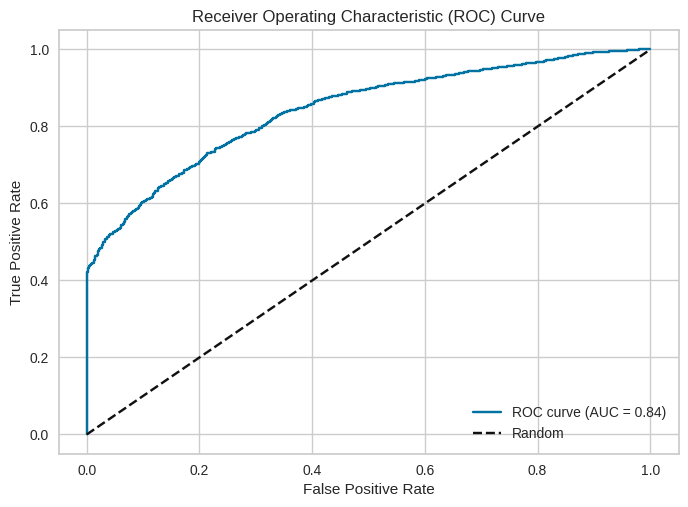

In [113]:
fpr, tpr, thresholds = roc_curve(y_val_ec1, y_val_pred_ec1[:, 1])
auc = roc_auc_score(y_val_ec1, y_val_pred_ec1[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# # チューニングするハイパーパラメータの範囲を定義
# param_dist = {
#     'depth': sp_randint(6, 11),
#     'learning_rate': [0.01, 0.05, 0.1],
#     'l2_leaf_reg': sp_randint(10, 31),
#     'iterations': sp_randint(100, 201)
# }

# # CatBoostClassifierオブジェクトを作成
# model = CatBoostClassifier(random_state=1315)

# # RandomizedSearchCVを使用してランダムサーチを実行
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)
# random_search.fit(X_train, y_train_ec1)

0:	learn: 0.6228789	total: 476ms	remaining: 1m 30s
1:	learn: 0.5942880	total: 577ms	remaining: 54.8s
2:	learn: 0.5720879	total: 667ms	remaining: 42s
3:	learn: 0.5491529	total: 730ms	remaining: 34.3s
4:	learn: 0.5228669	total: 809ms	remaining: 30.3s
5:	learn: 0.5081933	total: 872ms	remaining: 27s
6:	learn: 0.4908254	total: 955ms	remaining: 25.2s
7:	learn: 0.4834887	total: 1.02s	remaining: 23.5s
8:	learn: 0.4783018	total: 1.08s	remaining: 22s
9:	learn: 0.4722323	total: 1.15s	remaining: 20.9s
10:	learn: 0.4602226	total: 1.21s	remaining: 19.9s
11:	learn: 0.4570891	total: 1.29s	remaining: 19.4s
12:	learn: 0.4533567	total: 1.35s	remaining: 18.7s
13:	learn: 0.4495844	total: 1.44s	remaining: 18.3s
14:	learn: 0.4474631	total: 1.5s	remaining: 17.8s
15:	learn: 0.4444255	total: 1.59s	remaining: 17.5s
16:	learn: 0.4418865	total: 1.64s	remaining: 16.9s
17:	learn: 0.4392895	total: 1.7s	remaining: 16.4s
18:	learn: 0.4370264	total: 1.75s	remaining: 16s
19:	learn: 0.4346998	total: 1.85s	remaining: 15.9s

In [42]:
# # 最適なハイパーパラメータを表示
# print("Best Parameters: ", random_search.best_params_)

Best Parameters:  {'depth': 6, 'iterations': 190, 'l2_leaf_reg': 19, 'learning_rate': 0.1}


In [43]:
# # 最適なハイパーパラメータで再トレーニング
# best_model = CatBoostClassifier(**random_search.best_params_, random_state=1315)
# best_model.fit(X_train, y_train_ec1)

# # バリデーションデータで予測
# y_val_pred = best_model.predict(X_val)
# accuracy = accuracy_score(y_val_ec1, y_val_pred)

0:	learn: 0.6450403	total: 64ms	remaining: 12.1s
1:	learn: 0.5828264	total: 76.9ms	remaining: 7.23s
2:	learn: 0.5641135	total: 84.8ms	remaining: 5.29s
3:	learn: 0.5493370	total: 95.8ms	remaining: 4.45s
4:	learn: 0.5385637	total: 111ms	remaining: 4.09s
5:	learn: 0.5242145	total: 121ms	remaining: 3.72s
6:	learn: 0.4986376	total: 134ms	remaining: 3.51s
7:	learn: 0.4810109	total: 144ms	remaining: 3.27s
8:	learn: 0.4772600	total: 152ms	remaining: 3.05s
9:	learn: 0.4733821	total: 160ms	remaining: 2.88s
10:	learn: 0.4712126	total: 169ms	remaining: 2.74s
11:	learn: 0.4676954	total: 176ms	remaining: 2.6s
12:	learn: 0.4654993	total: 186ms	remaining: 2.54s
13:	learn: 0.4636597	total: 202ms	remaining: 2.54s
14:	learn: 0.4614949	total: 214ms	remaining: 2.49s
15:	learn: 0.4601302	total: 222ms	remaining: 2.41s
16:	learn: 0.4586805	total: 230ms	remaining: 2.34s
17:	learn: 0.4573720	total: 240ms	remaining: 2.3s
18:	learn: 0.4561746	total: 248ms	remaining: 2.23s
19:	learn: 0.4491204	total: 260ms	remaini

In [44]:
# print("Validation Accuracy: ", accuracy)

Validation Accuracy:  0.7712264150943396


In [114]:
X_train_ec2 = train.drop(columns=['EC2'])

In [115]:
X_train_ec2, X_val_ec2, y_train_ec2, y_val_ec2 = train_test_split(X_train_ec2, y_train_ec2, test_size=0.2, random_state=42)

In [116]:
model = CatBoostClassifier(**param)
model.fit(X_train_ec2, y_train_ec2) 

In [117]:
y_val_pred_ec2 = model.predict_proba(X_val_ec2)[:, 1]
y_val_pred_ec2

array([0.73557107, 0.99003143, 0.98705444, ..., 0.66577706, 0.99199609,
       0.98706573])

In [68]:
# # チューニングするハイパーパラメータの候補を定義
# param_grid_ec2 = {
#     'depth': [4, 6],
#     'learning_rate': [0.05, 0.1],
#     'l2_leaf_reg': [10, 20],
#     'iterations': [100, 200]
# }

# # CatBoostClassifierオブジェクトを作成
# model_ec2 = CatBoostClassifier(random_state=1315)

# # GridSearchCVを使用してハイパーパラメータチューニングを実行
# grid_search_ec2 = GridSearchCV(estimator=model_ec2, param_grid=param_grid_ec2, cv=5)
# grid_search_ec2.fit(X_train_ec2, y_train_ec2)

0:	learn: 0.6681500	total: 14.1ms	remaining: 1.4s
1:	learn: 0.6492057	total: 17ms	remaining: 834ms
2:	learn: 0.6332197	total: 25.5ms	remaining: 825ms
3:	learn: 0.6149814	total: 33.2ms	remaining: 797ms
4:	learn: 0.6002271	total: 38.7ms	remaining: 734ms
5:	learn: 0.5857078	total: 45ms	remaining: 704ms
6:	learn: 0.5740443	total: 51.1ms	remaining: 679ms
7:	learn: 0.5653774	total: 59.1ms	remaining: 679ms
8:	learn: 0.5551313	total: 64.6ms	remaining: 653ms
9:	learn: 0.5448251	total: 71.1ms	remaining: 640ms
10:	learn: 0.5361538	total: 76.2ms	remaining: 617ms
11:	learn: 0.5255918	total: 84.3ms	remaining: 619ms
12:	learn: 0.5201187	total: 91.9ms	remaining: 615ms
13:	learn: 0.5114238	total: 96.2ms	remaining: 591ms
14:	learn: 0.5072081	total: 100ms	remaining: 569ms
15:	learn: 0.5035749	total: 107ms	remaining: 563ms
16:	learn: 0.4964435	total: 114ms	remaining: 557ms
17:	learn: 0.4938783	total: 118ms	remaining: 538ms
18:	learn: 0.4909023	total: 123ms	remaining: 524ms
19:	learn: 0.4869535	total: 129m

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f263b1faf10>,
             param_grid={'depth': [4, 6], 'iterations': [100, 200],
                         'l2_leaf_reg': [10, 20],
                         'learning_rate': [0.05, 0.1]})

In [69]:
# print("Best Parameters: ", grid_search_ec2.best_params_)

Best Parameters:  {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 10, 'learning_rate': 0.05}


In [70]:
# # 最適なハイパーパラメータで再トレーニング
# best_model_ec2 = CatBoostClassifier(**grid_search_ec2.best_params_, random_state=1315)
# best_model_ec2.fit(X_train_ec2, y_train_ec2)

# # バリデーションデータで予測
# y_val_pred_ec2 = best_model_ec2.predict(X_val_ec2)
# accuracy_ec2_best = accuracy_score(y_val_ec2, y_val_pred_ec2)

0:	learn: 0.6680145	total: 58.4ms	remaining: 5.78s
1:	learn: 0.6455043	total: 66.8ms	remaining: 3.27s
2:	learn: 0.6215363	total: 81.2ms	remaining: 2.63s
3:	learn: 0.6056565	total: 112ms	remaining: 2.68s
4:	learn: 0.5915466	total: 127ms	remaining: 2.42s
5:	learn: 0.5795947	total: 141ms	remaining: 2.21s
6:	learn: 0.5646813	total: 152ms	remaining: 2.02s
7:	learn: 0.5531672	total: 166ms	remaining: 1.91s
8:	learn: 0.5440038	total: 174ms	remaining: 1.76s
9:	learn: 0.5317721	total: 186ms	remaining: 1.67s
10:	learn: 0.5260091	total: 197ms	remaining: 1.59s
11:	learn: 0.5031800	total: 212ms	remaining: 1.55s
12:	learn: 0.4983714	total: 221ms	remaining: 1.48s
13:	learn: 0.4941205	total: 232ms	remaining: 1.42s
14:	learn: 0.4891127	total: 245ms	remaining: 1.39s
15:	learn: 0.4735971	total: 252ms	remaining: 1.32s
16:	learn: 0.4703038	total: 258ms	remaining: 1.26s
17:	learn: 0.4675612	total: 265ms	remaining: 1.21s
18:	learn: 0.4643472	total: 278ms	remaining: 1.19s
19:	learn: 0.4538767	total: 290ms	rema

In [71]:
# print("Validation Accuracy: ", accuracy_ec2_best)

Validation Accuracy:  0.8049705139005897


In [86]:
# # 混同行列を作成
# cm_ec2 = confusion_matrix(y_val_ec2, y_val_pred_ec2)

# # 混同行列を表示
# print("Confusion Matrix:")
# print(cm_ec2)

Confusion Matrix:
[[  28  446]
 [  17 1883]]


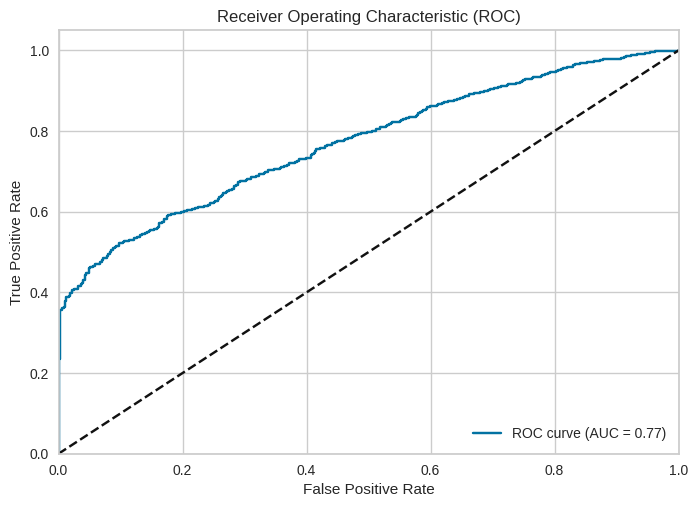

In [87]:
# y_val_pred_prob_ec2 = best_model_ec2.predict_proba(X_val_ec2)[:, 1]

# # ROC曲線の計算
# fpr, tpr, thresholds = roc_curve(y_val_ec2, y_val_pred_prob_ec2)

# # AUCの計算
# auc_ec2 = roc_auc_score(y_val_ec2, y_val_pred_prob_ec2)

# # ROC曲線をプロット
# plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_ec2)
# plt.plot([0, 1], [0, 1], 'k--')  # ランダムな予測の場合の曲線
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc='lower right')
# plt.show()

In [118]:
# チューニングするハイパーパラメータの範囲を定義
param_dist = {
    'depth': sp_randint(6, 11),
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': sp_randint(10, 31),
    'iterations': sp_randint(100, 201)
}

# CatBoostClassifierオブジェクトを作成
model_ec2_random = CatBoostClassifier(random_state=1315)

# RandomizedSearchCVを使用してランダムサーチを実行
random_search_ec2 = RandomizedSearchCV(estimator=model_ec2_random, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)
random_search_ec2.fit(X_train_ec2, y_train_ec2)

0:	learn: 0.6406414	total: 495ms	remaining: 1m 34s
1:	learn: 0.6003408	total: 533ms	remaining: 50.6s
2:	learn: 0.5524874	total: 594ms	remaining: 37.4s
3:	learn: 0.5311335	total: 664ms	remaining: 31.2s
4:	learn: 0.4751199	total: 726ms	remaining: 27.1s
5:	learn: 0.4645322	total: 782ms	remaining: 24.2s
6:	learn: 0.4293301	total: 845ms	remaining: 22.3s
7:	learn: 0.4240586	total: 916ms	remaining: 21.1s
8:	learn: 0.4192847	total: 991ms	remaining: 20.2s
9:	learn: 0.3927714	total: 1.05s	remaining: 19.1s
10:	learn: 0.3738663	total: 1.1s	remaining: 18s
11:	learn: 0.3627527	total: 1.17s	remaining: 17.6s
12:	learn: 0.3519888	total: 1.24s	remaining: 17.1s
13:	learn: 0.3494273	total: 1.31s	remaining: 16.7s
14:	learn: 0.3469671	total: 1.36s	remaining: 16.1s
15:	learn: 0.3453802	total: 1.43s	remaining: 15.7s
16:	learn: 0.3419786	total: 1.5s	remaining: 15.4s
17:	learn: 0.3408567	total: 1.56s	remaining: 15.1s
18:	learn: 0.3387500	total: 1.62s	remaining: 14.8s
19:	learn: 0.3320914	total: 1.8s	remaining: 

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f263ae572e0>,
                   param_distributions={'depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f263b160400>,
                                        'iterations': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f263b0efca0>,
                                        'l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f263a9200a0>,
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   random_state=42)

In [119]:
# 最適なハイパーパラメータを表示
print("Best Parameters: ", random_search_ec2.best_params_)

Best Parameters:  {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 28, 'learning_rate': 0.1}


In [120]:
# 最適なハイパーパラメータで再トレーニング
best_model_ec2_random = CatBoostClassifier(**random_search_ec2.best_params_, random_state=1315)
best_model_ec2_random.fit(X_train_ec2, y_train_ec2)

y_val_pred_ec2_random = best_model_ec2_random.predict_proba(X_val_ec2)

0:	learn: 0.5803439	total: 35.6ms	remaining: 7.09s
1:	learn: 0.5489652	total: 53.7ms	remaining: 5.31s
2:	learn: 0.4796042	total: 77.1ms	remaining: 5.07s
3:	learn: 0.4654417	total: 94.9ms	remaining: 4.65s
4:	learn: 0.4425162	total: 116ms	remaining: 4.53s
5:	learn: 0.4344832	total: 143ms	remaining: 4.63s
6:	learn: 0.3999583	total: 184ms	remaining: 5.07s
7:	learn: 0.3769082	total: 236ms	remaining: 5.67s
8:	learn: 0.3697661	total: 278ms	remaining: 5.89s
9:	learn: 0.3652635	total: 307ms	remaining: 5.83s
10:	learn: 0.3632588	total: 329ms	remaining: 5.64s
11:	learn: 0.3579902	total: 352ms	remaining: 5.52s
12:	learn: 0.3551766	total: 404ms	remaining: 5.81s
13:	learn: 0.3510362	total: 436ms	remaining: 5.79s
14:	learn: 0.3496075	total: 465ms	remaining: 5.74s
15:	learn: 0.3481713	total: 485ms	remaining: 5.58s
16:	learn: 0.3469634	total: 516ms	remaining: 5.55s
17:	learn: 0.3459673	total: 537ms	remaining: 5.42s
18:	learn: 0.3386487	total: 556ms	remaining: 5.3s
19:	learn: 0.3382818	total: 601ms	rema

In [121]:
y_val_pred_ec2_random[:, 1]

array([0.70733726, 0.99021861, 0.98593169, ..., 0.5903589 , 0.98927492,
       0.98760932])

In [129]:
auc = roc_auc_score(y_val_ec2, y_val_pred_ec2_random[:, 1])
print(f"Validation AUC: {auc}")

Validation AUC: 0.8572065727699529


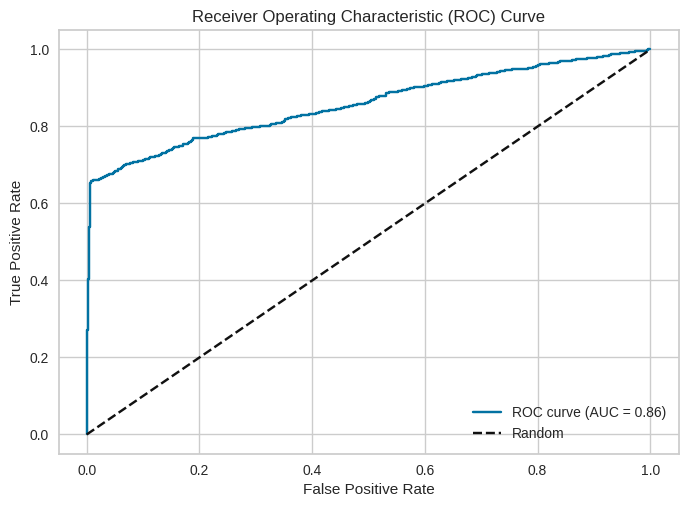

In [131]:
fpr, tpr, thresholds = roc_curve(y_val_ec2, y_val_pred_ec2)
auc = roc_auc_score(y_val_ec2, y_val_pred_ec2)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [132]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

id  EC1  EC2
0  14838  0.5  0.5
1  14839  0.5  0.5
2  14840  0.5  0.5
3  14841  0.5  0.5
4  14842  0.5  0.5

In [136]:
sub_ec1 = pd.DataFrame(y_val_pred_ec1[:, 1],columns=['EC2'])
sub_ec2 = pd.DataFrame(y_val_pred_ec2_random[:, 1],columns=['EC2'])

In [140]:
sub_ec2

EC2
0     0.707337
1     0.990219
2     0.985932
3     0.619065
4     0.606160
...        ...
2963  0.982150
2964  0.632130
2965  0.590359
2966  0.989275
2967  0.987609

[2968 rows x 1 columns]

In [148]:
sample_submission['EC1'] = y_val_pred_ec1[:, 1]
sample_submission['EC2'] = y_val_pred_ec2_random[:, 1]
sample_submission = sample_submission[['id', 'EC1', 'EC2']]

ValueError: Length of values (2968) does not match length of index (9893)

In [ ]:
predictions = pd.DataFrame(y_test_pred, columns=['EC1', 'EC2'])

In [ ]:

predictions['id'] = sample_submission['id']
predictions = predictions[['id', 'EC1', 'EC2']]
predictions.to_csv('submission.csv', index=False)
predictions.head()

In [ ]:
sub_import1 = pd.read_csv('submission (3).csvi')
sub_import2 = pd.read_csv('submission (4).csv')

In [ ]:
sub = df_sample.copy()
sub['EC1'] = (sub_import3['EC1'] * 1.00) 
sub['EC2'] = (sub_import3['EC2'] * 0.50) + (sub_bayes['EC2'] * 0.10) + (sub_import1['EC2'] * 0.40) 
sub

In [ ]:
sub.to_csv('submission.csv',index=False)